#  **Tilde Takımı | E-Corp Datas İncelemesi**

## **📌 Genel Özet**

Bu çalışma, **E-Corp veri setini kapsamlı bir şekilde analiz ederek** veri temizleme, korelasyon incelemeleri ve iş stratejileri geliştirme süreçlerini içermektedir.  
Çalışmanın aşamaları aşağıdaki gibi özetlenmiştir:

### **1️⃣ Veri Setinin Genel Anlaşılması**
📍 **Veri setini tüm kapsamıyla analiz etmek**  
📍 **Sayısal ve görselleştirme yöntemleriyle veri yapısını anlamak**  

### **2️⃣ Veri Ön İşleme ve Düzenleme**
📍 **Eksik verileri doldurmak ve gereksiz sütunları kaldırmak**  
📍 **Kategorik değişkenleri sayısal hale getirmek ve yeni değişkenler üretmek**  

### **3️⃣ Sayısal Değişkenler Arasında Korelasyon Analizi**
📍 **Veri setindeki değişkenlerin ilişkisini incelemek**  
📍 **Korelasyon matrisleri ve sıcaklık haritaları kullanarak içgörüler elde etmek**  

### **4️⃣ Churn Olan ve Olmayan Müşterilerin Ayrı Analizi**
📍 **Churn (müşteri kaybı) yaşayan müşteriler ile aktif müşterileri karşılaştırmak**  
📍 **Her iki grup için detaylı analizler ve görselleştirmeler yapmak**  
📍 **Churn ve aktif müşteriler için sıcaklık haritaları oluşturmak**  

### **5️⃣ Sonuçların ve İş Fikirlerinin Değerlendirilmesi**
📍 **Elde edilen analiz sonuçlarını bir araya getirmek**  
📍 **İş stratejilerine katkı sağlayacak içgörüler sunmak**  


## 📌 Kullanılan Kütüphaneler  

Bu çalışmada aşağıdaki temel **Python kütüphaneleri** kullanılmaktadır:  

### 📊 **Veri Manipülasyonu**  
- **Pandas (`pd`)** → Veri işleme, analiz ve manipülasyon için en temel kütüphane olduğu için kullanıldı.  
- **NumPy (`np`)** → Sayısal hesaplamalar, büyük veri dizileri ve matris işlemleri için optimize edilmiş araçlar içerdiği için kullanıldı.  

### 📈 **Veri Görselleştirme**  
- **Seaborn (`sns`)** → Veri görselleştirme için Matplotlib'e göre daha estetik grafik araçları sunduğu için kullanıldı.  
- **Matplotlib (`plt`)** → Genel amaçlı grafik çizme ve veri görselleştirme kütüphanesidir.  

### 📋 **Veri Sunumu ve Uyarı Yönetimi**  
- **Tabulate (`tabulate`)** → Verileri **tablo formatında** düzenleyerek daha okunabilir ve estetik hale getirdiği için tercih edildi.  
- **Warnings (`warnings`)** → Gereksiz uyarıları filtreleyerek kod çıktılarının daha temiz gözükmesini sağladığı için kullanıldı.  

### 💾 **Dosya İşlemleri**  
- **OS (`os`)** → Dosya ve dizin yönetimi için kullanıldı.  


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
import os
import textwrap

## ⚠️ Uyarı Filtreleme  

Python'da bazı uyarılar kod çalışmasını etkilemez ancak **gereksiz çıktı üretir**.  
Bu tür uyarıları engellemek için `warnings` kütüphanesi kullanılır.  

### 🔹 **FutureWarning Uyarılarını Kapatma**  
Gelecekteki değişikliklere dair **`FutureWarning`** türündeki uyarıları görmezden gelmek için:  

### 🔹 **RuntimeWarning Uyarılarını Kapatma**  
Gelecekteki değişikliklere dair **`RuntimeWarning`** türündeki uyarıları görmezden gelmek için:  


In [82]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

## ⚙️ Pandas Görüntüleme Ayarları

Bu kod bloğu, **Pandas DataFrame görüntüleme ayarlarını optimize etmek** için kullanılır.  
Amaç, **verilerin daha okunaklı ve düzenli bir şekilde gösterilmesini sağlamaktır.** 📊  

---

### 🔹 **Yapılan Ayarlar:**
✅ **Tüm sütunları göster:**  
```python
pd.set_option('display.max_columns', None)
```
✅ **Geniş ekran desteği:**  
```python
pd.set_option('display.width', 4000)
```
✅ **Sütun başlıklarını hizala:**  
```python
pd.set_option('display.colheader_justify', 'left')
```
✅ **Ondalık sayı formatı:**  
```python
pd.set_option('display.float_format', '{:.2f}'.format)


In [83]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 4000)  
pd.set_option('display.colheader_justify', 'left') 
pd.set_option('display.float_format', '{:.2f}'.format) 

## 📂 Veri Setlerinin Yüklenmesi  

Bu çalışmada **birden fazla CSV dosyası** içeren bir veri seti kullanılmaktadır.  
Aşağıdaki kod bloğu, Kaggle dizininden bu veri dosyalarını **Pandas DataFrame** olarak içe aktarmaktadır.  

### 🔹 **Veri Dosyaları ve Açıklamaları**  

| 📁 **Dosya Adı** | 📌 **İçerik Açıklaması** |
|-----------------|---------------------|
| `CSAT_Survey_Data.csv` | Müşteri Memnuniyeti (CSAT) anket verileri |
| `Customer_Age_Data.csv` | Müşterilerin yaş dağılımına ilişkin veriler |
| `Customer_MRR_Data.csv` | Aylık tekrar eden gelir (MRR) verileri |
| `Customer_Revenue_Data.csv` | Müşteri bazında gelir bilgileri |
| `Help_Ticket_Data.csv` | Destek talepleri (Help Ticket) verileri |
| `Newsletter_Interaction_Data.csv` | Müşteri haber bülteni etkileşimleri |
| `Product_Bug_Task_Data.csv` | Ürün hataları (bug) verileri |
| `RegionAndVertical_Data.csv` | Müşteri bölge ve sektör bilgileri |
| `StatusAndLevel_Data.csv` | Müşteri durumu ve seviyelerine ilişkin veriler |


In [84]:
df1 = pd.read_csv('/kaggle/input/dataset/CSAT_Survey_Data.csv')
df2 = pd.read_csv('/kaggle/input/dataset/Customer_Age_Data.csv')
df3 = pd.read_csv('/kaggle/input/dataset/Customer_MRR_Data.csv')
df4 = pd.read_csv('/kaggle/input/dataset/Customer_Revenue_Data.csv')
df5 = pd.read_csv('/kaggle/input/dataset/Help_Ticket_Data.csv')
df6 = pd.read_csv('/kaggle/input/dataset/Newsletter_Interaction_Data.csv')
df7 = pd.read_csv('/kaggle/input/dataset/Product_Bug_Task_Data.csv')
df8 = pd.read_csv('/kaggle/input/dataset/RegionAndVertical_Data.csv')
df9 = pd.read_csv('/kaggle/input/dataset/StatusAndLevel_Data.csv')

## 📌 Veri Setlerini Sözlük Yapısında Saklama  

Çok sayıda **veri seti** ile çalışırken, her birini **ayrı değişkenler** olarak tutmak yerine,  
bunları **Python sözlüğü (`dict`)** içinde saklamak, erişimi ve işlemleri daha pratik hale getirir.  

### 🔹 **Veri Sözlüğü (`df_sozluk`)**
Aşağıdaki kod bloğu, **tüm veri setlerini** isimlendirilmiş bir sözlük (`dictionary`) içinde saklar:  


In [85]:
df_sozluk = {
    "CSAT_Survey_Data": df1,
    "Customer_Age_Data": df2,
    "Customer_MRR_Data": df3,
    "Customer_Revenue_Data": df4,
    "Help_Ticket_Data": df5,
    "Newsletter_Interaction_Data": df6,
    "Product_Bug_Task_Data": df7,
    "RegionAndVertical_Data": df8,
    "StatusAndLevel_Data": df9
}

# 🛠️ Veri Keşfi Fonksiyonu: `veriye_ilk_bakis()`

Bu fonksiyon, verilen **Pandas DataFrame'ini** detaylı bir şekilde analiz ederek veri hakkında hızlıca bilgi edinmeyi sağlar.  
Özellikle **eksik değerler, veri türleri, istatistiksel özet ve örnek veriler** gibi temel unsurları görüntüler.

---

## 📌 **Fonksiyonun Yapısı ve Çalışma Prensibi**

### 🔹 **Fonksiyon Parametreleri**
- **`df_isim`** → Analiz edilen veri setinin adı (String).
- **`df`** → Analiz edilecek Pandas DataFrame’i.
- **`head`** (default=`5`) → İlk ve son kaç satırın gösterileceğini belirler.

---

## 📝 **Fonksiyon İçeriği ve Çıktıları**

### ✅ 1️⃣ **Veri Seti Genel Bilgileri**
Fonksiyonun başında, veri setinin **adı** büyük harflerle belirtilir ve çerçeve içinde gösterilir.  
Bununla birlikte, veri setinin **satır (row) ve sütun (column) sayısı** ekrana yazdırılır.

---

### ✅ 2️⃣ **Sütun Veri Türleri (Column Types)**
Her sütunun veri türü (`int`, `float`, `object`, vb.) tablo formatında yazdırılır.  
Bu, sayısal ve kategorik değişkenleri hızlıca anlamayı sağlar.

```python
print(tabulate(pd.DataFrame(df.dtypes, columns=["Data Type"]), headers="keys", tablefmt="pretty"))
```
---
### ✅ 3️⃣ **Özel Durum: CSAT_Survey_Data Veri Seti**
Eğer analiz edilen veri seti "CSAT_Survey_Data" ise, verinin transpozesi (.T) alınarak görüntülenir.
Bunun sebebi, CSAT verisinin uzun ve geniş formatta olması ve daha iyi okunabilirlik sağlamaktır.

```python
df_transposed = df.head(head).T
```
### ✅ 4️⃣ **Örnek Satırlar (Sample Data)**
Diğer veri setleri için:

İlk 5 satır (.head())
Son 5 satır (.tail())
Tablo formatında ekrana yazdırılır.

```python
print(tabulate(df.head(head), headers="keys", tablefmt="grid"))
print(tabulate(df.tail(head), headers="keys", tablefmt="grid"))
```
### ✅ 5️⃣ **Eksik Değer Analizi (Missing Values)**
Veri setinde eksik değer olup olmadığı kontrol edilir.

Eğer eksik veri yoksa, "✅ Eksik değer bulunamadı" mesajı görüntülenir.
Eğer eksik veri varsa, hangi sütunda kaç eksik değer olduğu tablo şeklinde yazdırılır.

```python
missing_values = df.isnull().sum()
```
### ✅ 6️⃣ **Benzersiz Değer Sayıları (Unique Values)**
Her sütundaki benzersiz (unique) değerlerin sayısı gösterilir.
Bu, kategorik değişkenleri anlamak için önemlidir.

```python
print(tabulate(pd.DataFrame(df.nunique(), columns=["Unique Values"]), headers="keys", tablefmt="psql"))
```
### ✅ 7️⃣ **İstatistiksel Özet (Statistical Summary)**
Tüm sayısal değişkenler için aşağıdaki yüzdelik dilimler (percentiles) hesaplanarak tablo halinde gösterilir:

0% (Min), 5%, 50% (Median), 95%, 99%, 100% (Max)
Bu, uç değerleri (outliers) ve veri dağılımını anlamak için kullanışlıdır.

```python
print(tabulate(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T, headers="keys", tablefmt="fancy_grid"))
```

In [86]:
def veriye_ilk_bakis(df_isim, df, head=5):
    print("\n" + "="*200)
    print(f"🟢 ANALİZİ YAPILAN VERİ SETİ : {df_isim} 🟢".center(200))
    print("="*200 + "\n")

    print("🔹 VERİ BOYUTLARI ")
    print(f"   SATIRLAR: {df.shape[0]}  |  SÜTUNLAR: {df.shape[1]}")
    print("-"*100)

    print("\n🔹 DEĞİŞKEN(SÜTUN) TÜRLERİ")
    print(tabulate(pd.DataFrame(df.dtypes, columns=["TÜRLER"]), headers="keys", tablefmt="pretty"))
    print("-"*100)

    if df_isim == "CSAT_Survey_Data":
        print("\n🔹 TRANSPOSE HALİ (OKUNABİLİRLİK İÇİN) \n")
        df_transposed = df.head(head).T  
        for col in df_transposed.columns:
            print(f"\nSATIR {col}:\n")
            print(df_transposed[col].to_string(index=True)) 
    else:
        print("\n🔹 VERİDEN ÖRNEKLER (İLK VE SON 5 SATIR)")
        print(tabulate(df.head(head), headers="keys", tablefmt="grid"))
        print("\n")
        print(tabulate(df.tail(head), headers="keys", tablefmt="grid"))
    
    print("-"*100)

    print("\n🔹 EKSİK DEĞERLER")
    missing_values = df.isnull().sum()
    
    if missing_values.sum() == 0:
        print("✅ EKSİK DEĞER BULUNAMADI")
    else:
        print(tabulate(pd.DataFrame(missing_values[missing_values > 0], columns=["EKSİK VERİ SAYISI"]), headers="keys", tablefmt="fancy_grid"))
    print("-"*100)

    print("\n🔹 BENZERSİZ DEĞER SAYISI")
    print(tabulate(pd.DataFrame(df.nunique(), columns=["BENZERSİZ DEĞERLER"]), headers="keys", tablefmt="psql"))
    print("-"*100)

    print("\n🔹 VERİNİN İSTATİSTİKLERİ")
    print(tabulate(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T, headers="keys", tablefmt="fancy_grid"))
    print("="*100 + "\n")

In [87]:
#Tüm verileri döngü halinde sözlükten alıp işler
for df_isim,df in df_sozluk.items():
    veriye_ilk_bakis(df_isim,df)


                                                                            🟢 ANALİZİ YAPILAN VERİ SETİ : CSAT_Survey_Data 🟢                                                                            

🔹 VERİ BOYUTLARI 
   SATIRLAR: 1989  |  SÜTUNLAR: 11
----------------------------------------------------------------------------------------------------

🔹 DEĞİŞKEN(SÜTUN) TÜRLERİ
+---------------------------------------------------------------------------+---------+
|                                                                           | TÜRLER  |
+---------------------------------------------------------------------------+---------+
|                                Customer ID                                | object  |
|                                   Year                                    |  int64  |
|                                  Quarter                                  |  int64  |
|                                Survey Date                                | object  |


# 🏷️ Kategorik ve Sayısal Sütun Analizi: `kat_num_analiz()`

Bu fonksiyon, verilen **Pandas DataFrame** içindeki **kategorik ve sayısal sütunları** analiz ederek  
veri setindeki **değişkenlerin türlerini sınıflandırmayı** sağlar.

---

## 📌 **Fonksiyonun Yapısı ve Çalışma Prensibi**

### 🔹 **Fonksiyon Parametreleri**
- **`df_isim`** → Analiz edilen veri setinin adı (String).
- **`df`** → Analiz edilecek **Pandas DataFrame**.
- **`yazdir`** (default=`False`) → Eğer `True` olarak ayarlanırsa, analiz bilgileri ekrana yazdırılır.

---

## 📝 **Fonksiyon İçeriği ve Çıktıları**

### ✅ 1️⃣ **Kategorik Sütunların Belirlenmesi**  
Fonksiyon, **veri tipi `category`, `object` veya `bool` olan sütunları** **kategorik değişkenler** olarak kabul eder.

```python
kat_sutunlar = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
```

---

### ✅ 2️⃣ **Az Sayıda Unique Değere Sahip Olan Kategorik Değişkenler (`kat_ama_say_sutunlar`)**
Eğer bir sütun **az sayıda unique değere sahipse** ama **sayısal olarak işlenebiliyorsa**,  
bu değişken **"Kategorik ama sayısal olarak değerlendirilebilir"** (`kat_ama_say_sutunlar`) olarak tanımlanır.

Bu değişkenler heatmap üzerinden veriyi daha iyi analiz etme konusunda bize yardımcı olur.

```python
kat_ama_say_sutunlar = [
    col for col in df.columns
    if df[col].nunique() < 10 and df[col].dtypes in ["category", "object", "bool"]
]
```
---
## ✅ 3️⃣ Sayısal Sütunların Belirlenmesi

Bu adımda, veri setindeki **sayısal sütunlar** belirlenir.  
Fonksiyon, **`int` veya `float`** veri tipine sahip sütunları **sayısal değişkenler** olarak sınıflandırır.

### 📝 **Kod Blokları**  

```python
say_sutunlar = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
```
---
## ✅ 4️⃣ Opsiyonel Yazdırma (`yazdir=True`)

Eğer fonksiyon **`yazdir=True`** olarak çağrılırsa, analiz bilgileri ekrana yazdırılır.  
Bu bilgiler, veri setinin **genel yapısını** anlamaya yardımcı olur.

### 📝 **Ekrana Yazdırılan Bilgiler**  
- 🔹 **Toplam sütun sayısı**  
- 🔹 **Kategorik ve sayısal sütun sayıları**  
- 🔹 **Kategorik fakat sayısal değerlendirilebilecek sütun sayısı**  
- 🔹 **Her değişken türü için unique değer sayıları**  

In [88]:
def kat_num_analiz(df_isim, df, yazdir=False):
    # Kategorik sütunları belirleme
    kat_sutunlar = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    # Kategorik olup az sayıda unique değere sahip olan fakat numerik olarak değerlendirilebilecek sütunlar
    kat_ama_say_sutunlar = [
        col for col in df.columns
        if df[col].nunique() < 10 and df[col].dtypes in ["category", "object", "bool"]
    ]

    # Sayısal sütunları belirleme
    say_sutunlar = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    

    if yazdir:
        print("\n" + "="*150)
        print(f"📌 {df_isim} VERİSİ SÜTUNLAR İÇİN TÜR ANALİZİ\n".center(150))
        print("="*150 + "\n")
        
        # Genel bilgiler
        print(f"🔹 Toplam Sütun Sayısı: {df.shape[1]}")
        print(f"🔹 Kategorik Sütun Sayısı: {len(kat_sutunlar)}")
        print(f"🔹 Sayısal Sütun Sayısı: {len(say_sutunlar)}")
        print(f"🔹 Kategorik fakat numerik olarak ele alınabilecek sütun sayısı: {len(kat_ama_say_sutunlar)}\n")
    
        # Unique değer sayılarının analizi
        print("📊 Kategorik Sütunların Unique Değer Sayıları:")
        print(df[kat_sutunlar].nunique(), "\n")
    
        print("📊 Sayısal Sütunların Unique Değer Sayıları:")
        print(df[say_sutunlar].nunique(), "\n")
    
        print("📊 Kategorik olup numerik olarak ele alınabilecek sütunların Unique Değer Sayıları:")
        print(df[kat_ama_say_sutunlar].nunique(), "\n")

    return kat_sutunlar, say_sutunlar

In [89]:
# Her bir DataFrame için analiz fonksiyonunu çalıştırma
for df_isim, df in df_sozluk.items():
    kat_num_analiz(df_isim, df,True)


                                                 📌 CSAT_Survey_Data VERİSİ SÜTUNLAR İÇİN TÜR ANALİZİ
                                                 

🔹 Toplam Sütun Sayısı: 11
🔹 Kategorik Sütun Sayısı: 5
🔹 Sayısal Sütun Sayısı: 6
🔹 Kategorik fakat numerik olarak ele alınabilecek sütun sayısı: 3

📊 Kategorik Sütunların Unique Değer Sayıları:
Customer ID                                                                  640
Survey Date                                                                    3
Response Date                                                                151
How frequently are you using our platform                                      3
Please rate your understanding of our reporting capabilities in the panel      5
dtype: int64 

📊 Sayısal Sütunların Unique Değer Sayıları:
Year                                                                  1
Quarter                                                               3
How likely are you to recommend insider to a f

# 📊 Kategorik Değişken Analizi: `kat_ozet()`

Bu fonksiyon, verilen **Pandas DataFrame'inde** bulunan **kategorik değişkenlerin** detaylı analizini gerçekleştirir.  
Her değişken için **frekans, oran ve görselleştirme** sunarak veri setindeki dağılımı anlamaya yardımcı olur.  

---

## 📌 **Fonksiyonun Yapısı ve Çalışma Prensibi**

### 🔹 **Fonksiyon Parametreleri**
- **`df`** → Analiz edilecek **Pandas DataFrame**.
- **`df_isim`** → Veri setinin adı (String).
- **`kat_sutunlar`** → Kategorik değişkenlerin listesi.
- **`sinif_limiti`** (default=`10`) → Eğer bir kategorik değişkenin **unique** değer sayısı `sinif_limiti` değerinden fazla ise, grafik çizilmez.

---

## 📝 **Fonksiyon İçeriği ve Çıktıları**

## ✅ 1️⃣ Her Kategorik Sütun İçin Analiz  

Fonksiyon, her kategorik değişkeni **tek tek analiz eder** ve şu bilgileri verir:  

🔹 **Sütunun adı ve unique değer sayısı**  
🔹 **Frekans (adet ve oran) tablosu**  
🔹 **Pasta grafiği (Pie Chart)**  
🔹 **Histogram (Sütun Grafiği)**  

---
## ✅ 2️⃣ Görselleştirme  
Eğer **unique değer sayısı** `sinif_limiti` değerinden azsa,  
**Pasta Grafiği (Pie Chart)** ve **Histogram (Sütun Grafiği)** oluşturulur.  


### **📌 Pasta Grafiği (Pie Chart)**
- **Kategorik değişkenin yüzdelik oranlarını gösterir.**  
- **Renk skalası ve gölgelendirme eklenmiştir.**  
- **Daha iyi görünmesi için patlatma (`explode`) efekti uygulanmıştır.**  


## 📌 Histogram (Sütun Grafiği)  
- **Kategorik değişkenin frekanslarını gösterir.**  
- **Maksimum 20 bin değer kullanılarak daha iyi bir dağılım elde edilir.**  
- **X ekseni yazıları 30 derece döndürülerek okunaklı hale getirilmiştir.**  



In [90]:
def kat_ozet(df, df_isim, kat_sutunlar, sinif_limiti=10):
    
    print(f"\n{'=' * 200}")
    print(f"📊 {df_isim.upper()} VERİ SETİ KATEGORİK ANALİZİ".center(200))
    print(f"{'=' * 200}\n")

    if not kat_sutunlar:
        print(f"⚠ {df_isim} veri setinde kategorik sütun bulunmamaktadır.")
        return

    for kat_sutun in kat_sutunlar:
        benzersiz_sayilar = df[kat_sutun].nunique()
        print(f"\n{'-' * 120}")
        print(f"{kat_sutun.upper()} DEĞİŞKENİ ANALİZİ (Unique Değerler: {benzersiz_sayilar})".center(120))
        print(f"{'-' * 120}\n")

        value_counts = df[kat_sutun].value_counts(normalize=True, dropna=False) * 100

        if benzersiz_sayilar > sinif_limiti:
            print("⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.")
            print(f"📌 Toplam Unique Değer Sayısı: {benzersiz_sayilar}")
            print(f"📌 En sık görülen ilk {sinif_limiti} değer aşağıda gösterilmiştir.\n")
            print(df[kat_sutun].value_counts(dropna=False).head(sinif_limiti))
            continue

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Pasta Grafiği
        value_counts.plot.pie(
            autopct="%.1f%%", startangle=90, cmap="coolwarm", shadow=True,
            explode=[0.05] * len(value_counts), ax=axes[0]
        )
        axes[0].set_ylabel("")  
        axes[0].set_title(f"{kat_sutun} - Pasta Grafiği", fontsize=16, fontweight="bold")

        # Histogram
        sns.histplot(df[kat_sutun].astype(str), bins=min(20, benzersiz_sayilar), kde=False, ax=axes[1], color="royalblue")
        axes[1].set_xlabel(kat_sutun, fontsize=14, fontweight="bold")
        axes[1].set_ylabel("Frekans", fontsize=14)
        axes[1].set_title(f"{kat_sutun} - Histogram", fontsize=16, fontweight="bold")
        axes[1].tick_params(axis="x", rotation=30, labelsize=10)

        plt.tight_layout()
        plt.show() 

# 📊 Sayısal Değişken Analizi: `num_ozet()`

Bu fonksiyon, verilen **Pandas DataFrame'inde** bulunan **sayısal değişkenlerin** detaylı analizini gerçekleştirir.  
Her değişken için **histogram ve boxplot grafiklerini** oluşturarak veri setindeki dağılımı anlamaya yardımcı olur.

---

## 📌 **Fonksiyonun Yapısı ve Çalışma Prensibi**

### 🔹 **Fonksiyon Parametreleri**
- **`df`** → Analiz edilecek **Pandas DataFrame**.
- **`df_isim`** → Veri setinin adı (String).
- **`say_sutunlar`** → Sayısal değişkenlerin listesi.

---

## 📝 **Fonksiyon İçeriği ve Çıktıları**

### ✅ 1️⃣ **Her Sayısal Sütun İçin Analiz**
Fonksiyon, her sayısal değişkeni tek tek analiz eder ve şu bilgileri verir:

🔹 Sütunun adı

🔹 Histogram grafiği

🔹 Boxplot grafiği


---

### ✅ 2️⃣ **Görselleştirme**
Her sayısal değişken için iki farklı grafik oluşturulur:

## 📌 **Histogram**
Değişkenin dağılımını anlamaya yardımcı olur.
Yoğunluk fonksiyonu (kde=True) eklenerek daha iyi analiz yapılmasını sağlar.
Histogram çubuğu sayısı bins=20 olarak belirlenmiştir.


## 📌 **Boxplot (Kutu Grafiği)**
Aykırı değerleri tespit etmek için kullanılır.
Sayısal değişkenin çeyrek dilimlerini ve medyanını gösterir.
Renk salmon olarak belirlenmiştir.


In [91]:
def num_ozet(df, df_isim, say_sutunlar):
    """
    Sayısal değişkenler için histogram ve boxplot çizen fonksiyon.
    """
    print(f"\n{'=' * 200}")
    print(f"📊 {df_isim.upper()} VERİ SETİ SAYISAL ANALİZİ".center(200))
    print(f"{'=' * 200}\n")

    if not say_sutunlar:
        print(f"⚠ {df_isim} veri setinde sayısal sütun bulunmamaktadır.")
        return

    for say_sutun in say_sutunlar:
        print(f"\n{'-' * 120}")
        print(f"{say_sutun.upper()} DEĞİŞKENİ ANALİZİ".center(120))
        print(f"{'-' * 120}\n")

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram
        sns.histplot(df[say_sutun], bins=20, kde=True, ax=axes[0], color="royalblue")
        axes[0].set_xlabel(say_sutun, fontsize=14, fontweight="bold")
        axes[0].set_ylabel("Frekans", fontsize=14)
        axes[0].set_title(f"{say_sutun} - Histogram", fontsize=16, fontweight="bold")

        # Boxplot
        sns.boxplot(x=df[say_sutun], ax=axes[1], color="salmon")
        axes[1].set_xlabel(say_sutun, fontsize=14, fontweight="bold")
        axes[1].set_title(f"{say_sutun} - Boxplot", fontsize=16, fontweight="bold")

        plt.tight_layout()
        plt.show()


                                                                             📊 CSAT_SURVEY_DATA VERİ SETİ KATEGORİK ANALİZİ                                                                             


------------------------------------------------------------------------------------------------------------------------
                                  CUSTOMER ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 640)                                  
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 640
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Customer ID
CRM-1486150    12
CRM-1438700    10
CRM-164850     10
CRM-1482200    10
CRM-1455200    10
CRM-1450750    10
CRM-1473700    10
CRM-661350      9
CRM-902900      8
CRM-1444350     8
Name: count, dtype: int64

--------------------------------------------------------------

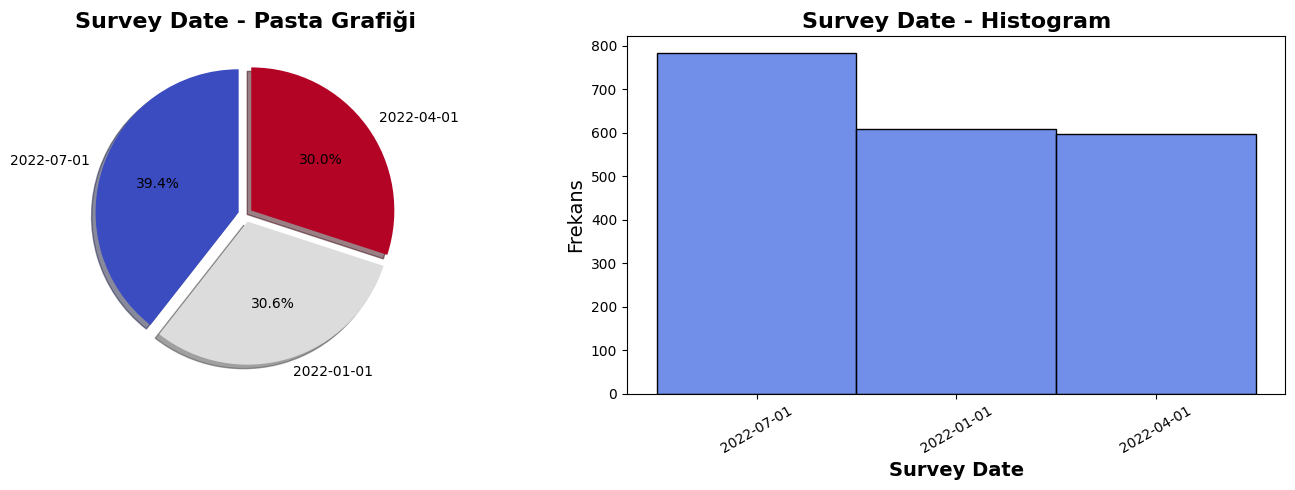


------------------------------------------------------------------------------------------------------------------------
                                 RESPONSE DATE DEĞİŞKENİ ANALİZİ (Unique Değerler: 151)                                 
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 151
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Response Date
2022-03-21    179
2022-03-01    148
2022-02-01    133
2022-03-31     57
2022-09-05     56
2022-09-26     42
2022-07-05     41
2022-06-28     40
2022-09-29     39
2022-03-30     37
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
                    HOW FREQUENTLY ARE YOU USING OUR PLATFORM DEĞİŞKENİ ANALİZİ (Unique Değerler: 3)                    
---------------------

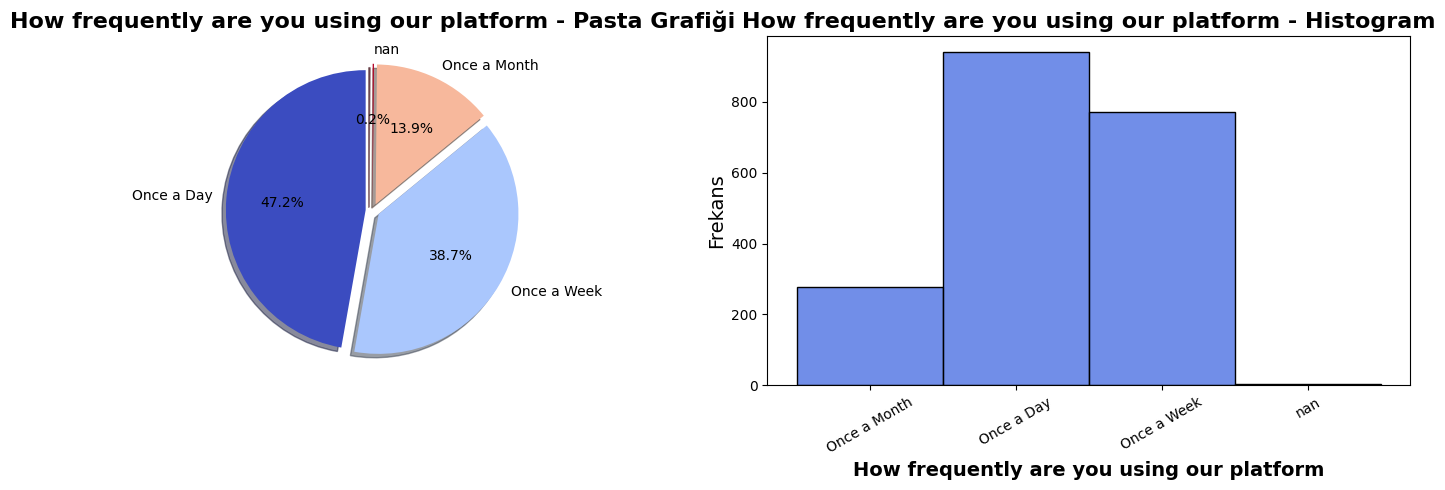


------------------------------------------------------------------------------------------------------------------------
    PLEASE RATE YOUR UNDERSTANDING OF OUR REPORTING CAPABILITIES IN THE PANEL DEĞİŞKENİ ANALİZİ (Unique Değerler: 5)    
------------------------------------------------------------------------------------------------------------------------



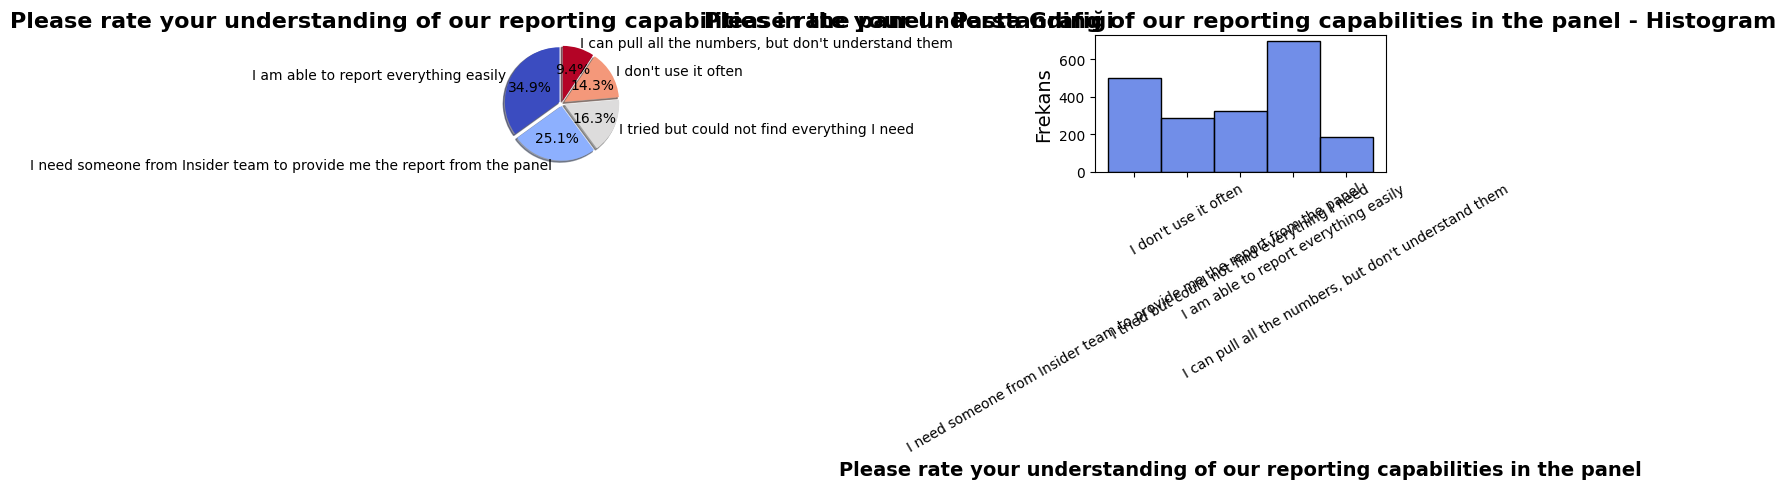


                                                                              📊 CSAT_SURVEY_DATA VERİ SETİ SAYISAL ANALİZİ                                                                              


------------------------------------------------------------------------------------------------------------------------
                                                 YEAR DEĞİŞKENİ ANALİZİ                                                 
------------------------------------------------------------------------------------------------------------------------



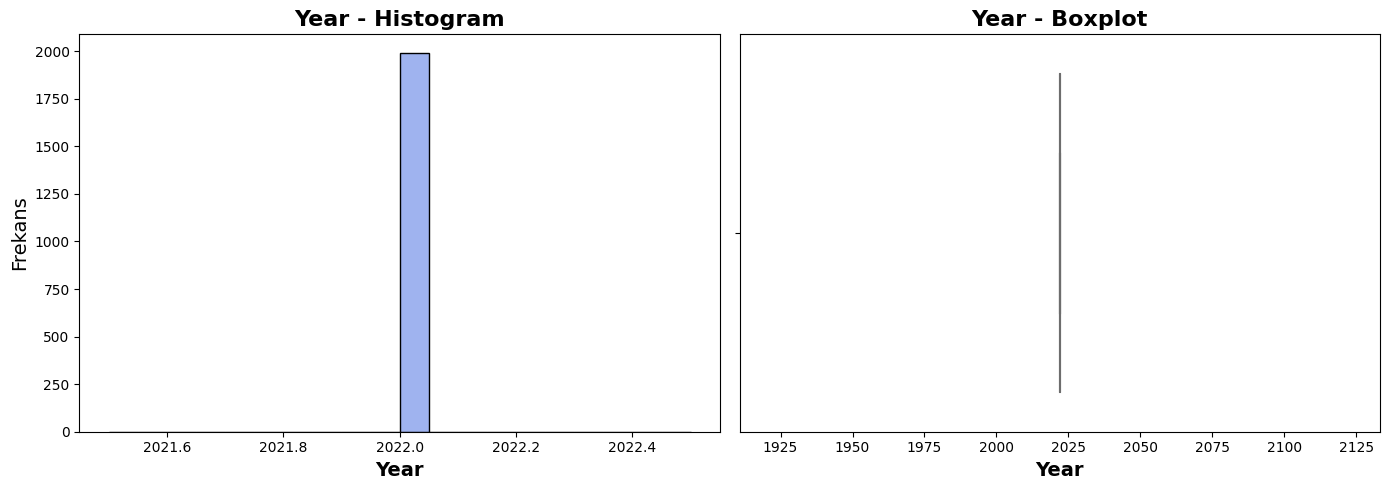


------------------------------------------------------------------------------------------------------------------------
                                               QUARTER DEĞİŞKENİ ANALİZİ                                                
------------------------------------------------------------------------------------------------------------------------



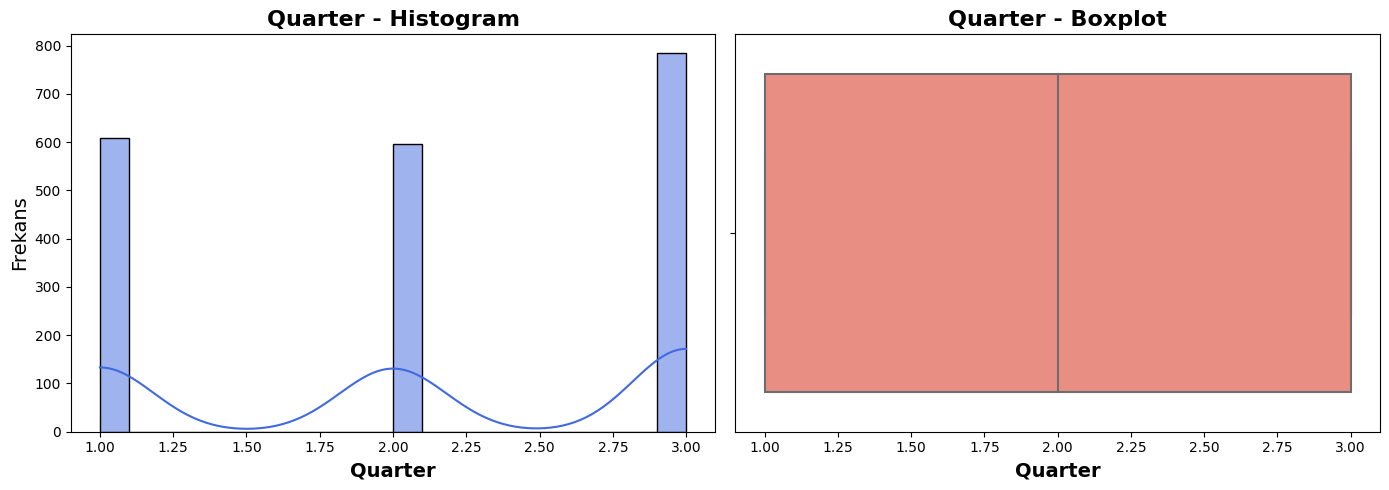


------------------------------------------------------------------------------------------------------------------------
                  HOW LIKELY ARE YOU TO RECOMMEND INSIDER TO A FRIEND OR COLLEAGUE  DEĞİŞKENİ ANALİZİ                   
------------------------------------------------------------------------------------------------------------------------



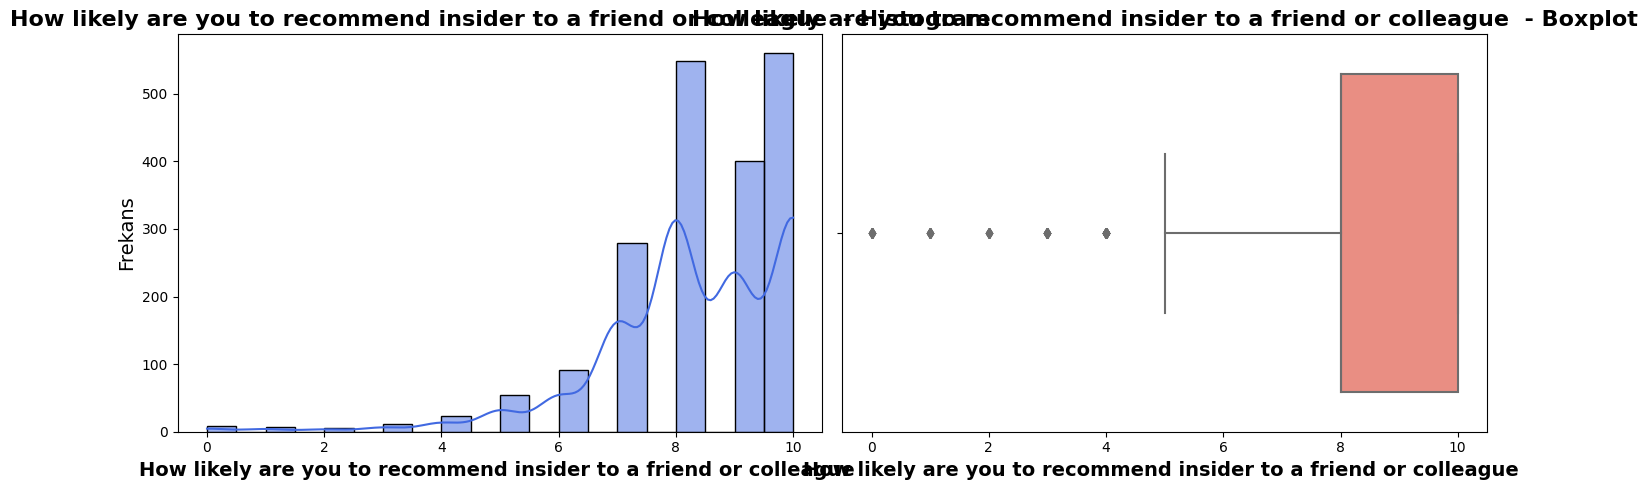


------------------------------------------------------------------------------------------------------------------------
                        HOW WOULD YOU RATE THE VALUE YOU GAIN FROM OUR COMPANY DEĞİŞKENİ ANALİZİ                        
------------------------------------------------------------------------------------------------------------------------



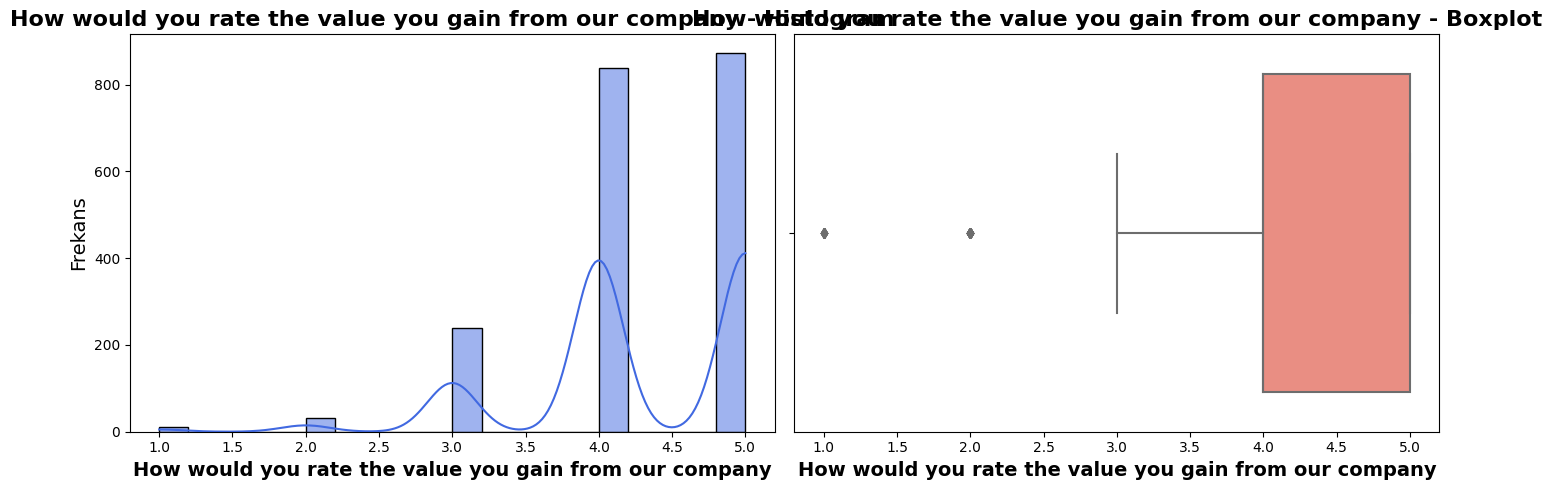


------------------------------------------------------------------------------------------------------------------------
                           PLEASE RATE THE OVERALL QUALITY OF OUR PRODUCTS DEĞİŞKENİ ANALİZİ                            
------------------------------------------------------------------------------------------------------------------------



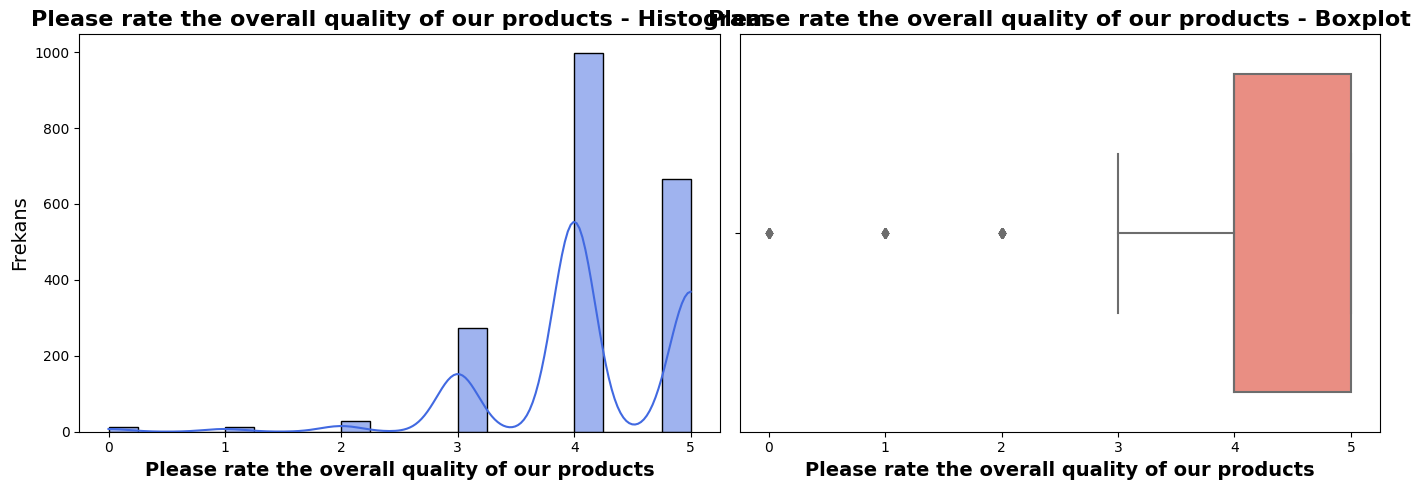


------------------------------------------------------------------------------------------------------------------------
                                PLEASE RATE THE USABILITY OF THE PANEL DEĞİŞKENİ ANALİZİ                                
------------------------------------------------------------------------------------------------------------------------



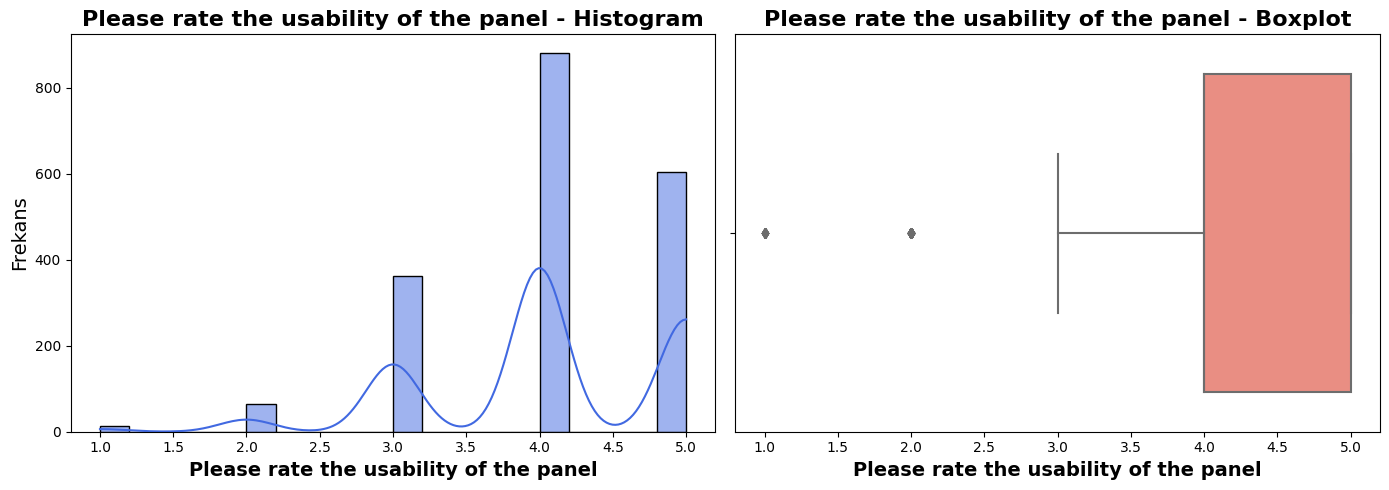


                                                                            📊 CUSTOMER_AGE_DATA VERİ SETİ KATEGORİK ANALİZİ                                                                             


------------------------------------------------------------------------------------------------------------------------
                                    CRM ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 2651)                                    
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 2651
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

CRM ID
CRM-1471650    1
CRM-1078450    1
CRM-1531400    1
CRM-1485200    1
CRM-1479100    1
CRM-169650     1
CRM-1455200    1
CRM-157300     1
CRM-1023900    1
CRM-240000     1
Name: count, dtype: int64

                                                                            

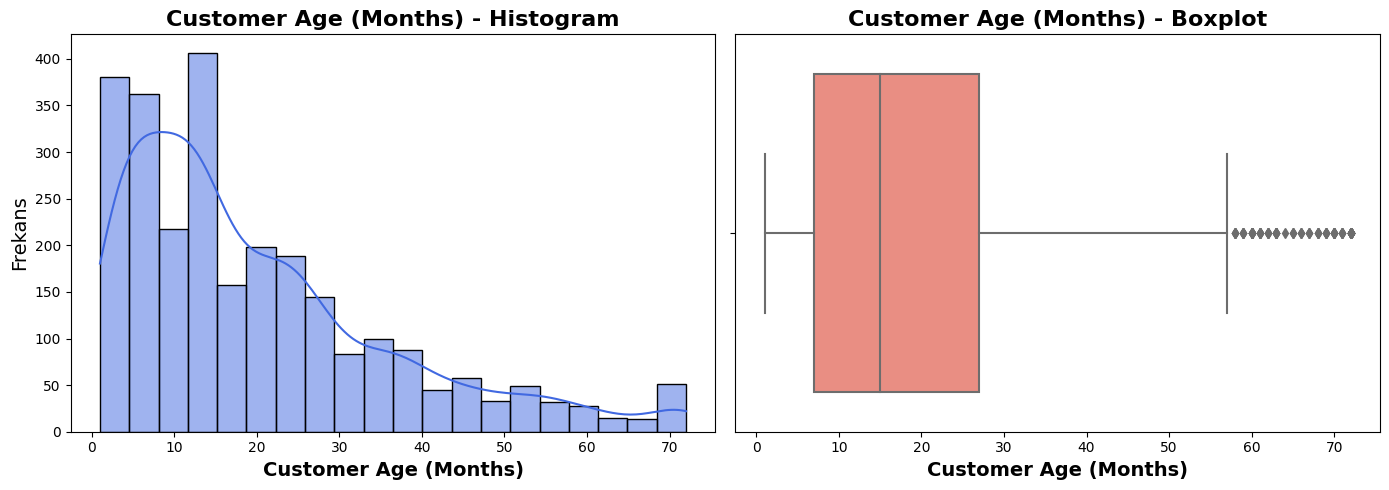


                                                                            📊 CUSTOMER_MRR_DATA VERİ SETİ KATEGORİK ANALİZİ                                                                             


------------------------------------------------------------------------------------------------------------------------
                                 CUSTOMER ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 1380)                                  
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 1380
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Customer ID
CRM-5454800    1
CRM-1455300    1
CRM-1463600    1
CRM-281300     1
CRM-1461250    1
CRM-1461200    1
CRM-1459550    1
CRM-1459400    1
CRM-1459100    1
CRM-1456900    1
Name: count, dtype: int64

-----------------------------------------------------------------------

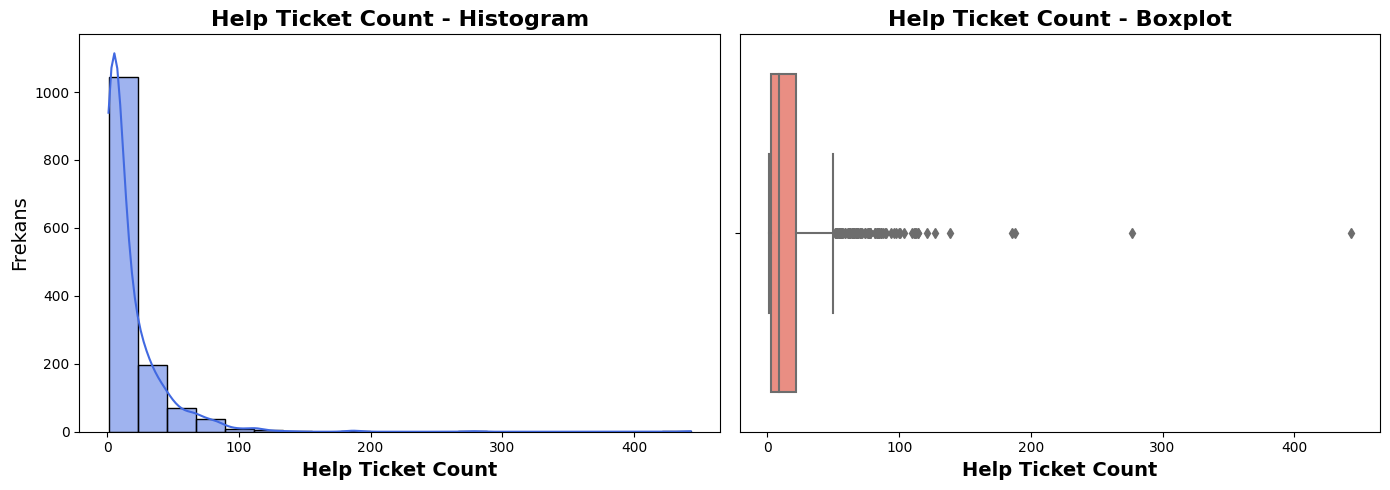


------------------------------------------------------------------------------------------------------------------------
                                    HELP TICKET LEAD TIME (HOURS) DEĞİŞKENİ ANALİZİ                                     
------------------------------------------------------------------------------------------------------------------------



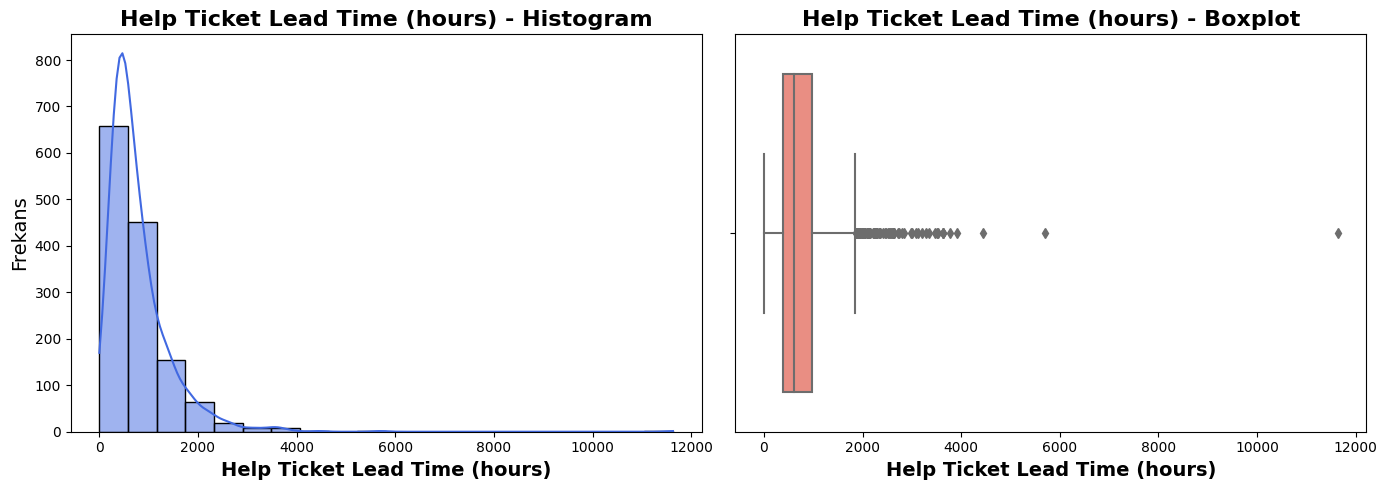


                                                                       📊 NEWSLETTER_INTERACTION_DATA VERİ SETİ KATEGORİK ANALİZİ                                                                        


------------------------------------------------------------------------------------------------------------------------
                                  CUSTOMER ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 251)                                  
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 251
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Customer ID
CRM-160150     1
CRM-1494600    1
CRM-156150     1
CRM-1510400    1
CRM-1551900    1
CRM-338700     1
CRM-1429300    1
CRM-351800     1
CRM-1526150    1
CRM-241450     1
Name: count, dtype: int64

                                                                        

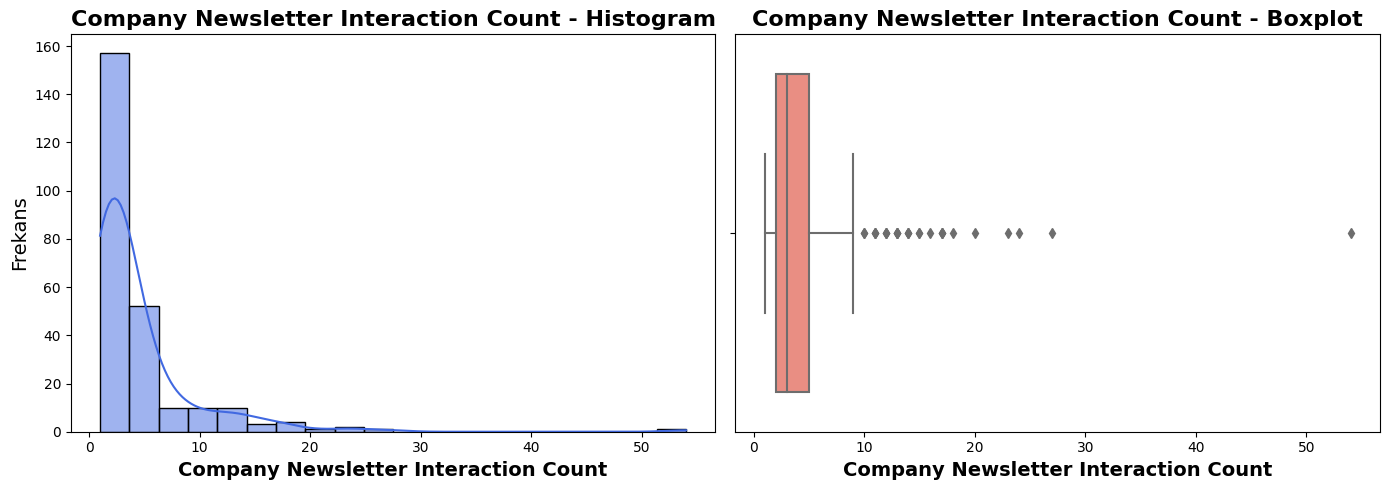


                                                                          📊 PRODUCT_BUG_TASK_DATA VERİ SETİ KATEGORİK ANALİZİ                                                                           


------------------------------------------------------------------------------------------------------------------------
                                  CUSTOMER ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 640)                                  
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 640
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Customer ID
CRM-1486150    12
CRM-1438700    10
CRM-1473700    10
CRM-1455200    10
CRM-1482200    10
CRM-164850     10
CRM-1450750    10
CRM-661350      9
CRM-1462250     8
CRM-1444350     8
Name: count, dtype: int64

                                                              

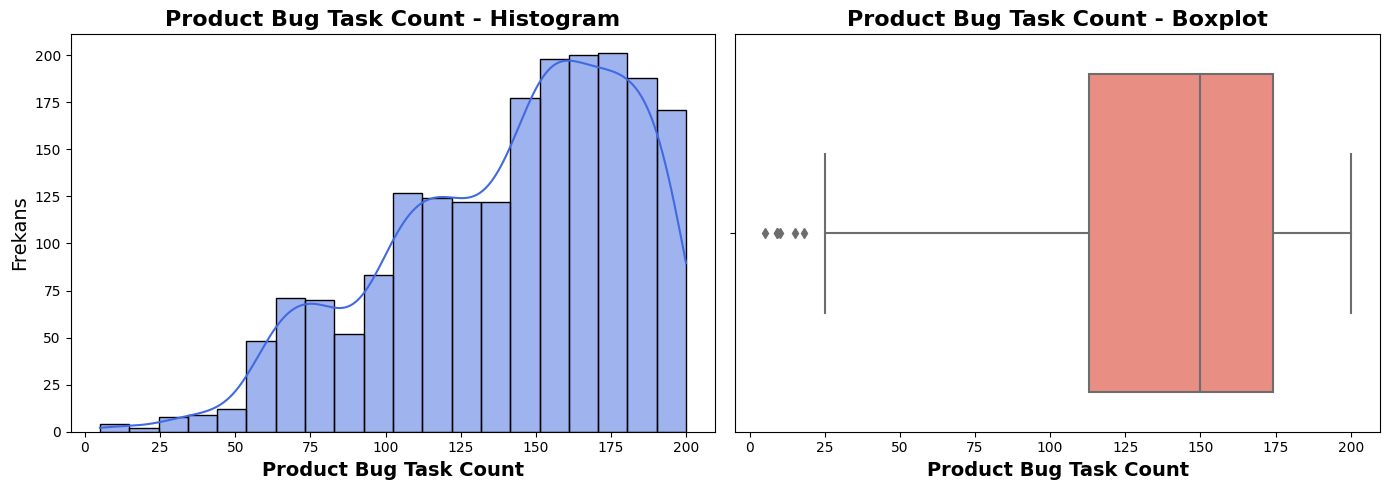


                                                                          📊 REGIONANDVERTICAL_DATA VERİ SETİ KATEGORİK ANALİZİ                                                                          


------------------------------------------------------------------------------------------------------------------------
                                 CUSTOMER ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 2651)                                  
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 2651
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Customer ID
NaN            4
CRM-1471650    1
CRM-1078450    1
CRM-1531400    1
CRM-1485200    1
CRM-1479100    1
CRM-169650     1
CRM-1455200    1
CRM-157300     1
CRM-1023900    1
Name: count, dtype: int64

-----------------------------------------------------------------------

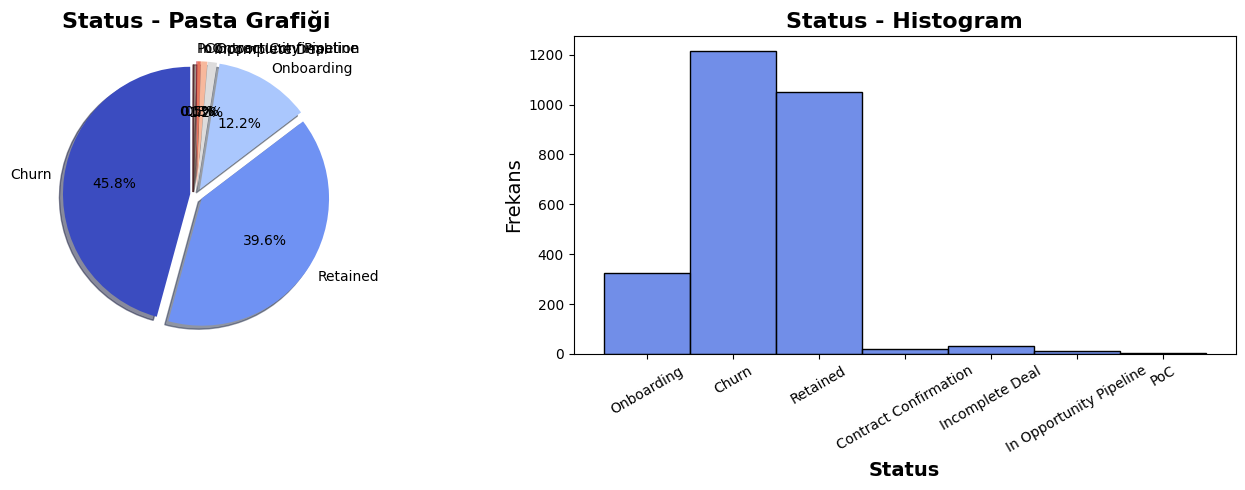


------------------------------------------------------------------------------------------------------------------------
                                 CUSTOMER LEVEL DEĞİŞKENİ ANALİZİ (Unique Değerler: 3)                                  
------------------------------------------------------------------------------------------------------------------------



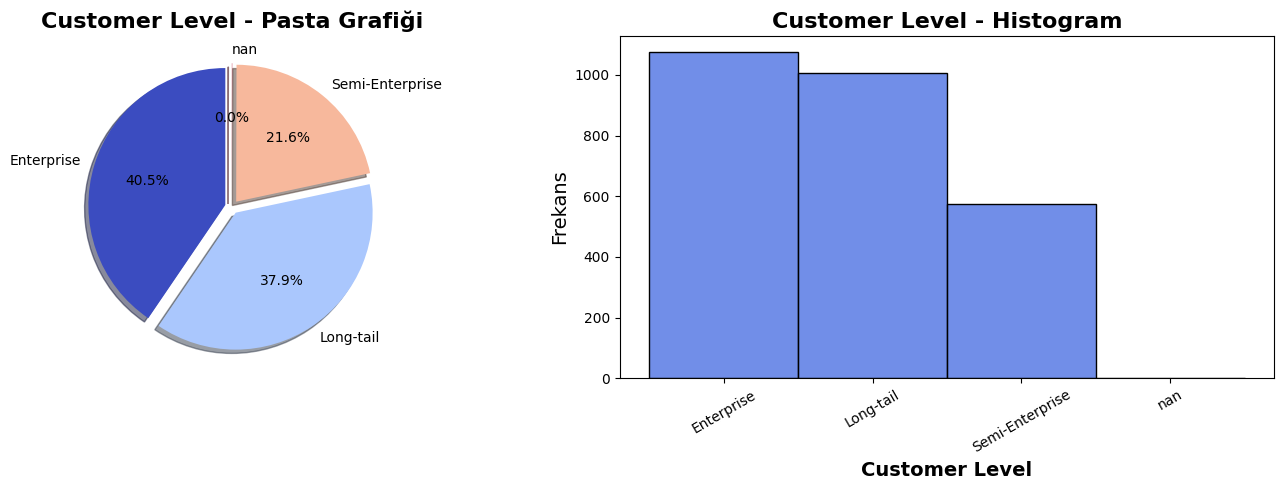


                                                                            📊 STATUSANDLEVEL_DATA VERİ SETİ SAYISAL ANALİZİ                                                                             

⚠ StatusAndLevel_Data veri setinde sayısal sütun bulunmamaktadır.


In [92]:
# Her bir DataFrame için analiz fonksiyonunu çalıştırma
for df_isim, df in df_sozluk.items():
    kat_sutunlar,say_sutunlar=kat_num_analiz(df_isim, df)
    kat_ozet(df,df_isim,kat_sutunlar)
    num_ozet(df,df_isim,say_sutunlar)

# **📊 Bölge ve Müşteri Durum Verilerinin Birleştirilmesi & Temizlenmesi**

## **🔹 Genel Bakış**
Yukarıdaki veri analizlerini inceledikten sonra vertical ve subvertical sütunlarında fazlasıyla eksik değer gördük . Ayrıca ikisi birlikte eksik olan idler de gördük ve bu idleri incelemeyi düşündük , bunun için müşteri durum verileriyle bölge ve sektör verilerini birleştirdik. Bu sayede hem vertical hem de subverticaldeki eksik idleri durum verileriyle inceledik .

Bu işlem, **RegionAndVertical_Data** ve **StatusAndLevel_Data** veri setlerini birleştirir, eksik verileri analiz eder ve eksik girdileri kaldırarak daha temiz bir veri seti oluşturur.

## **🔍 Uygulanan Adımlar**
1. **Verilerin Birleştirilmesi**:  
   - `"Customer ID"` üzerinden **outer join** (`how='outer'`) kullanılarak iki veri seti birleştirilir.
   - Bu sayede her iki veri setindeki tüm girdiler korunur, eksik veriler belirlenir.

2. **Eksik Verilerin Belirlenmesi**:  
   - Eğer `"Vertical"` ve `"Subvertical"` **ikisi birden NaN (eksik)** ise, bu satır eksik olarak değerlendirilir.

3. **Kategorik ve Sayısal Analiz**:  
   - Mevcut ise, `kat_num_analiz()` ve `kat_ozet()` fonksiyonları ile veri yapısı analiz edilir.

4. **Eksik Satırların Silinmesi**:  
   - **Hem `"Vertical"` hem de `"Subvertical"` eksik olan satırlar** `.dropna(subset=[...])` kullanılarak kaldırılır.

5. **Temizlenmiş Verinin Güncellenmesi & Gösterimi**  
   - Temizlenen veri `df_sozluk["Region_Status_Data"]` içine kaydedilir.
   - Güncellenmiş veri önizlemesi sağlanır.

## **✅ Sonuçlar**
- **Hem `"Vertical"` hem de `"Subvertical"` eksik olan idler'in büyük çoğunluğunun 'onboarding' olduğunu gördük ve yeni müşterilerin bilgilerinde eksikliklerin olduğu sonucuna vardık**.
- **Veri seti artık daha temiz ve analiz için hazır hale getirildi**.


🔍 BİRLEŞMİŞ VERİNİN İLK BOYUTLARI: (2667, 6)
🗑️ 79 KADAR SATIR VERTİCAL VE SUBVERTİCAL DEĞERLERİ İKİSİ BİRLİKTE BOŞ OLDUĞU İÇİN ATILIYOR

                                                                        📊 SILINECEK_REGION_STATUS_DF VERİ SETİ KATEGORİK ANALİZİ                                                                        


------------------------------------------------------------------------------------------------------------------------
                                  CUSTOMER ID DEĞİŞKENİ ANALİZİ (Unique Değerler: 63)                                   
------------------------------------------------------------------------------------------------------------------------

⚠ Bu değişkende çok fazla unique değer var, grafik çizilmedi.
📌 Toplam Unique Değer Sayısı: 63
📌 En sık görülen ilk 10 değer aşağıda gösterilmiştir.

Customer ID
NaN            16
CRM-1460950     1
CRM-5602250     1
CRM-5602400     1
CRM-5602550     1
CRM-5603000     1
CRM-5603050     1
CRM-560

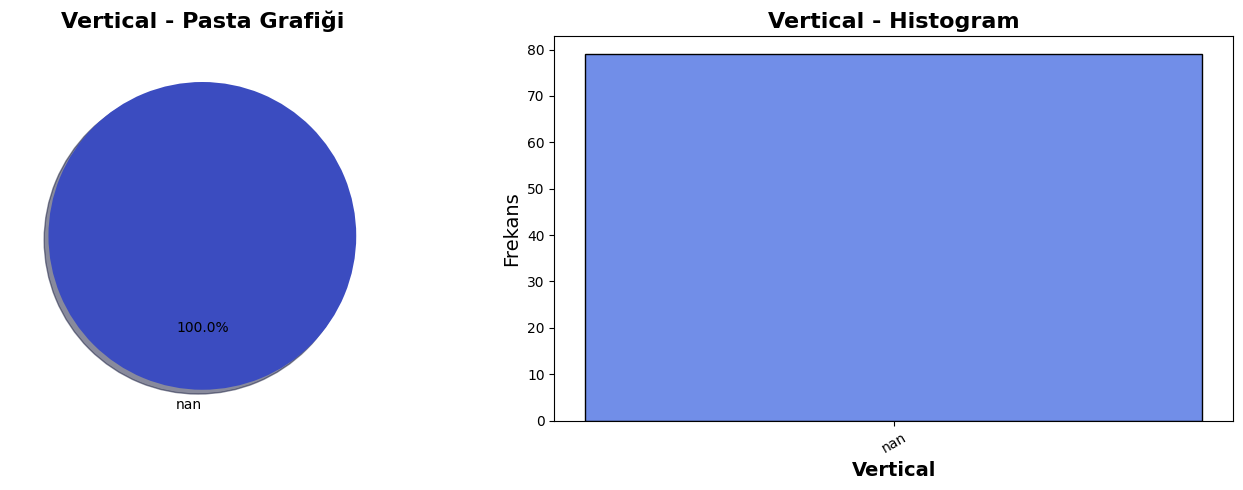


------------------------------------------------------------------------------------------------------------------------
                                   SUBVERTICAL DEĞİŞKENİ ANALİZİ (Unique Değerler: 0)                                   
------------------------------------------------------------------------------------------------------------------------



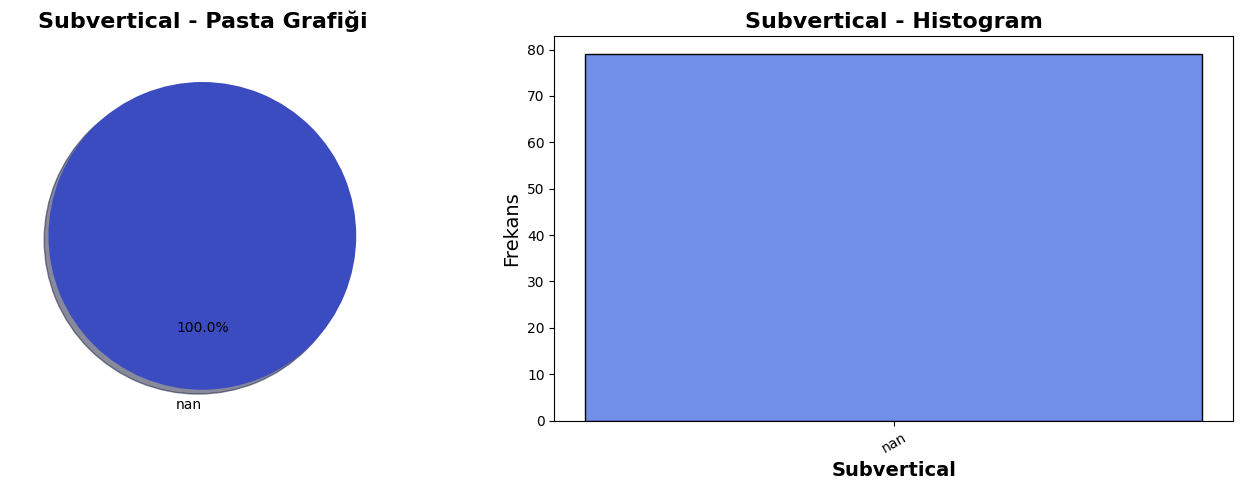


------------------------------------------------------------------------------------------------------------------------
                                     STATUS DEĞİŞKENİ ANALİZİ (Unique Değerler: 4)                                      
------------------------------------------------------------------------------------------------------------------------



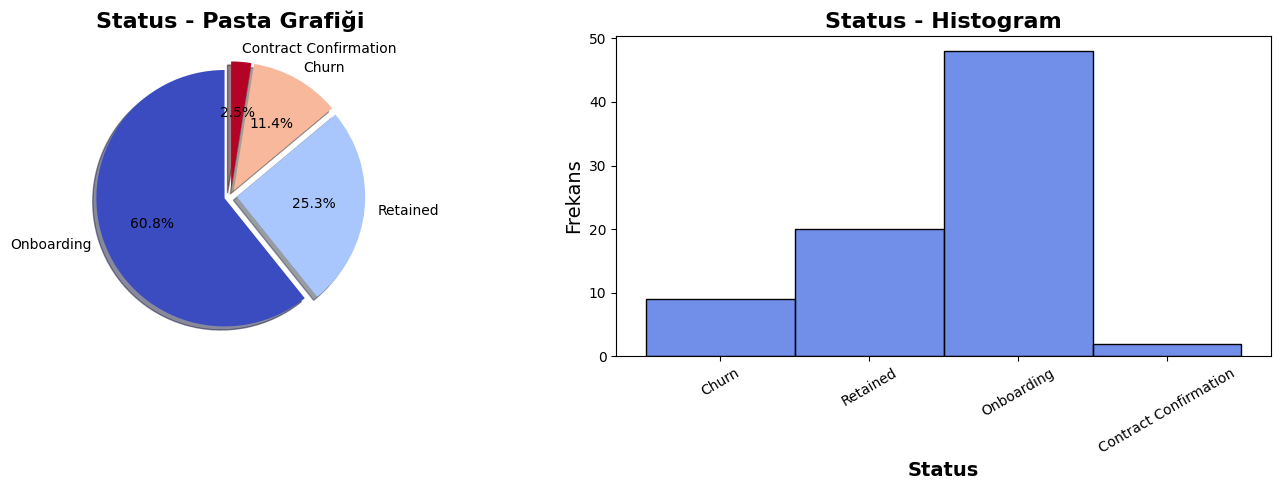


------------------------------------------------------------------------------------------------------------------------
                                 CUSTOMER LEVEL DEĞİŞKENİ ANALİZİ (Unique Değerler: 3)                                  
------------------------------------------------------------------------------------------------------------------------



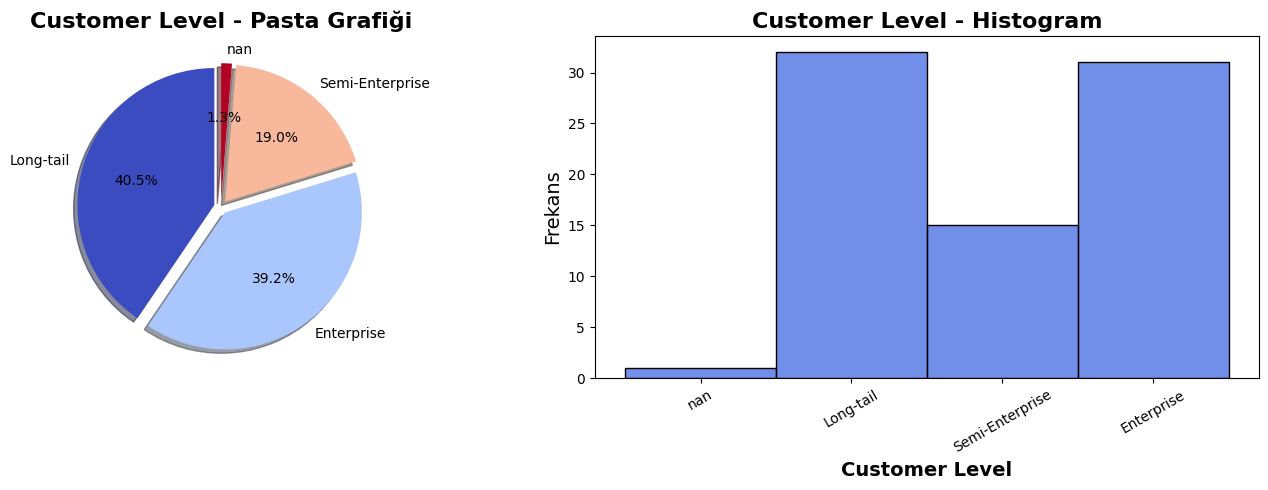

✅ EKSİK SATIRLARI ATTIKTAN SONRAKİ VERİNİN BOYUTLARI (2546, 6)


In [93]:
region_status_df = df_sozluk["RegionAndVertical_Data"].merge(
    df_sozluk["StatusAndLevel_Data"], on="Customer ID", how="outer")

print(f"🔍 BİRLEŞMİŞ VERİNİN İLK BOYUTLARI: {region_status_df.shape}")

drop_region_status_df = region_status_df[region_status_df["Vertical"].isnull() & region_status_df["Subvertical"].isnull()]

print(f"🗑️ {drop_region_status_df.shape[0]} KADAR SATIR VERTİCAL VE SUBVERTİCAL DEĞERLERİ İKİSİ BİRLİKTE BOŞ OLDUĞU İÇİN ATILIYOR")

df_isim = "silinecek_region_status_df"
kat_sutunlar, say_sutunlar = kat_num_analiz(df_isim, drop_region_status_df)
kat_ozet(drop_region_status_df, df_isim, kat_sutunlar)

region_status_df = region_status_df.dropna(subset=["Vertical", "Subvertical"])

print(f"✅ EKSİK SATIRLARI ATTIKTAN SONRAKİ VERİNİN BOYUTLARI {region_status_df.shape}")

df_sozluk["Region_Status_Data"] = region_status_df


# **📊 Veri Setlerinin Temizlenmesi & Eksik Değer İşleme**

## **🔹 Genel Bakış**
Bu süreç, **CSAT_Survey_Data**, **RegionAndVertical_Data**, ve **StatusAndLevel_Data** veri setlerindeki eksik verileri analiz eder ve eksik değerleri uygun yöntemlerle işler. **Veri kalitesini artırmak ve analiz edilebilir hale getirmek için** belirli sütunlardaki boş değerleri doldurma veya satırları silme işlemleri gerçekleştirilir.

---

## **🔍 Uygulanan Adımlar**
### **1️⃣ Customer ID Eksikse Satırların Silinmesi**
- **"RegionAndVertical_Data" ve "StatusAndLevel_Data"** veri setlerinde **"Customer ID" eksikse bu satırlar silinir.**  
- **Bunun nedeni:** "Customer ID" müşteriyle ilişkili tüm veriler için birincil anahtar niteliğindedir. Eksik olması, satırın analiz için geçersiz olduğu anlamına gelir.

🔹 **Silinen Satırlar:**  
- `"RegionAndVertical_Data"` → `{eksik_id_sayisi} satır`  
- `"StatusAndLevel_Data"` → `{eksik_id_sayisi} satır`  

---

### **2️⃣ "Vertical" ve "Subvertical" Eksik Olan Satırların Silinmesi**
- `"RegionAndVertical_Data"` veri setinde hem `"Vertical"` hem de `"Subvertical"` sütunları **aynı anda NaN ise** satırlar kaldırılır.
- **Bunun nedeni:**  
  - `"Vertical"` ve `"Subvertical"` müşteri segmentasyonu için önemli olup **her ikisi de eksikse sektör bilgisi kaybolur**.  
  - Bu satırların tutulması analiz sürecini bozar.

🔹 **Silinen Satırlar:** `{silinecek_satirlar} satır`

---

### **3️⃣ Eksik Değerlerin Doldurulması**
Veri setlerindeki eksik değerler **sütun türüne uygun** şekilde doldurulmuştur:

#### **📌 "How frequently are you using our platform"**
- **Doldurma yöntemi:** **Mod (en sık kullanılan değer)**
- **Sebep:** Bu tür veriler **kategorik veya derecelendirme bazlı** olabilir, en sık kullanılan değeri almak mantıklıdır.

#### **📌 Sayısal Sütunlar**
- **Doldurma yöntemi:** **Ortalama (`mean`)**
- **Sebep:** Eksik değerlerin en doğru tahmini, **ortalama değere yakın olmasıdır** .

#### **📌 Diğer Sütunlar**
- **Doldurma yöntemi:** **"Unknown"**
- **Sebep:** Kategorik verilerde eksik değerleri `"Unknown"` ile doldurmak, **veriyi analiz edilebilir tutar** ve yanlış sınıflandırmayı önler.

---



In [96]:
for df_isim, df in df_sozluk.items():

    if df_isim == "CSAT_Survey_Data":
        islenecek_sutunlar = [
            "How frequently are you using our platform",
            "Please rate the usability of the panel",
        ]
    
    elif df_isim == "RegionAndVertical_Data":
        islenecek_sutunlar = ["Region", "Vertical", "Subvertical"]
    
    elif df_isim == "StatusAndLevel_Data":
        islenecek_sutunlar = ["Customer Level"]
    
    else:
        continue 

    if df_isim in ["RegionAndVertical_Data", "StatusAndLevel_Data"] and "Customer ID" in df.columns:
        eksik_id_sayisi = df["Customer ID"].isna().sum()
        df = df.dropna(subset=["Customer ID"])
        print(f"🗑️ {df_isim}: {eksik_id_sayisi} kadar satır idleri eksik olduğundan dolayı silindi. ✅")

    if df_isim == "RegionAndVertical_Data" and "Vertical" in df.columns and "Subvertical" in df.columns:
        silme_kosulu = df["Vertical"].isna() & df["Subvertical"].isna()
        silinecek_satirlar = silme_kosulu.sum()
        df = df.drop(df[silme_kosulu].index)  
        print(f"🗑️ {df_isim}: {silinecek_satirlar} kadar satır vertical ve subverticalleri eksik olduğundan silindi. ✅")

    for sutun in islenecek_sutunlar:
        if sutun in df.columns:  
            if sutun == "How frequently are you using our platform":
                mod_degeri = df[sutun].mode()[0]
                df[sutun] = df[sutun].fillna(mod_degeri)
                print(f"📊 {df_isim}: '{sutun}' sütunu ({mod_degeri}) ile dolduruldu. ✅")

            elif df[sutun].dtype in ["float64", "int64"]: 
                ortalama_deger = df[sutun].mean()
                df[sutun] = df[sutun].fillna(ortalama_deger)
                print(f"📊 {df_isim}: '{sutun}' ({ortalama_deger}) ile dolduruldu. ✅")

            else:
                df.loc[:, sutun] = df[sutun].fillna("Unknown") 
                print(f"📝 {df_isim}: '{sutun}' 'Unknown' ile dolduruldu. ✅")

    df_sozluk[df_isim] = df

📊 CSAT_Survey_Data: 'How frequently are you using our platform' sütunu (Once a Day) ile dolduruldu. ✅
📊 CSAT_Survey_Data: 'Please rate the usability of the panel' (4.036363636363636) ile dolduruldu. ✅
🗑️ RegionAndVertical_Data: 0 kadar satır idleri eksik olduğundan dolayı silindi. ✅
🗑️ RegionAndVertical_Data: 0 kadar satır vertical ve subverticalleri eksik olduğundan silindi. ✅
📝 RegionAndVertical_Data: 'Region' 'Unknown' ile dolduruldu. ✅
📝 RegionAndVertical_Data: 'Vertical' 'Unknown' ile dolduruldu. ✅
📝 RegionAndVertical_Data: 'Subvertical' 'Unknown' ile dolduruldu. ✅
🗑️ StatusAndLevel_Data: 0 kadar satır idleri eksik olduğundan dolayı silindi. ✅
📝 StatusAndLevel_Data: 'Customer Level' 'Unknown' ile dolduruldu. ✅


# **📊 CSAT Anket Verisinin Temizlenmesi ve Sayısallaştırılması**

## **🔹 Genel Bakış**
Bu işlem, **CSAT (Customer Satisfaction - Müşteri Memnuniyeti) Anket Verisini** temizleyerek, eksik verileri işleyerek ve kategorik sütunları sayısal hale getirerek daha analiz edilebilir bir formata dönüştürmeyi amaçlamaktadır.

---

## **🔍 Uygulanan Adımlar**
### **1️⃣ "Customer ID" Sütununun Sayısal Hale Getirilmesi**
- `"Customer ID"` içindeki `"CRM-"` ifadesi kaldırıldı ve **tamsayıya dönüştürüldü.**

### **2️⃣ Gereksiz "Year" Sütununun Kaldırılması**
- **Tüm veriler 2022 yılına ait** olduğu için `"Year"` sütunu kaldırıldı.

### **3️⃣ "Survey Date" ve "Response Date" Sütunlarının Tarih Formatına Çevrilmesi**
- **Tarih sütunları (`datetime`) formatına dönüştürüldü**.

### **4️⃣ "Yanıt Süresi" (Response Time) Hesaplanması**
- **Yanıt süresi**, `"Survey Date"` ile `"Response Date"` arasındaki gün farkı hesaplanarak `"Days Between Survey and Response"` sütunu oluşturuldu.

### **5️⃣ Kullanılmayan Tarih Sütunlarının Kaldırılması**
- `"Survey Date"` ve `"Response Date"` sütunları artık gereksiz olduğu için kaldırıldı.

### **6️⃣ Sütun Sırasının Düzenlenmesi**
- **Öncelikli sütunlar en başa alındı:**
  - `"Customer ID"`
  - `"Quarter"` 
  - `"Days Between Survey and Response"` 

### **7️⃣ "Platform Kullanım Sıklığı" Sütununun Sayısallaştırılması**
- `"How frequently are you using our platform"` sütunu aşağıdaki değerlere dönüştürüldü:
  - **"Once a Day" → `3`**
  - **"Once a Week" → `2`**
  - **"Once a Month" → `1`**

---

## **✅ Sonuçlar**
- **Müşteri Kimlikleri (Customer ID) artık tamamen sayısal hale getirildi.**
- **Gereksiz sütunlar kaldırıldı** ve veri seti daha düzenli hale getirildi.
- **Yanıt süresi hesaplandı**, böylece analizlerde kullanılabilecek ek bir metrik sağlandı.
- **"Platform Kullanım Sıklığı" kategorik verisi sayısal hale getirildi.**


In [97]:
def temizle_ve_donustur_csat(df):

    df['Customer ID'] = df['Customer ID'].str.replace('CRM-', '', regex=True).astype(np.int64)

    df.drop(columns=['Year'], inplace=True)

    df['Survey Date'] = pd.to_datetime(df['Survey Date'])
    df['Response Date'] = pd.to_datetime(df['Response Date'])

    df['Days Between Survey and Response'] = (df['Response Date'] - df['Survey Date']).dt.days

    df.drop(columns=['Survey Date', 'Response Date'], inplace=True)

    column_order = ['Customer ID', 'Quarter', 'Days Between Survey and Response'] + \
                   [col for col in df.columns if
                    col not in ['Customer ID', 'Quarter', 'Days Between Survey and Response']]
    df = df[column_order]

    df['How frequently are you using our platform'] = df['How frequently are you using our platform'].replace({
        'Once a Day': 3,
        'Once a Week': 2,
        'Once a Month': 1
    })
    return df



df_sozluk['CSAT_Survey_Data'] = temizle_ve_donustur_csat(df_sozluk['CSAT_Survey_Data'])



# **📊 Müşteri Durumu ve Seviyesi Verilerinin Temizlenmesi ve Sayısallaştırılması**

## **🔹 Genel Bakış**
Bu işlem, **StatusAndLevel_Data** veri setindeki `"Status"` (Müşteri Durumu) ve `"Customer Level"` (Müşteri Seviyesi) sütunlarını **gelir potansiyeline dayalı olarak** sayısal değerlere dönüştürmeyi amaçlamaktadır.  
Bu sayede müşteri segmentasyonu ve analiz süreçleri daha sağlıklı hale getirilecektir.

---

## **🔍 Uygulanan Adımlar**
### **1️⃣ "Customer ID" Sütununun Sayısal Hale Getirilmesi**
- `"Customer ID"` içinde bulunan `"CRM-"` ifadesi kaldırıldı.
- **Tamsayıya dönüştürüldü**.

---

### **2️⃣ `"Status"` Sütununun Gelir Bazlı Sayısallaştırılması**
Müşterinin gelir durumu göz önüne alınarak `"Status"` (Durum) sütunu aşağıdaki gibi sayısal değerlere dönüştürüldü:

| **Durum (Status)** | **Gelir Potansiyeli Değeri** | **Açıklama** |
|--------------------|----------------------------|--------------|
| **Churn** | `0` | Gelir kaybedildi, müşteri kaybı yaşandı |
| **Incomplete Deal** | `0.2` | Gelir yok, anlaşma tamamlanmadı |
| **In Opportunity Pipeline** | `0.5` | Henüz müşteri değil, potansiyel aday |
| **PoC (Proof of Concept)** | `0.8` | Potansiyel gelir var ama ödeme başlamadı |
| **Contract Confirmation** | `1` | Gelir potansiyeli yüksek, dönüşüm aşamasında |
| **Onboarding** | `2` | Müşteri oldu, ödeme yapmaya başladı |
| **Retained** | `5` | Tamamen oturmuş müşteri, maksimum gelir potansiyeli |



---

### **3️⃣ `"Customer Level"` Sütununun Gelir Potansiyeline Göre Dönüştürülmesi**
Müşterinin segmentine göre **gelir potansiyeli** aşağıdaki gibi sıralanmıştır:

| **Müşteri Seviyesi (Customer Level)** | **Sayısal Değer** | **Açıklama** |
|------------------------------------|----------------|--------------|
| **Long-tail** | `1` | Düşük gelirli müşteri segmenti |
| **Semi-Enterprise** | `2` | Orta ölçekli gelir potansiyeli |
| **Enterprise** | `3` | En yüksek gelir potansiyeli |

💡 **Not:** `"Long-"` ifadesi yanlış girilmişse, `"Long-tail"` olarak düzeltilmiştir.

---

## **✅ Sonuçlar**
- **"Customer ID" sayısal hale getirildi.**  
- **"Status" ve "Customer Level" sütunları gelir bazlı anlamlı sayısal değerlere dönüştürüldü.**  
- **Artık müşteri seviyeleri ve durumları analiz edilebilir hale geldi.**  
- **Bu sayısallaştırma sayesinde müşteri segmentasyonu, gelir tahmini ve churn analizi daha sağlıklı yapılabilir.**  


In [98]:
def temizle_ve_donustur_status_level(df):
    df=df.copy()
    df["Customer ID"] = df["Customer ID"].str.replace("CRM-", "", regex=True).astype("Int64")
    
    revenue_based_status_mapping = {
        "Churn": 0,
        "Incomplete Deal": 0.2,
        "In Opportunity Pipeline": 0.5,  
        "PoC": 0.8,  
        "Contract Confirmation": 1,  
        "Onboarding": 2,  
        "Retained": 5,  
    }

    revenue_based_level_mapping = {
        "Long-tail": 1,  
        "Semi-Enterprise": 2,  
        "Enterprise": 3  
    }

    df["Customer Level"] = df["Customer Level"].replace("Long-", "Long-tail")

    df["Status"] = df["Status"].map(revenue_based_status_mapping)
    df["Customer Level"] = df["Customer Level"].map(revenue_based_level_mapping)


    return df


df_sozluk["StatusAndLevel_Data"]=temizle_ve_donustur_status_level(df_sozluk["StatusAndLevel_Data"])

# **📊 Diğer Veri Setlerinin Temizlenmesi ve Sayısallaştırılması**

## **🔹 Genel Bakış**
Bu süreç, müşteri verilerini içeren farklı veri setlerini temizleyerek, **"Customer ID"** ve **sayısal verilere sahip sütunları** uygun formatlara dönüştürmeyi amaçlamaktadır.  
Bunun için **modüler ve yeniden kullanılabilir** bir fonksiyon oluşturulmuştur.

---

## **🔍 Uygulanan Adımlar**
### **1️⃣ Genel Amaçlı Veri Dönüştürme Fonksiyonu**
Fonksiyon, her veri seti için aşağıdaki işlemleri uygular:

- **"Customer ID" sütunu temizlenir**  
  - `"CRM-"` öneki kaldırılarak **tamsayıya çevrilir**.
  
- **Belirtilen sayısal sütunlar dönüştürülür**  
  - İçerdiği özel karakterler (`"$"`, `","` vb.) temizlenir.
  - `pd.to_numeric()` kullanılarak sayısal formata çevrilir.

---

### **2️⃣ Veri Setlerinin Temizlenmesi**
Bu fonksiyon farklı veri setlerine **dinamik olarak** uygulanmıştır:

| **Veri Seti** | **Uygulanan İşlemler** |
|--------------|----------------|
| **Customer_Age_Data** | `"CRM ID"` sütunu sayısal hale getirildi. |
| **Customer_MRR_Data** | `"MRR"` sayısallaştırıldı. |
| **Customer_Revenue_Data** | `"Total Revenue"` sayısallaştırıldı. |
| **Help_Ticket_Data** | `"CRM ID"` sütunu sayısal hale getirildi. |
| **Newsletter_Interaction_Data** | `"CRM ID"` sütunu sayısal hale getirildi. |
| **Product_Bug_Task_Data** | `"CRM ID"` sütunu sayısal hale getirildi. |
| **StatusAndLevel_Data** | `"CRM ID"` sütunu sayısal hale getirildi. |

---

## **✅ Sonuçlar**
- **"Customer ID" sütunları tamamen sayısal hale getirildi.**  
- **Mali veriler ("MRR", "Total Revenue") sayısal formata çevrildi.**  
- **Özel karakterlerden arındırıldı, veri analizi ve modelleme için daha uygun hale getirildi.**  
- **Tüm işlemler modüler fonksiyon kullanılarak yapıldı, böylece kod tekrarından kaçınıldı.**  


In [99]:
def temizle_ve_donustur_diger(df, customer_id_sutun="Customer ID", say_sutunlar=None):
    df = df.copy()  

    if customer_id_sutun in df.columns:
        df[customer_id_sutun] = df[customer_id_sutun].astype(str).str.replace("CRM-", "", regex=True).astype("Int64")

    if say_sutunlar:
        for say_sutun in say_sutunlar:
            if say_sutun in df.columns:
                df[say_sutun] = pd.to_numeric(df[say_sutun].astype(str).str.replace(r"[^\d]", "", regex=True), errors="coerce")

    return df

df_sozluk["Customer_Age_Data"] = temizle_ve_donustur_diger(df_sozluk["Customer_Age_Data"], customer_id_sutun="CRM ID")
df_sozluk["Customer_MRR_Data"] = temizle_ve_donustur_diger(df_sozluk["Customer_MRR_Data"], say_sutunlar=["MRR"])
df_sozluk["Customer_Revenue_Data"] = temizle_ve_donustur_diger(df_sozluk["Customer_Revenue_Data"], say_sutunlar=["Total Revenue"])
df_sozluk["Help_Ticket_Data"] = temizle_ve_donustur_diger(df_sozluk["Help_Ticket_Data"])
df_sozluk["RegionAndVertical_Data"] = temizle_ve_donustur_diger(df_sozluk["RegionAndVertical_Data"])
df_sozluk["Newsletter_Interaction_Data"] = temizle_ve_donustur_diger(df_sozluk["Newsletter_Interaction_Data"])
df_sozluk["Product_Bug_Task_Data"] = temizle_ve_donustur_diger(df_sozluk["Product_Bug_Task_Data"])
df_sozluk["StatusAndLevel_Data"] = temizle_ve_donustur_diger(df_sozluk["StatusAndLevel_Data"])

# **📊 Sayısal Değişkenler İçin Boxplot Görselleştirmesi**

## **🔹 Genel Bakış**
Bu fonksiyon, **yukarıdaki sayısallaştırma işlemlerinden sonra veri setlerinin yeni hallerini boxplot halinde görselleştirir**.  
Bu sayede **aşırı uç değerler (outliers)** ve **değer dağılımları** görselleştirilerek incelenebilir.

---

## **🔍 Fonksiyonun İşleyişi**
### **1️⃣ Sayısal Değişkenlerin Seçilmesi**
- `df.select_dtypes(include=[np.number])` kullanılarak **tüm sayısal değişkenler seçilir**.
- `"Customer ID"` ve `"CRM ID"` gibi **kimlik bilgileri içeren sütunlar hariç tutulur**, çünkü bu sütunların dağılımını analiz etmek anlamlı değildir.

### **2️⃣ Boxplot Görselleştirmesi**
- **Her sayısal sütun için ayrı bir boxplot oluşturulur**.

---

## **📌 Örnek Kullanım**
Eğer **"Customer_MRR_Data"** veri setindeki sayısal değişkenleri analiz etmek istersek:
```python
plot_numeric_boxplots(df_dict["Customer_MRR_Data"])
```
## **✅ Sonuçlar**
- **Revenue değişkeni için çizilen boxplot geniş gelir skalasından dolayı tamamıyla yansıtılamadı.**  
- **Birçok veride aykırı değerler gözlemlendi (her kesimden müşteri verisi bulunduğu için).**  

In [100]:
def boxplot_ciz(df):
    say_sutunlar = df.select_dtypes(include=[np.number]).columns
    say_sutunlar = [col for col in say_sutunlar if "id" not in col.lower()]  

    if len(say_sutunlar) == 0:
        print("Sayısal sütun bulunamadı")
        return
    
    for say_sutun in say_sutunlar:
        plt.figure(figsize=(10, 5))  
        sns.boxplot(x=df[say_sutun], color="salmon")
        plt.xlabel(say_sutun, fontsize=14, fontweight="bold")
        plt.title(f"{say_sutun} - Boxplot", fontsize=16, fontweight="bold")
        plt.show()  


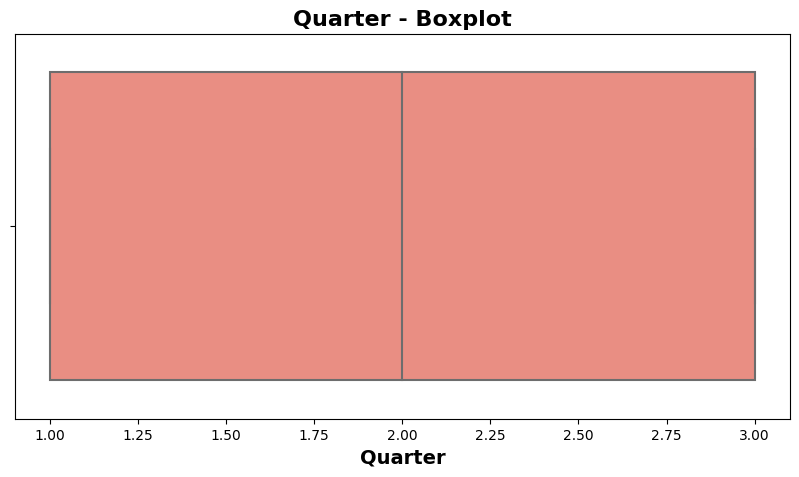

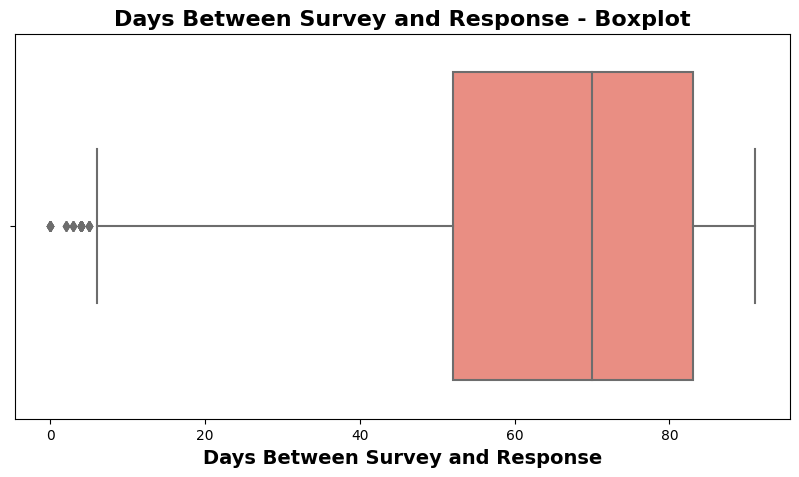

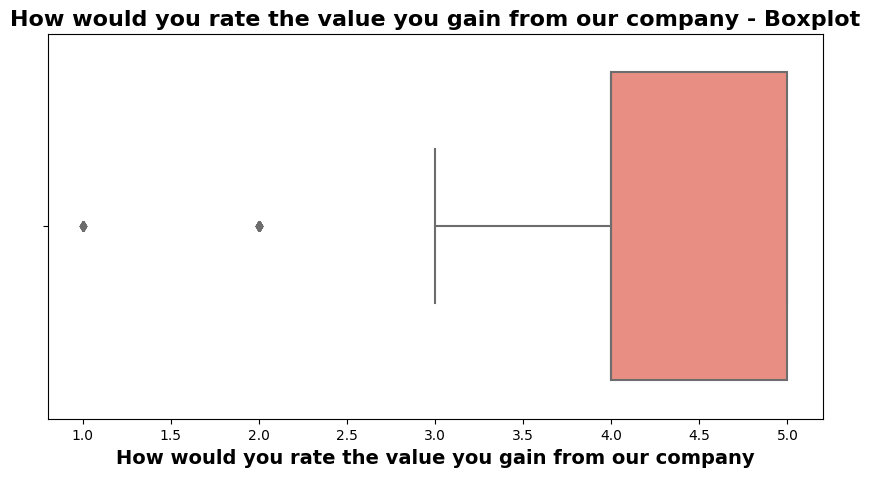

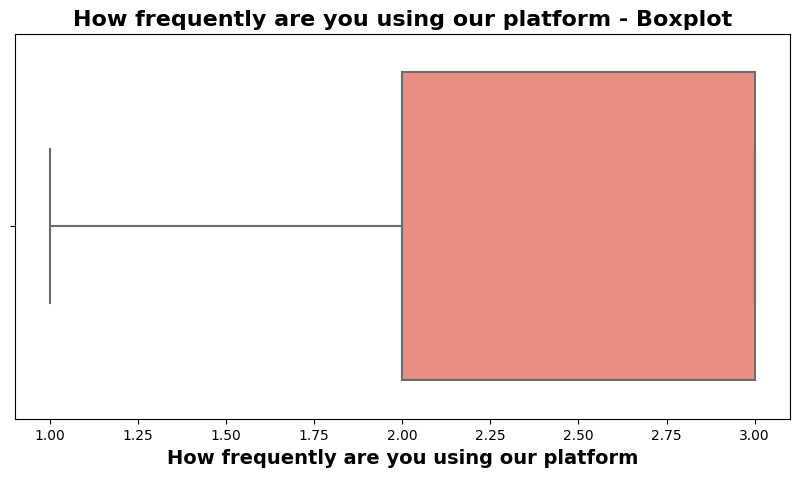

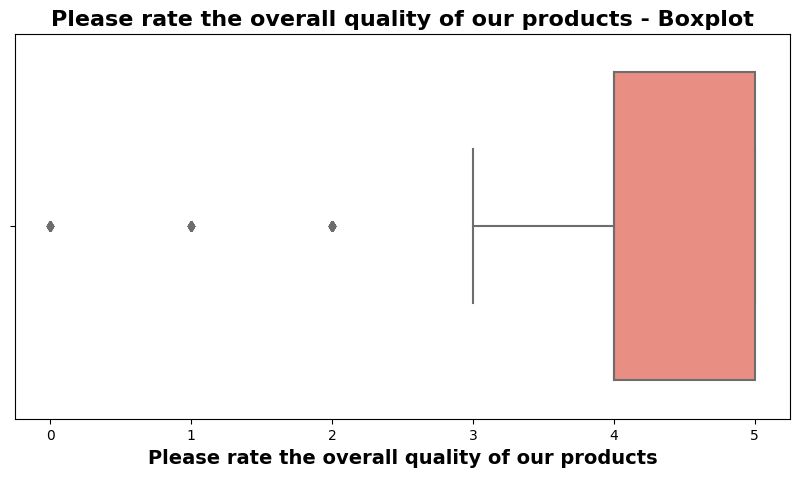

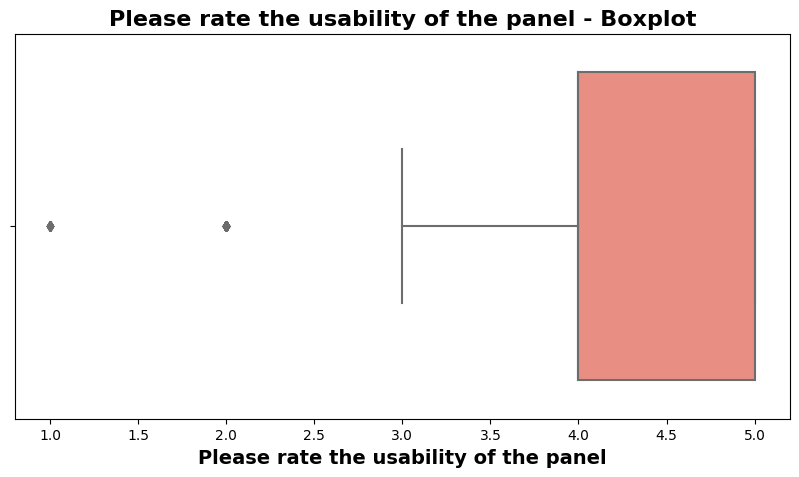

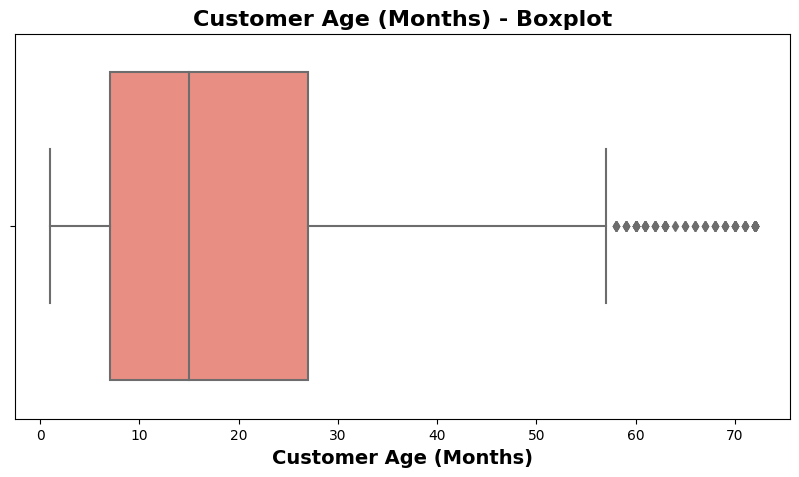

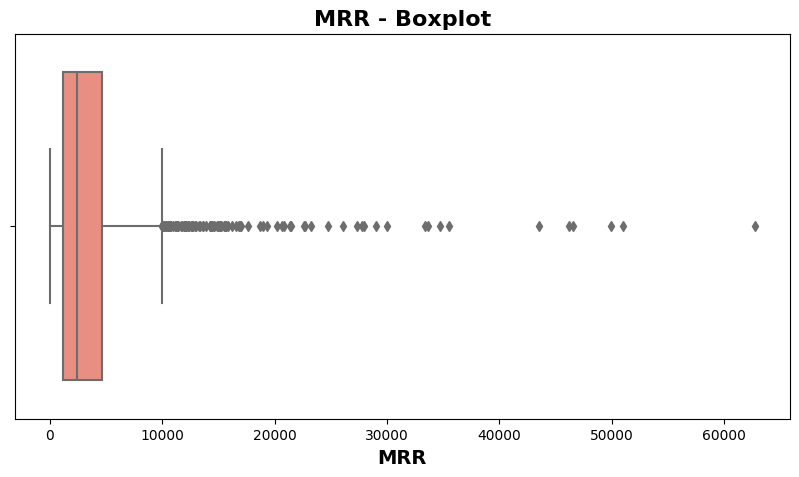

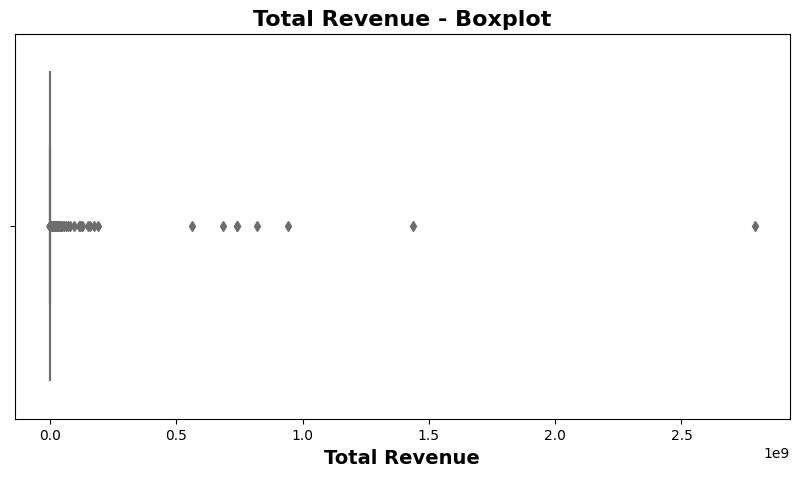

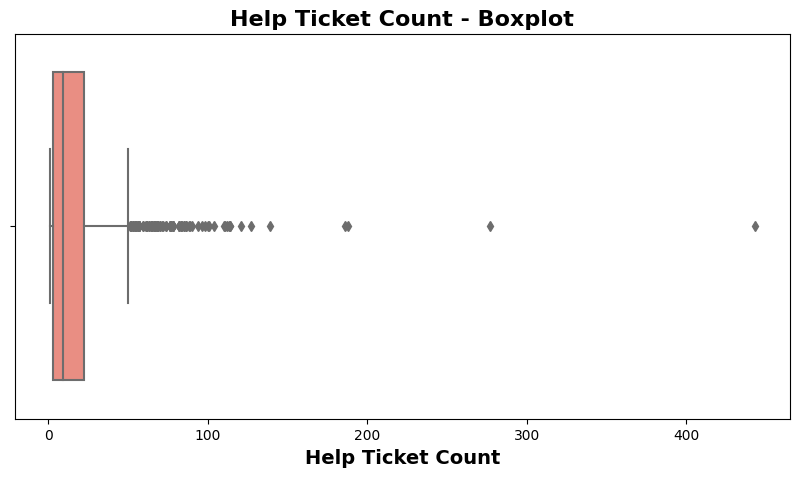

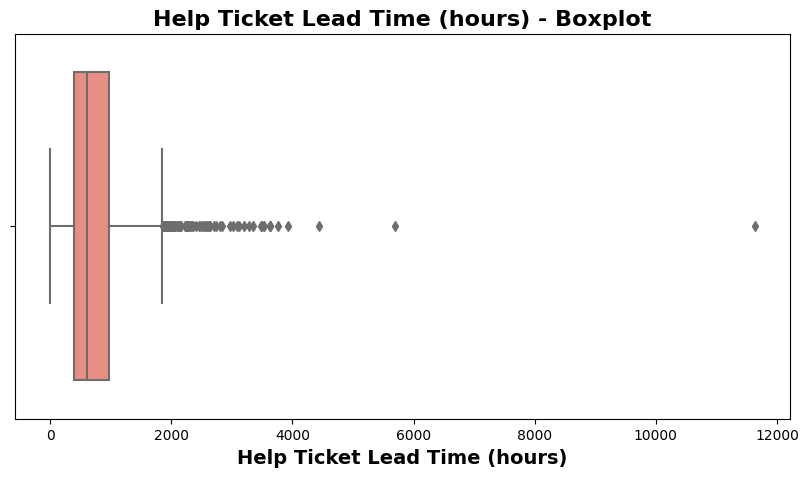

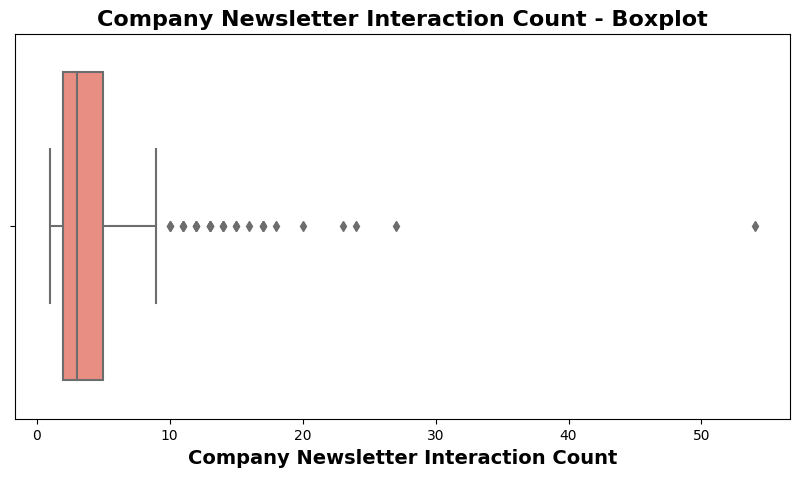

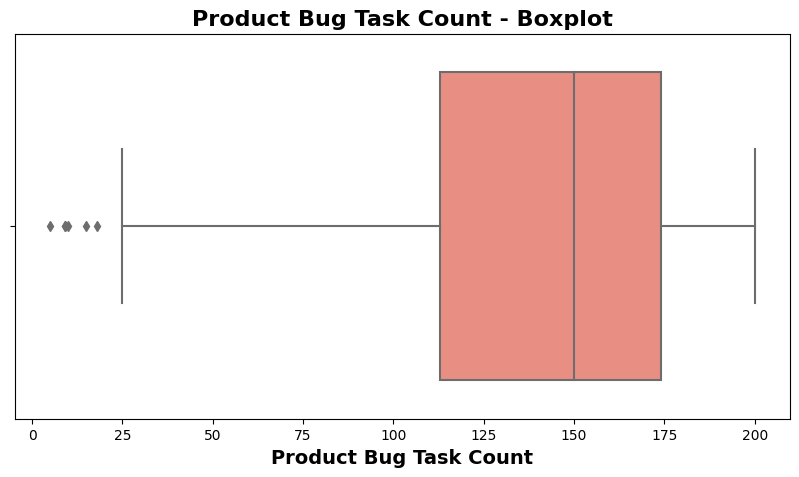

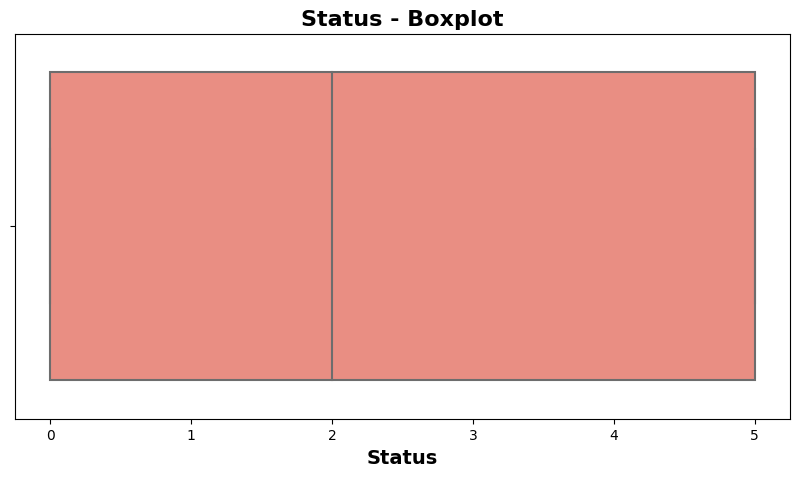

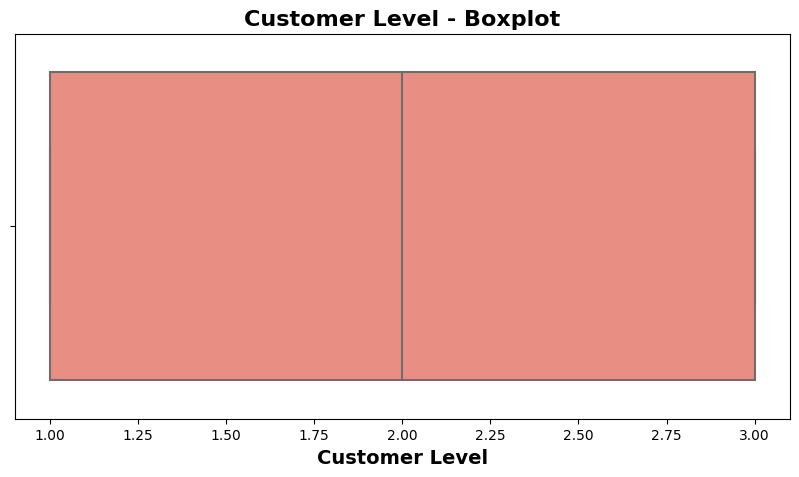

In [101]:
df_list=["CSAT_Survey_Data","Customer_Age_Data","Customer_MRR_Data","Customer_Revenue_Data","Help_Ticket_Data","Newsletter_Interaction_Data","Product_Bug_Task_Data","StatusAndLevel_Data"]

for df in df_list:
    boxplot_ciz(df_sozluk[df])

# **📊 Korelasyon Heatmap Görselleştirmesi**

## **🔹 Genel Bakış**
Bu fonksiyon, **veri setindeki sayısal değişkenler arasındaki korelasyonları görselleştiren bir heatmap (ısı haritası) oluşturur**.  
Bu sayede **değişkenler arasındaki ilişkiler** kolayca analiz edilebilir.

---

## **🔍 Fonksiyonun İşleyişi**
### **1️⃣ Sadece Sayısal Sütunların Seçilmesi**
- `df_sayisal.corr()` kullanılarak **sayısal değişkenler arasındaki korelasyon matrisi hesaplanır**.

### **2️⃣ Üst Üçgen Matrisin Kullanılması**
- **Korelasyon matrisi simetrik olduğundan**, **sadece üst üçgen (diagonal hariç) kullanılır**.
- `np.triu()` fonksiyonu ile **gereksiz tekrarları önleyerek** temiz bir görselleştirme elde edilir.

### **3️⃣ Korelasyon Heatmap Çizimi**
- **`seaborn.heatmap()` kullanılarak** korelasyonlar görselleştirilir.

---

## **📌 Örnek Kullanım**
Eğer **"Customer_MRR_Data"** veri setindeki değişkenler arasındaki korelasyonları analiz etmek istersek:
```python
plot_correlation_heatmap(df_dict["Customer_MRR_Data"])
```

In [102]:
def heatmap_ciz(df):
    df_sayisal = df.select_dtypes(include=[np.number])
    kor_matris = df_sayisal.corr()
        
    ust_ucgen_matris = kor_matris.where(np.triu(np.ones(kor_matris.shape), k=1).astype(bool))
        
    plt.figure(figsize=(16, 10), dpi=150)
    sns.heatmap(ust_ucgen_matris, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Heat Map', fontsize=14)
    plt.show()


# **📊 Veri Setlerinin Birleştirilmesi ve Korelasyon Analizi**

## **🔹 Genel Bakış**
Bu süreçte, **farklı veri setleri birleştirilerek** müşteri segmentasyonu, gelir, destek talepleri ve memnuniyet anketi sonuçları arasındaki ilişkiler analiz edilmektedir.  
Birleştirilen veri setleri üzerinde **korelasyon heatmap (ısı haritası) görselleştirmesi** yapılmıştır.

---

## **🔍 Uygulanan Adımlar**
### **1️⃣ "Customer_Age_Data" Veri Setinin Güncellenmesi**
- `"CRM ID"` sütunu `"Customer ID"` olarak yeniden adlandırılmıştır.

### **2️⃣ "CSAT_Survey_Data" Veri Setindeki Gereksiz Sütunun Kaldırılması**
- `"Please rate your understanding of our reporting capabilities in the panel"` sütunu kaldırılmıştır.

### **3️⃣ Veri Setlerinin Birleştirilmesi**
| **Yeni Veri Seti** | **Birleştirilen Veri Kaynakları** | **Açıklama** |
|--------------------|---------------------------------|--------------|
| **mrr_revenue_df** | `"Customer_MRR_Data"` + `"Customer_Revenue_Data"` | MRR ve gelir verileri birleştirildi |
| **mrr_revenue_age_df** | `mrr_revenue_df` + `"Customer_Age_Data"` | Gelir + yaş bilgisi eklendi |
| **mrr_ticket_df** | `"Customer_MRR_Data"` + `"Help_Ticket_Data"` | MRR + müşteri destek verileri |
| **mrr_ticket_age_df** | `mrr_ticket_df` + `"Customer_Age_Data"` | Destek talepleri + müşteri yaşı |
| **mrr_csat_df** | `"Customer_MRR_Data"` + `"CSAT_Survey_Data"` | MRR + müşteri memnuniyeti anketi |
| **mrr_revenue_age_ticket_df** | `mrr_revenue_age_df` + `"Help_Ticket_Data"` | Gelir + yaş + destek talepleri |
| **mrr_revenue_age_ticket_csat_df** | `mrr_revenue_age_df` + `"CSAT_Survey_Data"` | Gelir + yaş + müşteri memnuniyeti |

💡 **Birleştirme yöntemi:**  
- `"inner"` kullanılarak **sadece ortak müşterilere ait veriler** birleştirilmiştir.

---

### **4️⃣ Korelasyon Analizi**
Birleştirilen veri setleri bir **liste** olarak saklanarak **korelasyon heatmap (ısı haritası) fonksiyonuna** gönderilmiştir:

```python
kor_list = [
    mrr_revenue_df, mrr_revenue_age_df, mrr_ticket_df, 
    mrr_ticket_age_df, mrr_csat_df, mrr_revenue_age_ticket_csat
]

heatmap_ciz(kor_list)


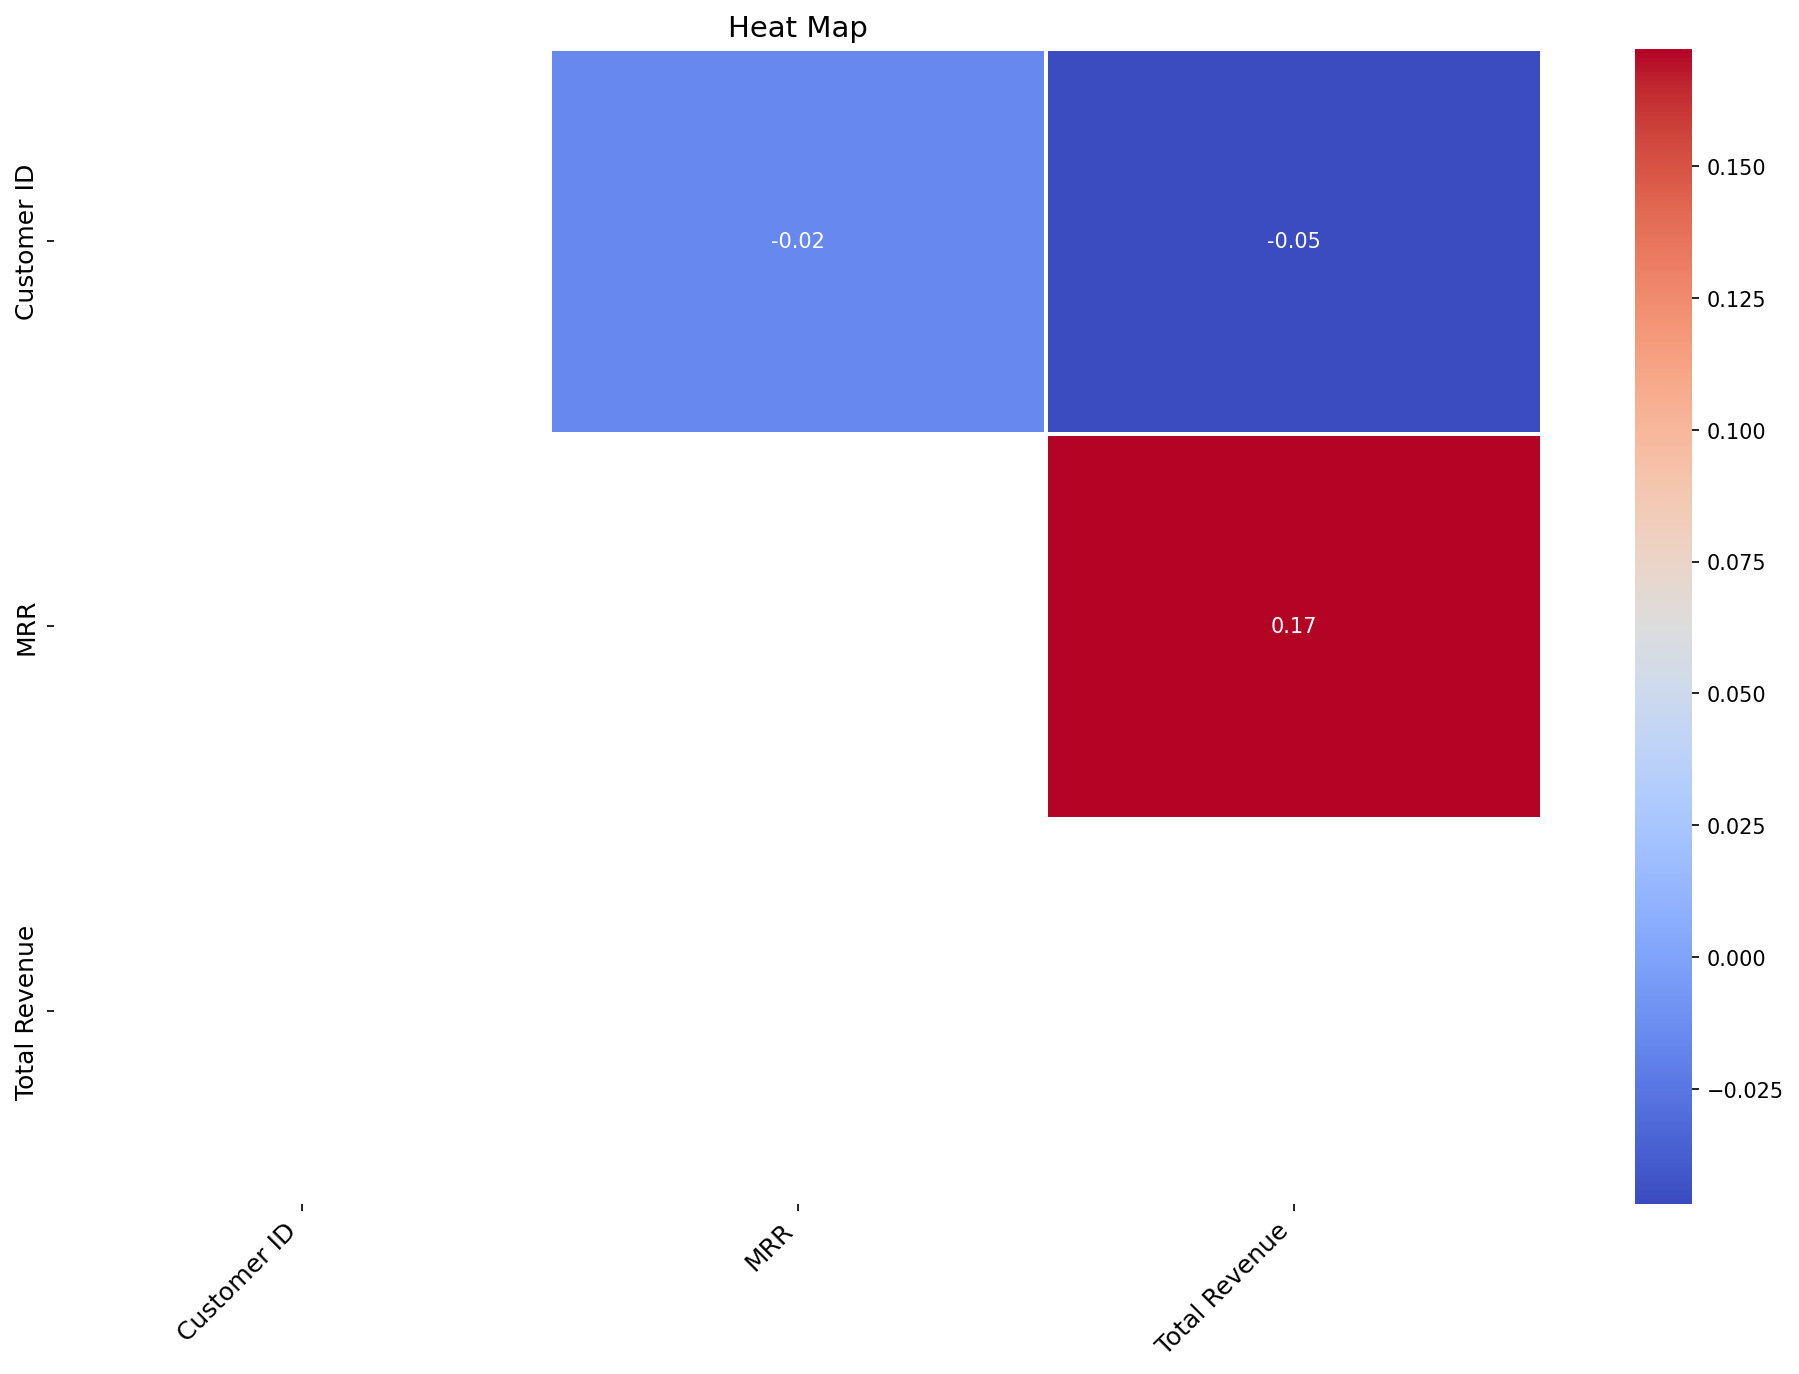

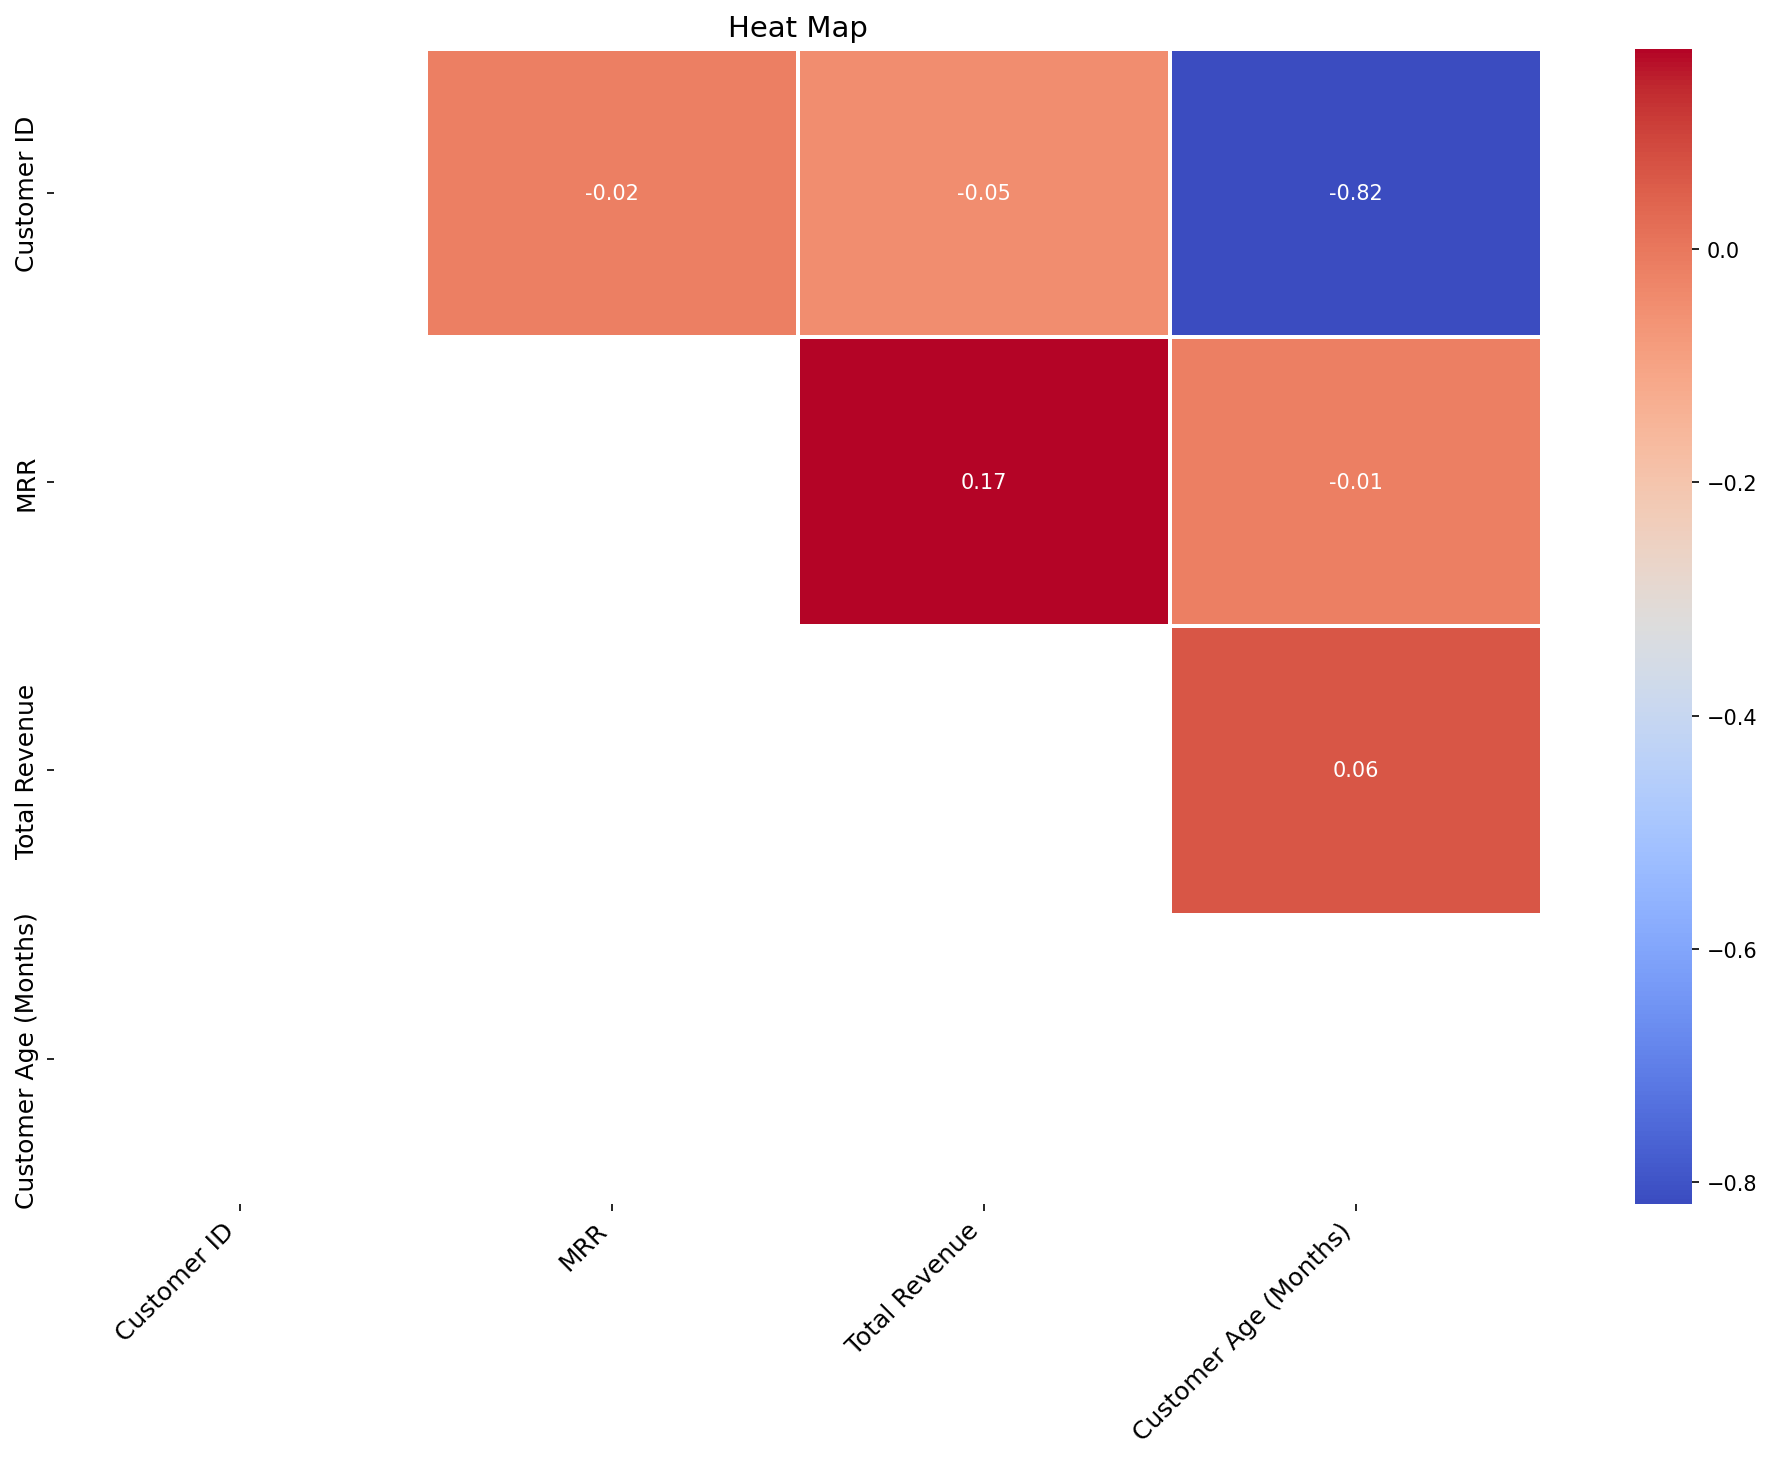

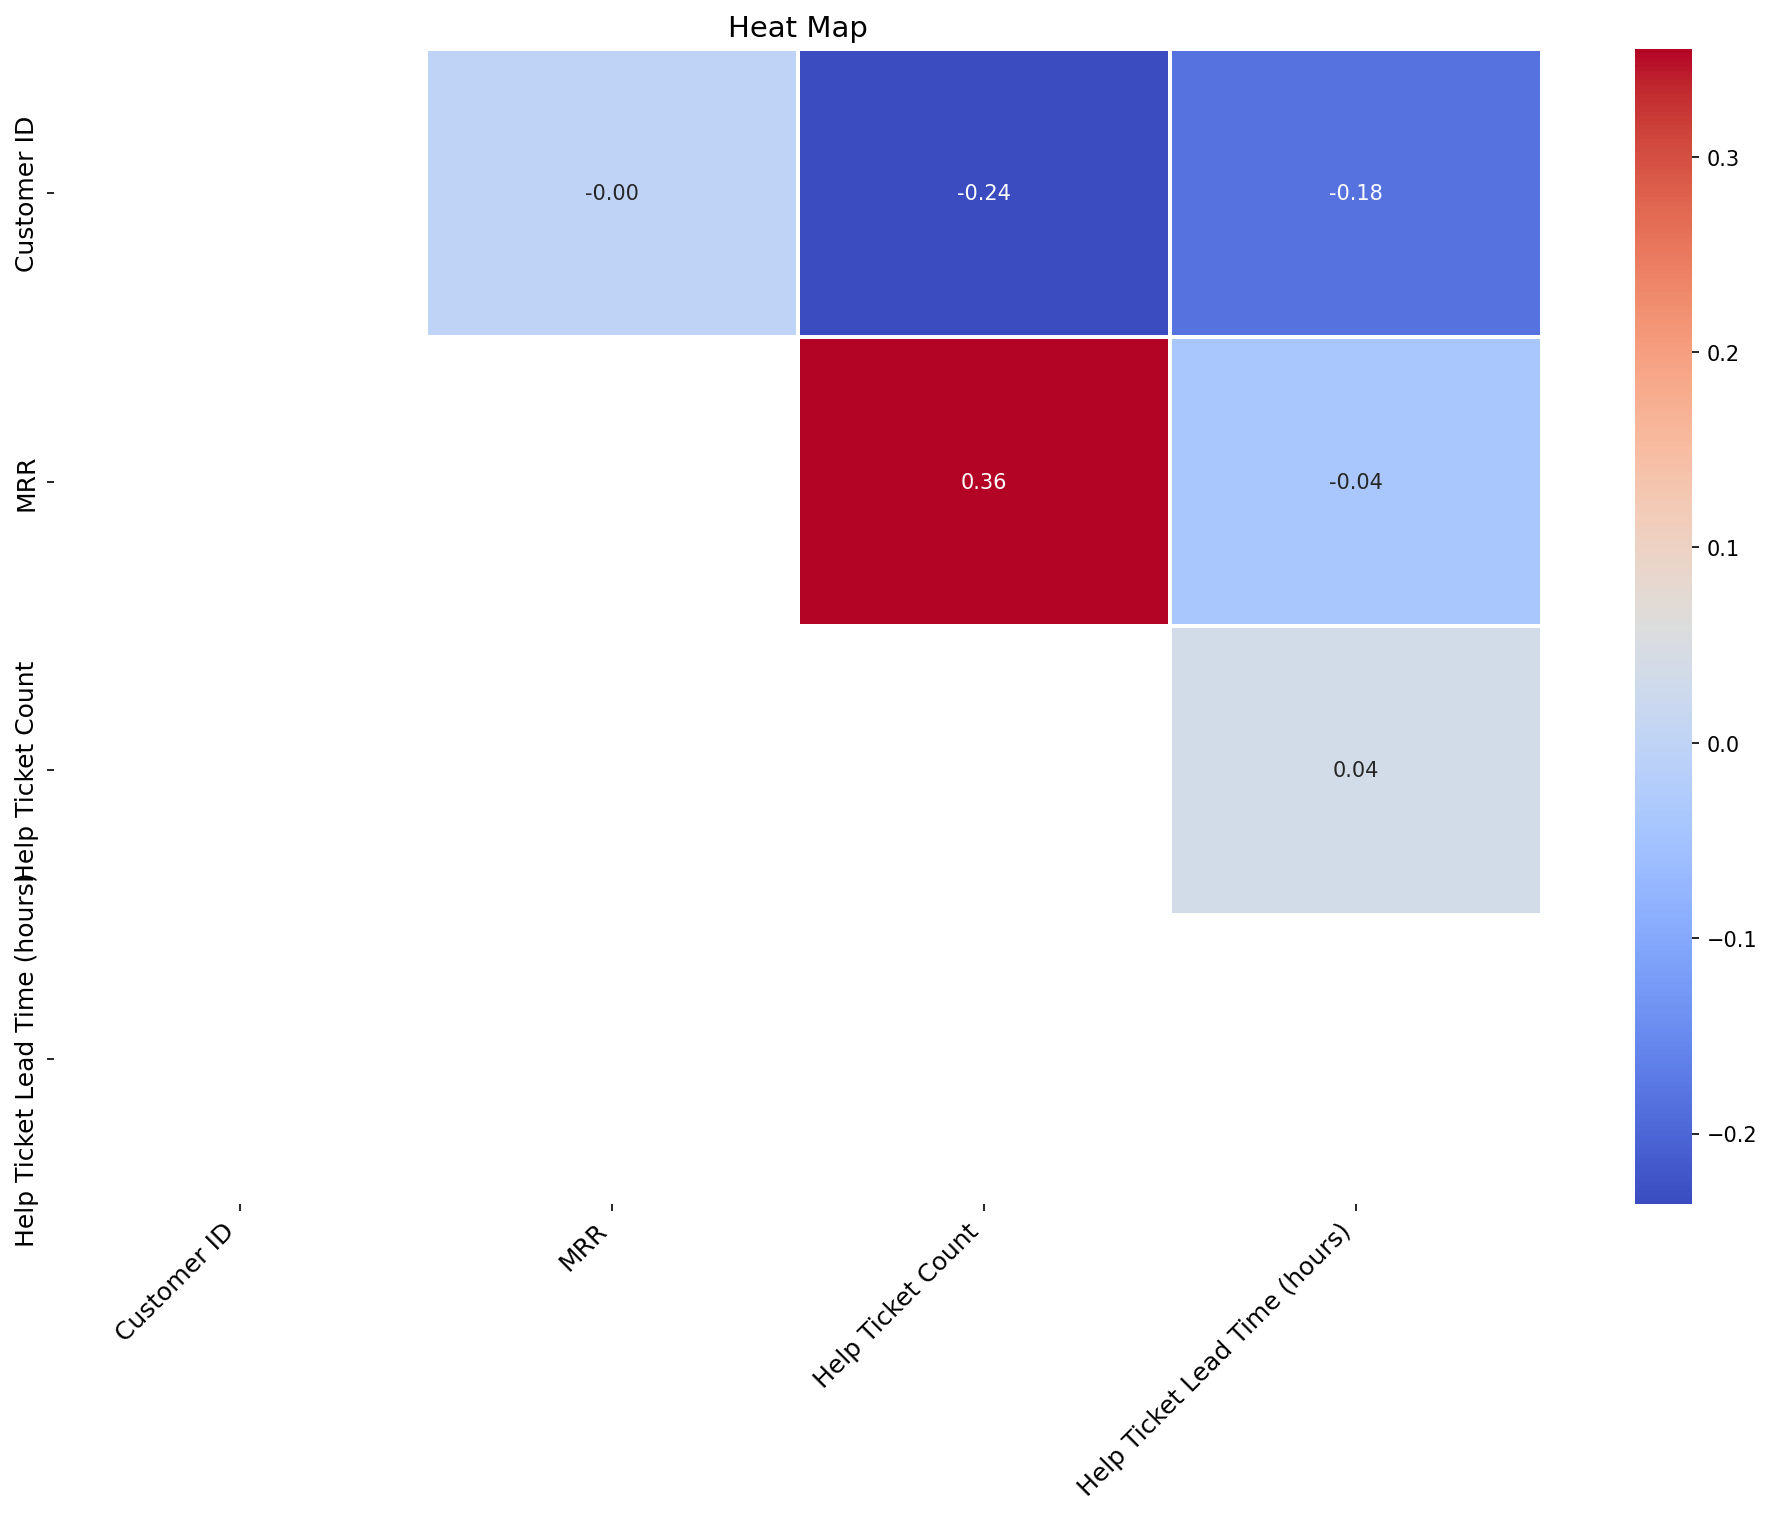

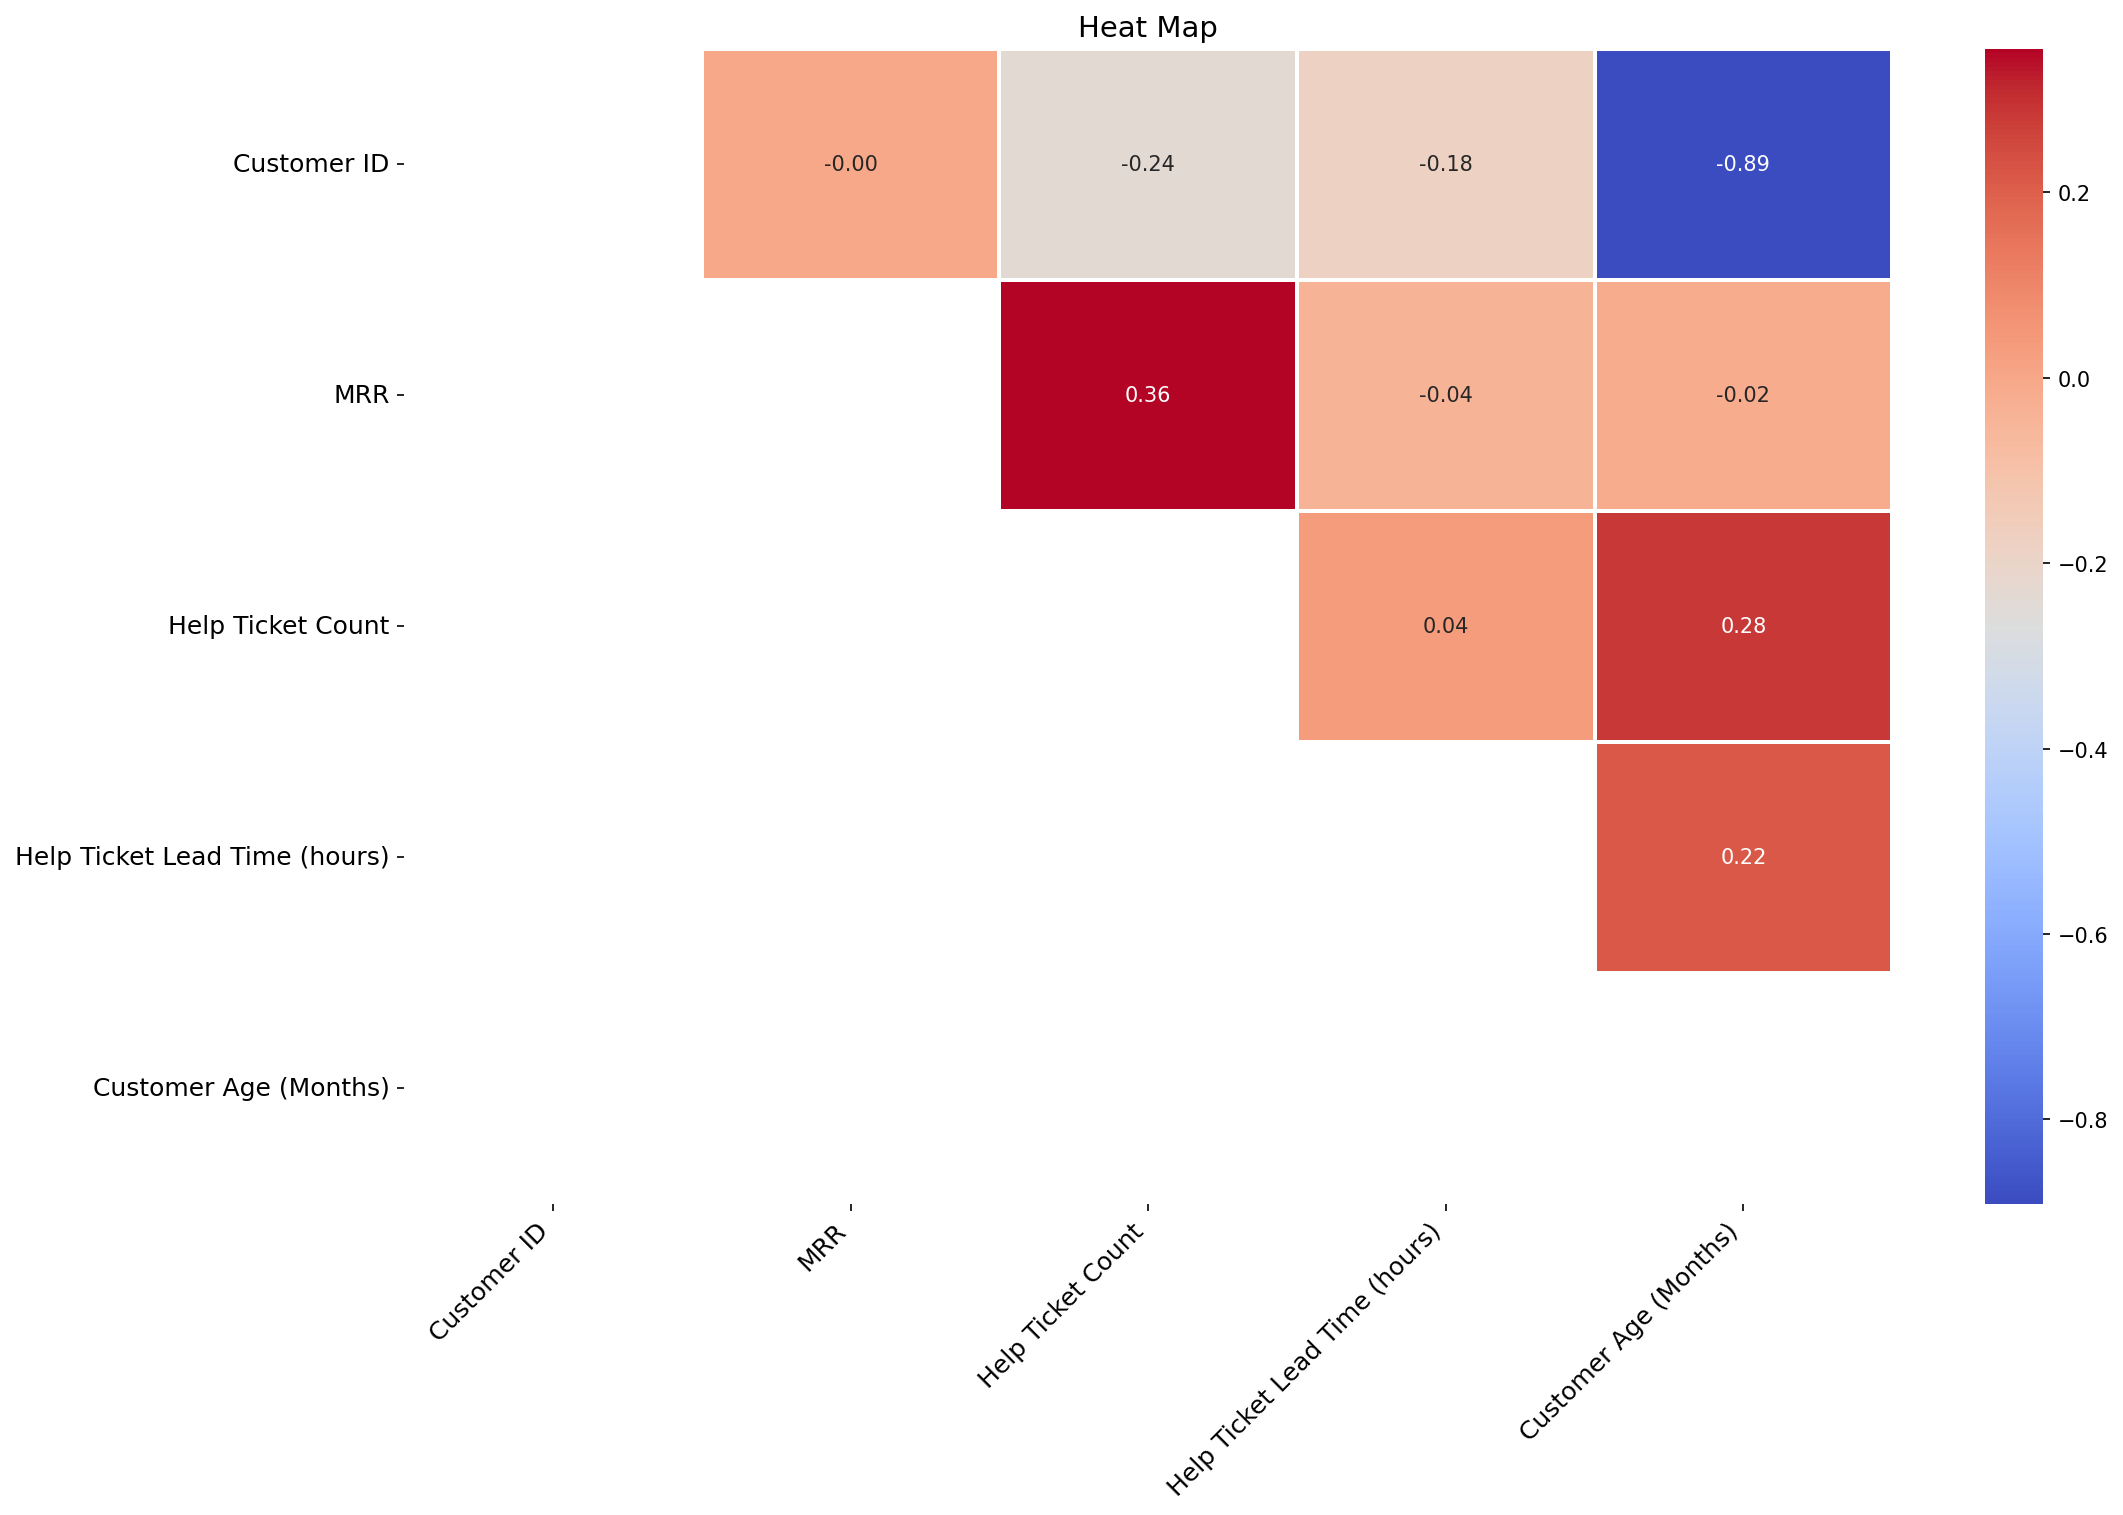

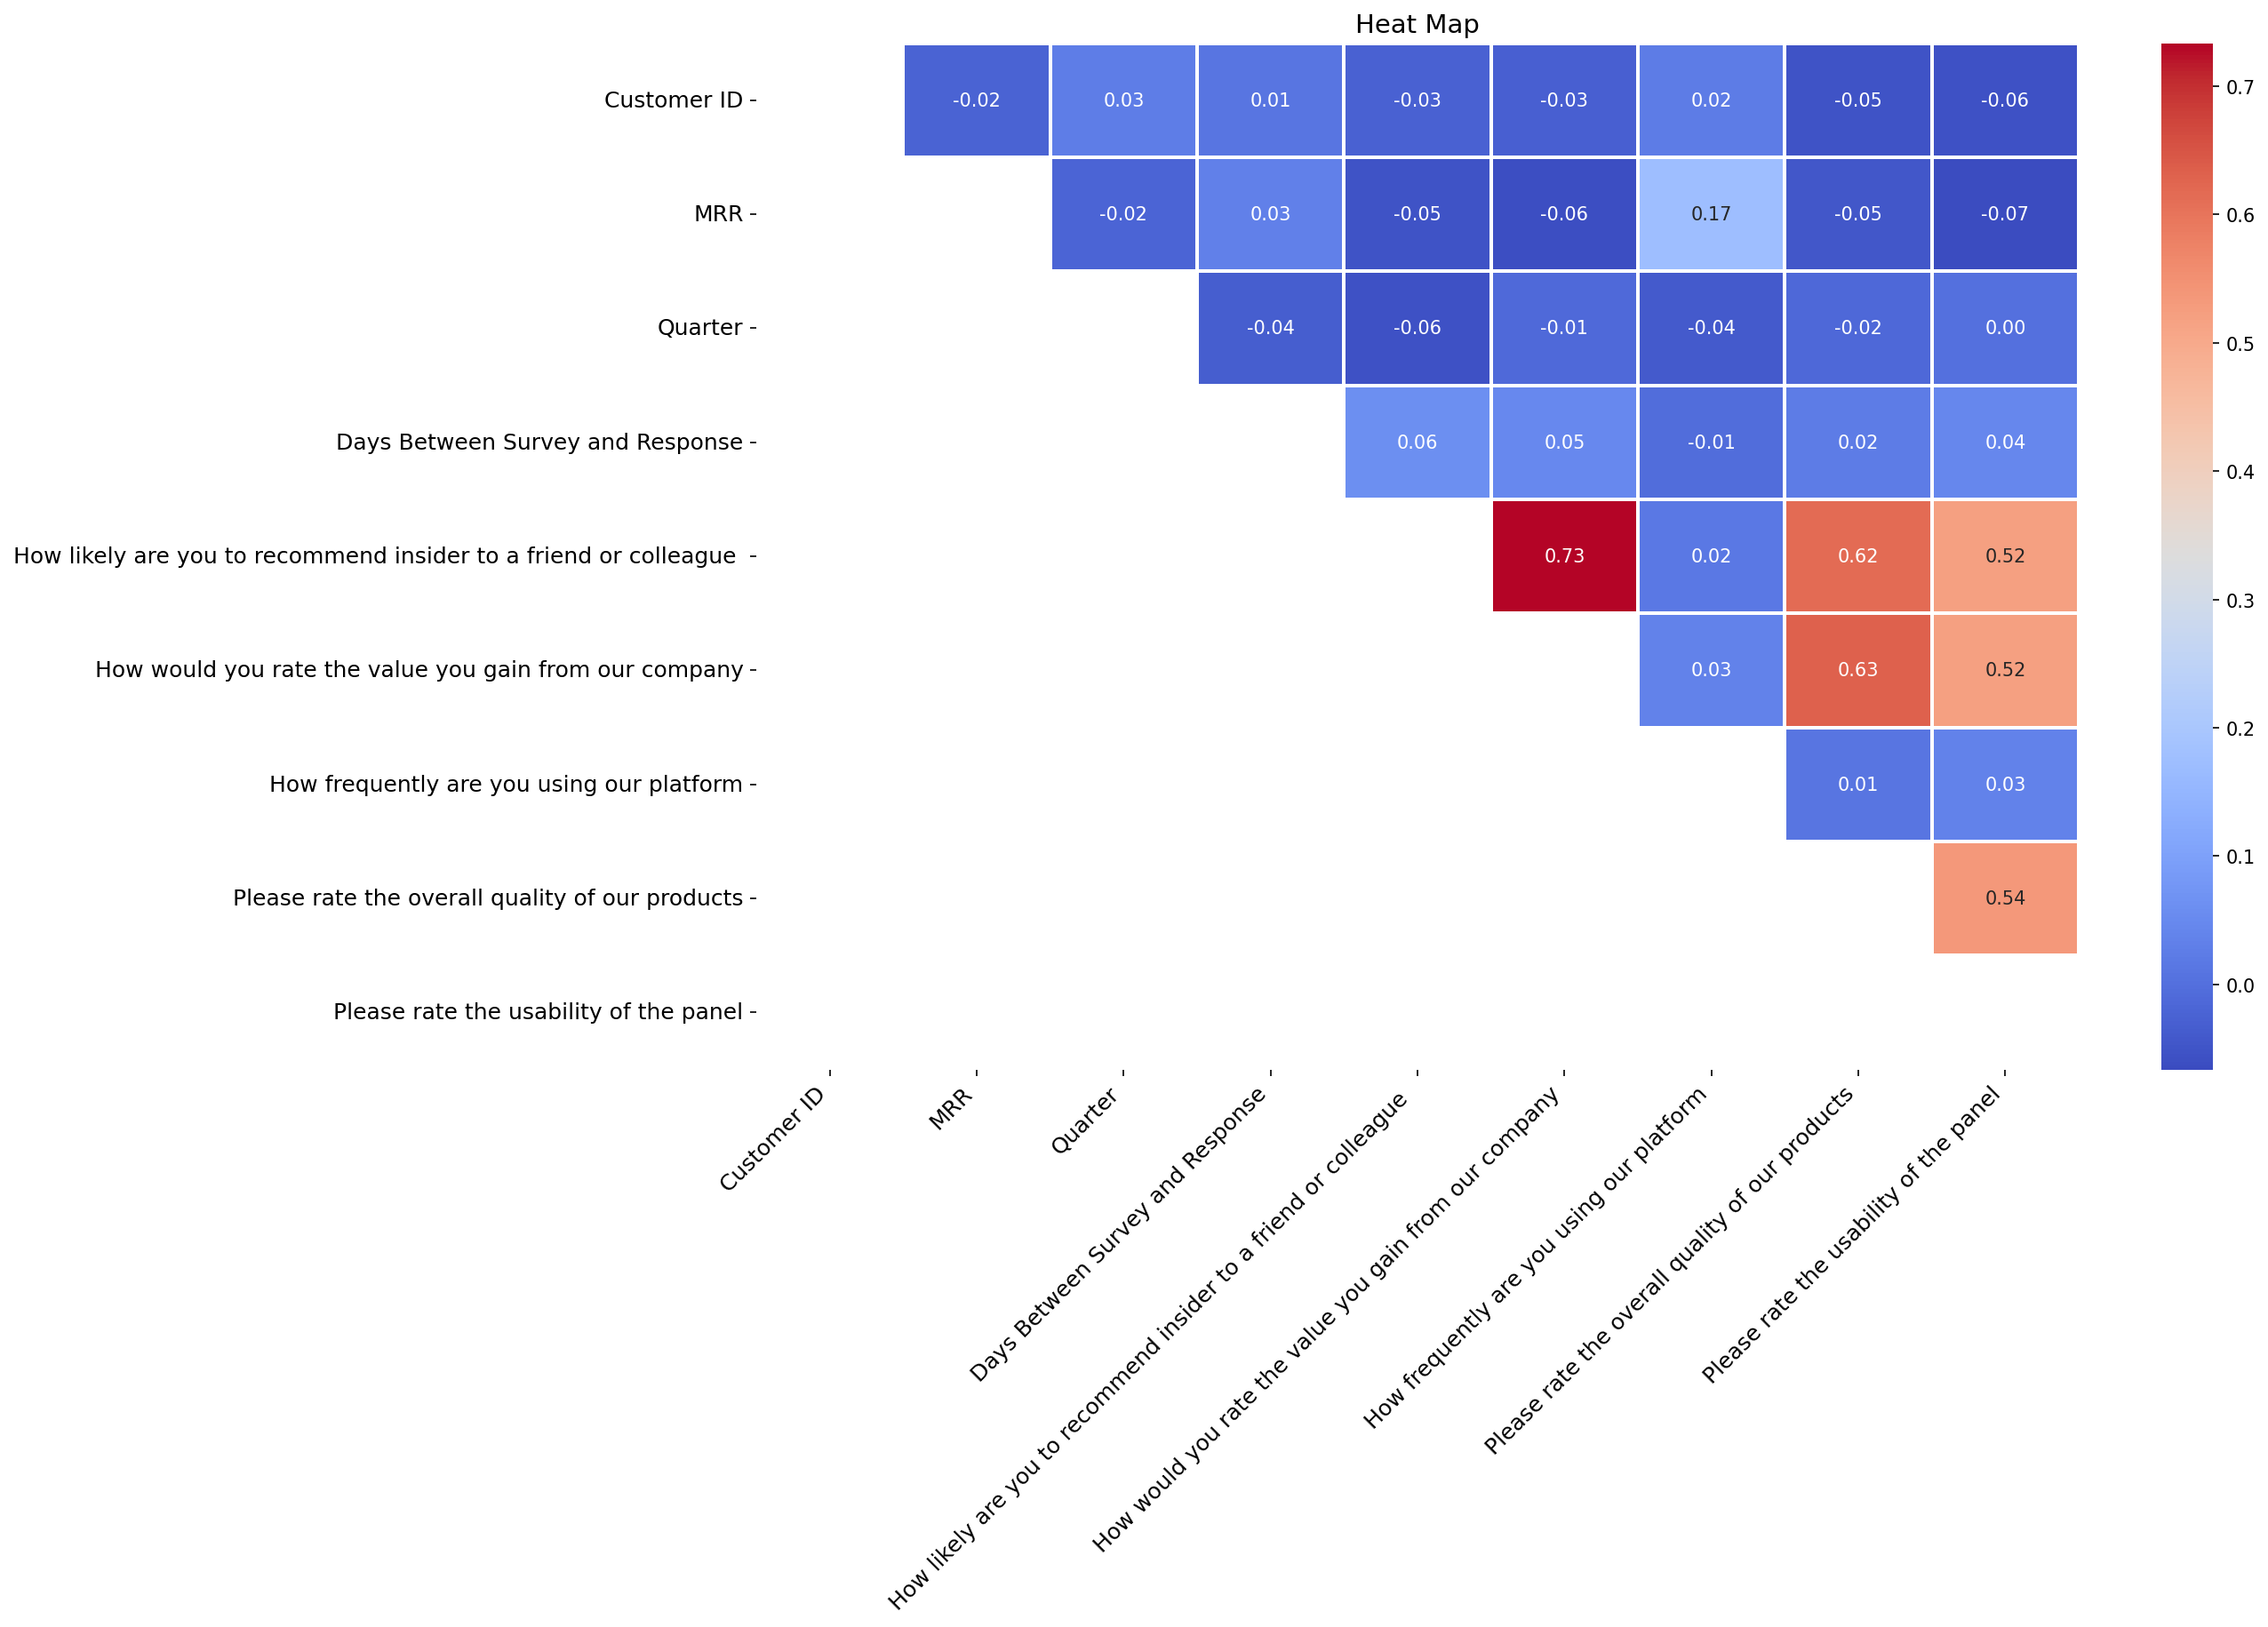

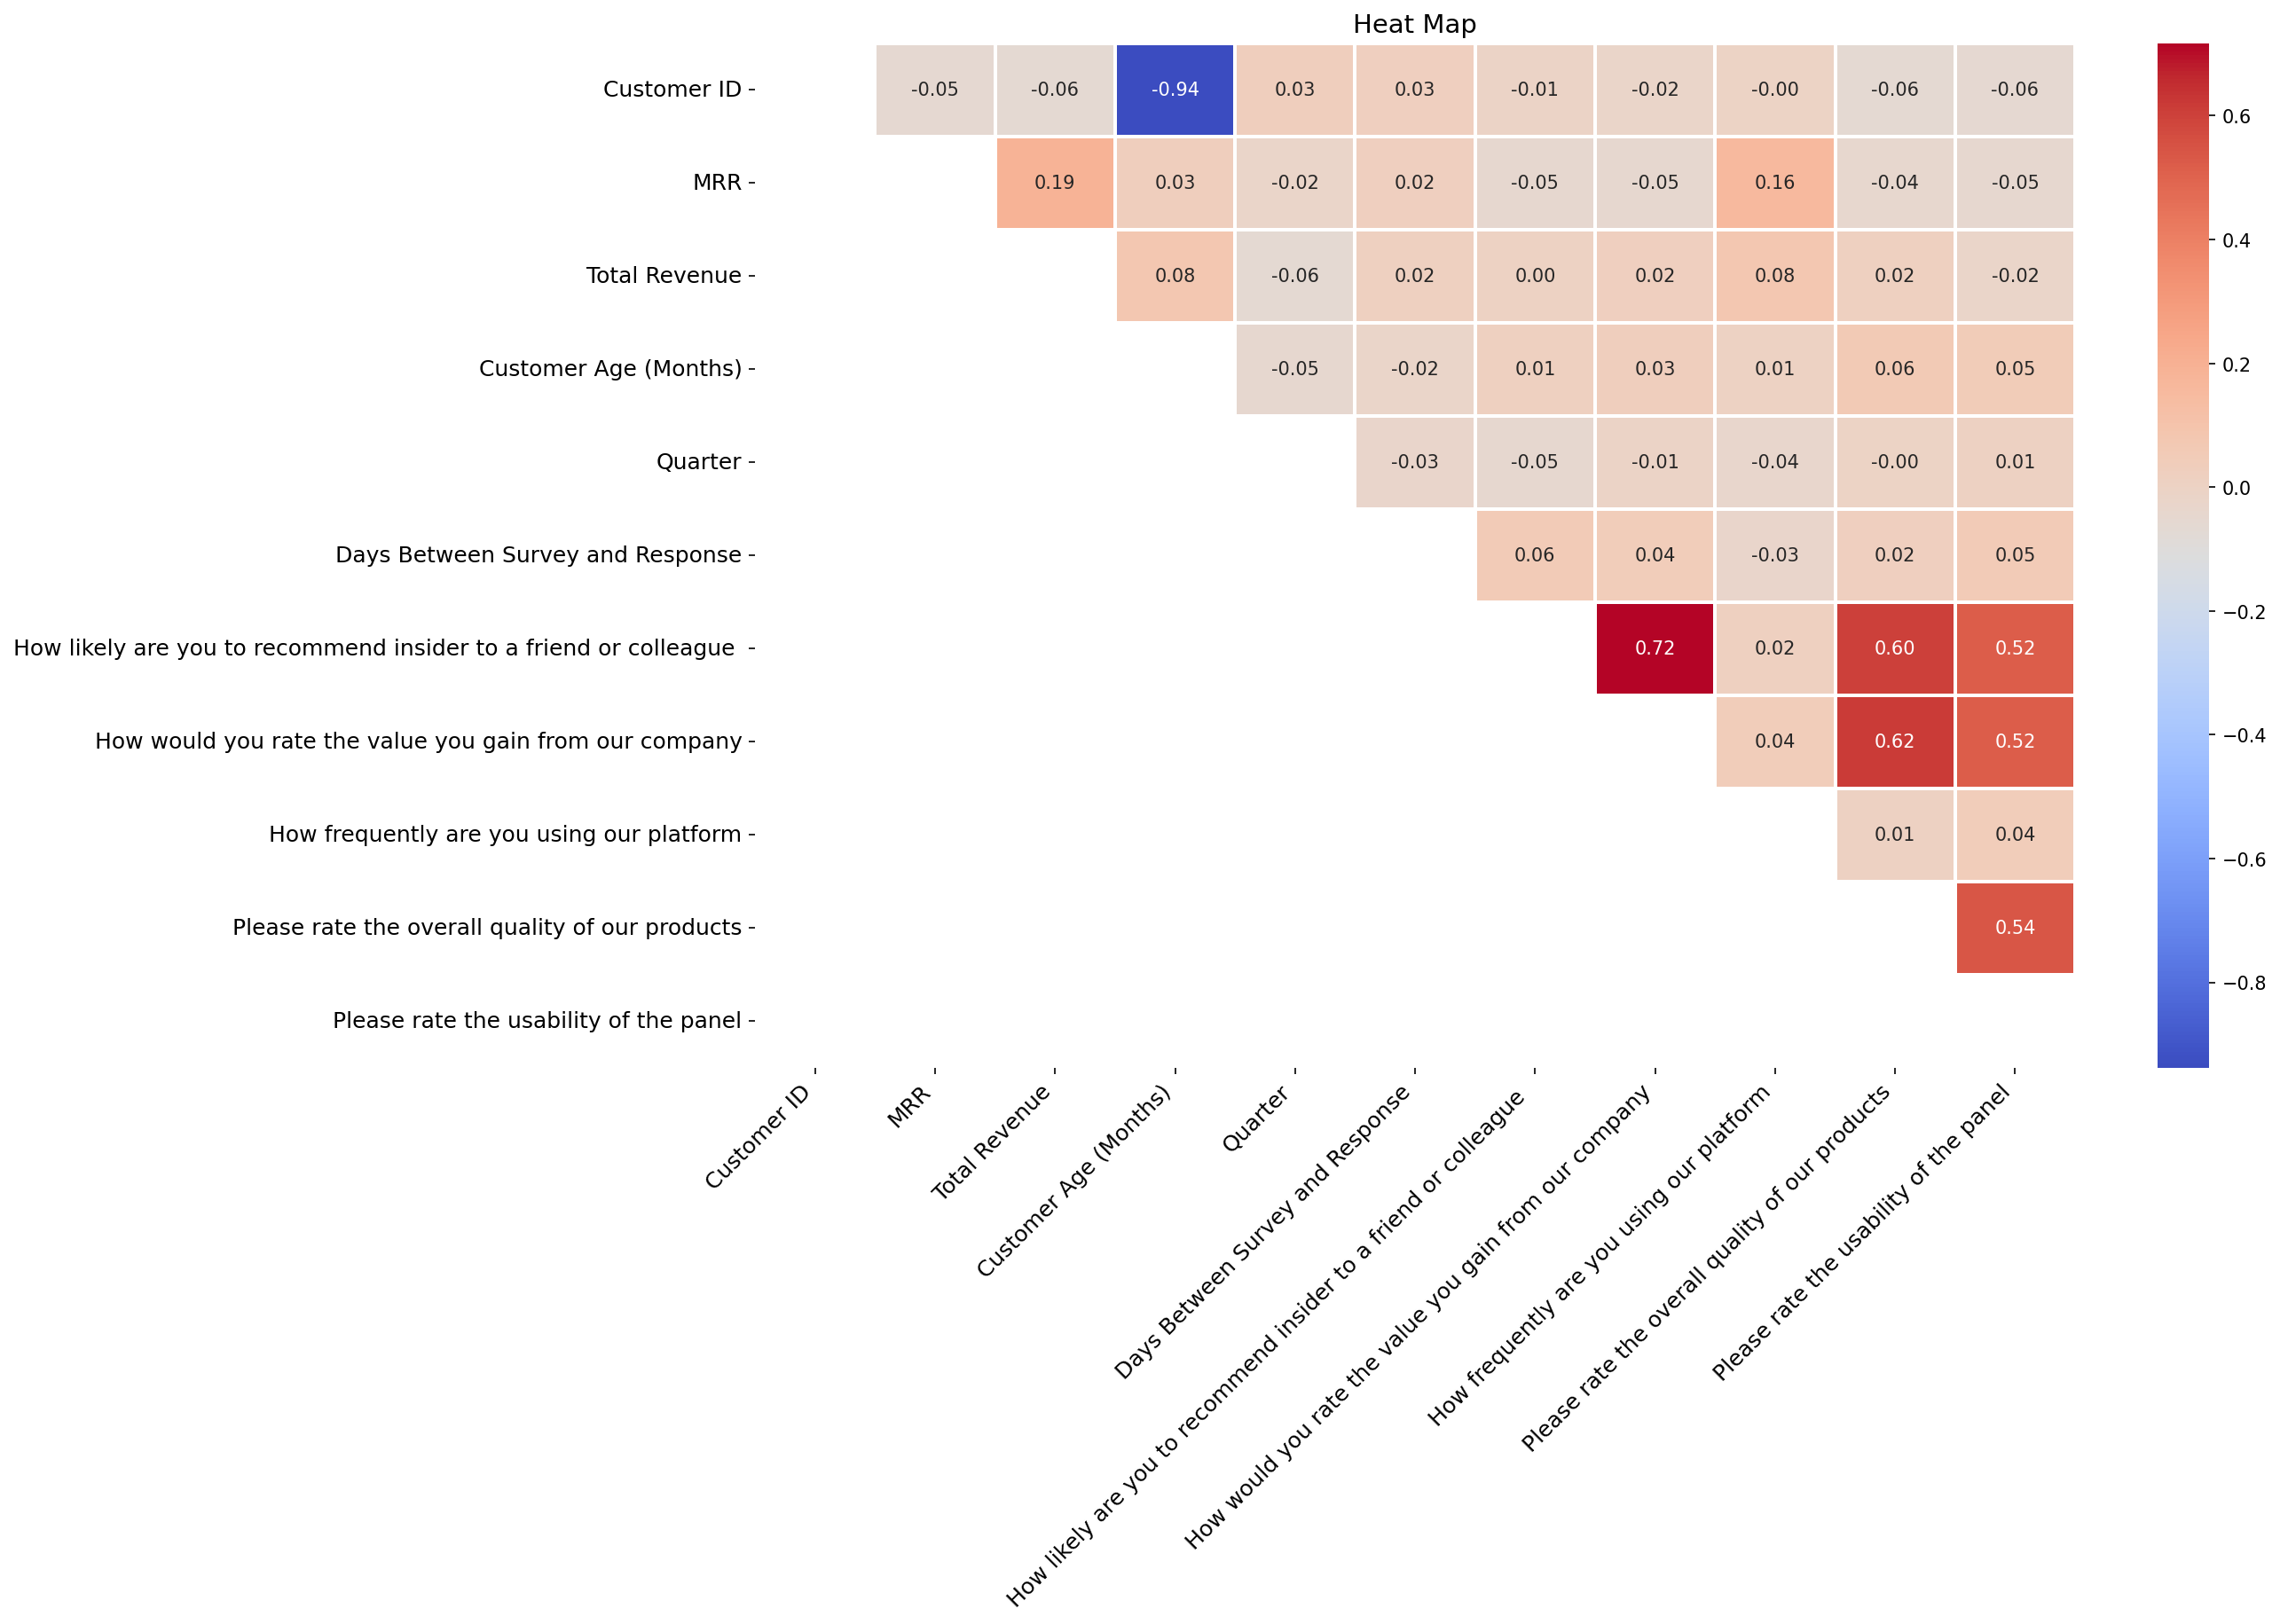

In [104]:
df_sozluk["Customer_Age_Data"].rename(columns={'CRM ID': 'Customer ID'}, inplace=True)
df_csat=df_sozluk['CSAT_Survey_Data'].drop(columns=['Please rate your understanding of our reporting capabilities in the panel'])


mrr_revenue_df=df_sozluk["Customer_MRR_Data"].merge(df_sozluk["Customer_Revenue_Data"],how='inner')

mrr_revenue_age_df=mrr_revenue_df.merge(df_sozluk["Customer_Age_Data"],how='inner')

mrr_ticket_df=df_sozluk["Customer_MRR_Data"].merge(df_sozluk["Help_Ticket_Data"],how='inner')

mrr_ticket_age_df=mrr_ticket_df.merge(df_sozluk["Customer_Age_Data"],how='inner')

mrr_csat_df=df_sozluk["Customer_MRR_Data"].merge(df_csat,how='inner')

mrr_revenue_age_ticket=mrr_revenue_age_df.merge(df_sozluk["Help_Ticket_Data"],how='inner')

mrr_revenue_age_ticket_csat=mrr_revenue_age_df.merge(df_csat,how='inner')


yeni_df_list=[mrr_revenue_df,mrr_revenue_age_df,mrr_ticket_df,mrr_ticket_age_df,mrr_csat_df,mrr_revenue_age_ticket_csat]
for df in yeni_df_list:
    heatmap_ciz(df)

# **📊 Churn (Müşteri Kaybı) Analizi ve Korelasyon İncelemesi**

## **🔹 Genel Bakış**
Bu analizde, **müşteri kaybı (churn) yaşamış müşteriler** üzerine detaylı incelemeler yapılmıştır.  
Özellikle, **müşteri destek talepleri, ürün hataları, yaş, müşteri memnuniyeti ve finansal metrikler** arasındaki ilişkiler incelenmiştir.

---

## **🔍 1️⃣ Churn Olan Müşterilerin Seçimi**
İlk olarak, `"StatusAndLevel_Data"` veri setinden **churn olan müşteriler (`Status = 0`)** seçildi:
```python
status_df = df_dict["StatusAndLevel_Data"]
churns_df = status_df[status_df['Status'] == 0]
```
📌 Churn veri seti oluşturuldu.

📊 1215 churn müşteri tespit edildi.

---
## **🔍 2️⃣ Müşteri Destek Talepleri ve Ürün Hataları ile Birleştirme**
Churn müşterilerin destek talepleri ve ürün hataları ile olan ilişkisini analiz etmek için veri setleri şu şekilde birleştirildi:

```python
dataframes_list = [churns_df, df_dict["Help_Ticket_Data"], df_dict["Product_Bug_Task_Data"]]

merged_df = churns_df
for n in dataframes_list[1:]:
    merged_df = merged_df.merge(n, on="Customer ID", how="inner")
``` 
📌 Churn müşteriler ile destek talepleri ve hata kayıtları eşleştirildi.

📊 Birleştirilmiş veri seti boyutu: (1215, 5)

---


```python
merged_df2.groupby("Customer Level").agg({
    "How would you rate the value you gain from our company": lambda x: list(x.mode()),
    "How likely are you to recommend insider to a friend or colleague": lambda x: list(x.mode()),
    "How frequently are you using our platform": lambda x: list(x.mode()),
    "Please rate the overall quality of our products": lambda x: list(x.mode()),
    "Please rate the usability of the panel": lambda x: list(x.mode()),
    "Please rate your understanding of our reporting capabilities in the panel": lambda x: list(x.mode())
})
```
📌 Churn olan müşterilerin, platformdan ne kadar memnun olduğu ve en çok hangi segmentin kaybedildiği incelendi.

✂ Kullanışsız sütunlar kaldırıldı:

```python
merged_df2 = merged_df2.drop(columns=["Please rate your understanding of our reporting capabilities in the panel"])
```

📊 Müşteri memnuniyeti ve churn arasındaki korelasyon görselleştirildi:

```python
heatmap_ciz(merged_df2)
```



                                                                               📊 CHURN NUM_COLS VERİ SETİ SAYISAL ANALİZİ                                                                               


------------------------------------------------------------------------------------------------------------------------
                                                STATUS DEĞİŞKENİ ANALİZİ                                                
------------------------------------------------------------------------------------------------------------------------



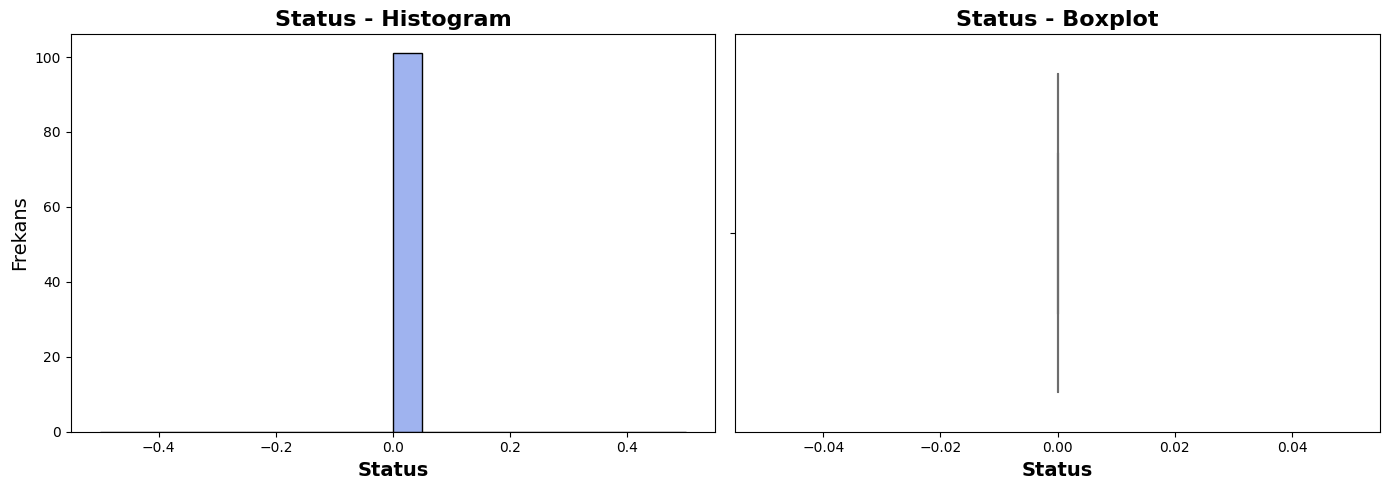


------------------------------------------------------------------------------------------------------------------------
                                            CUSTOMER LEVEL DEĞİŞKENİ ANALİZİ                                            
------------------------------------------------------------------------------------------------------------------------



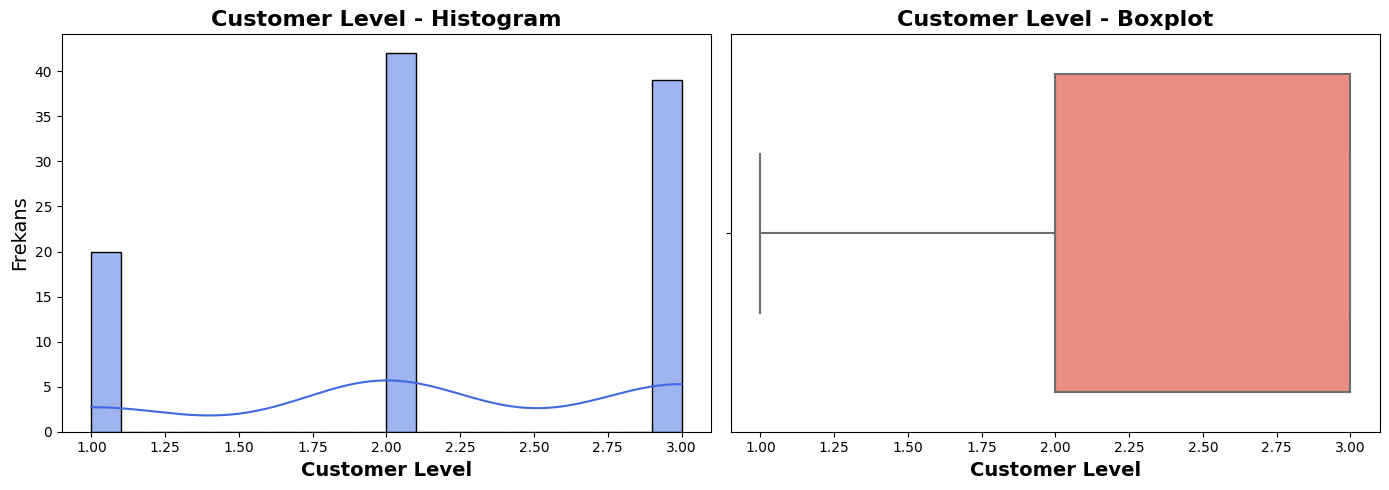


------------------------------------------------------------------------------------------------------------------------
                                          HELP TICKET COUNT DEĞİŞKENİ ANALİZİ                                           
------------------------------------------------------------------------------------------------------------------------



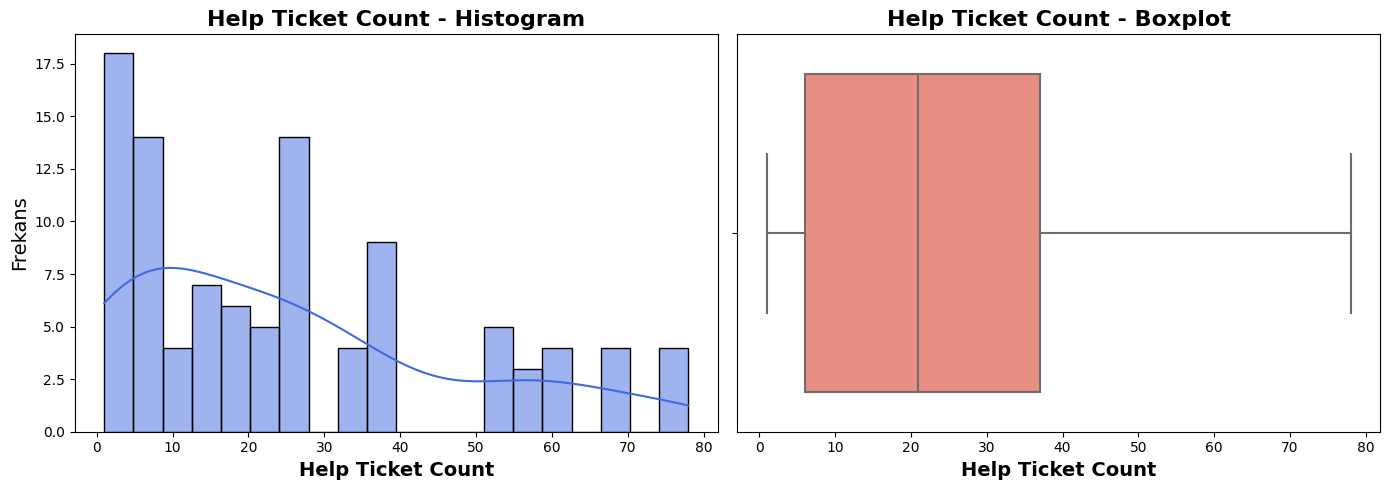


------------------------------------------------------------------------------------------------------------------------
                                    HELP TICKET LEAD TIME (HOURS) DEĞİŞKENİ ANALİZİ                                     
------------------------------------------------------------------------------------------------------------------------



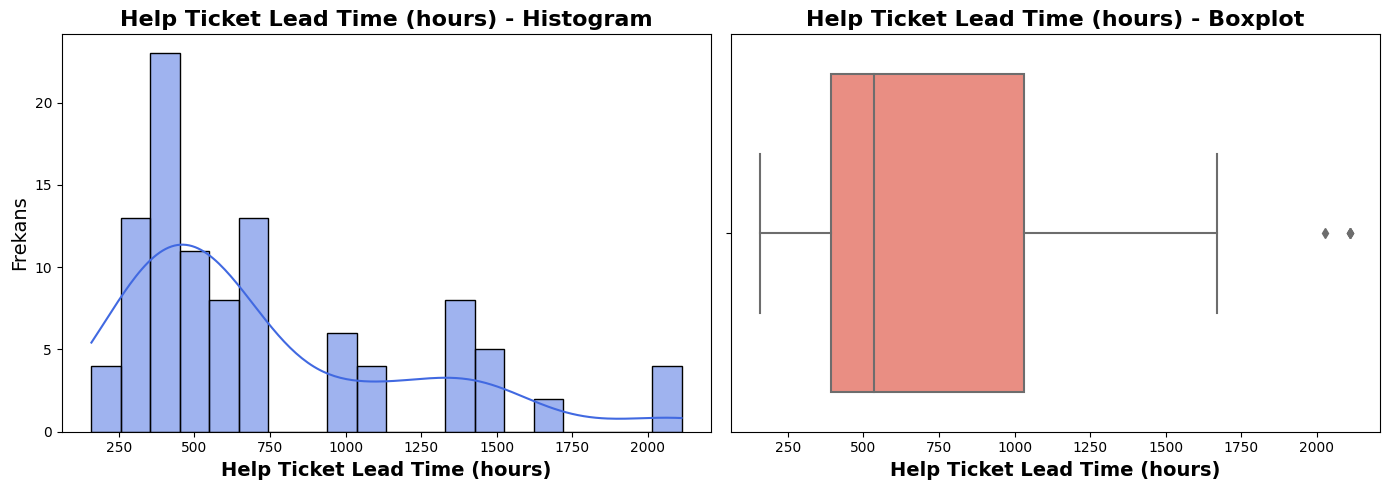


------------------------------------------------------------------------------------------------------------------------
                                        PRODUCT BUG TASK COUNT DEĞİŞKENİ ANALİZİ                                        
------------------------------------------------------------------------------------------------------------------------



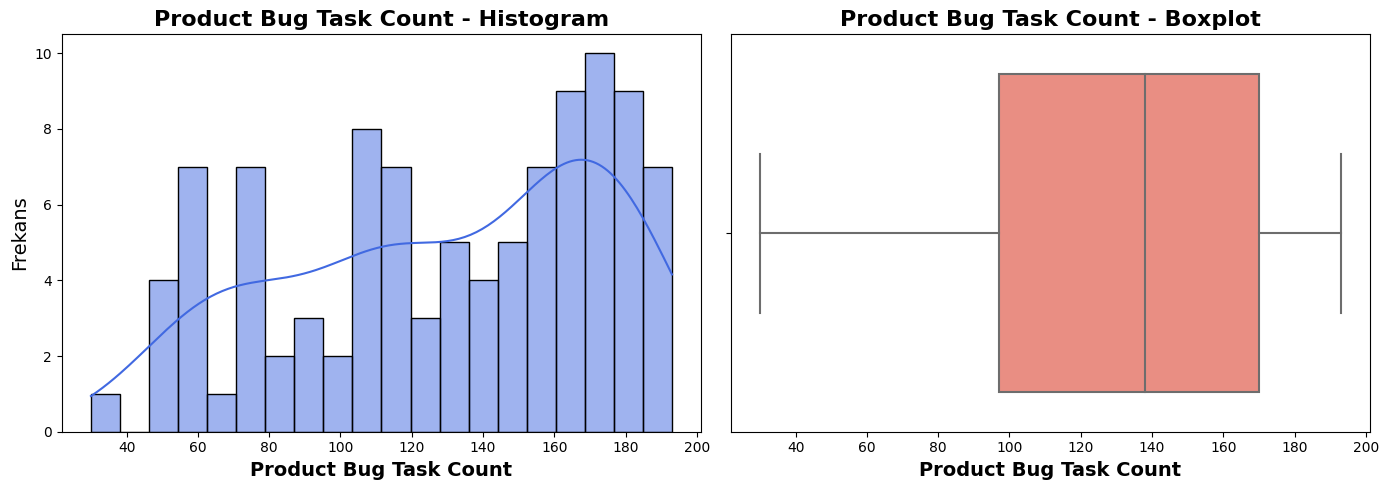

In [105]:
status_df=df_sozluk["StatusAndLevel_Data"]
churns_df = status_df[status_df['Status']==0]


dataframes_list = [churns_df, df_sozluk["Help_Ticket_Data"], df_sozluk["Product_Bug_Task_Data"]]

merged_df = churns_df

for n in dataframes_list[1:]:
    merged_df = merged_df.merge(n, on = "Customer ID", how = "inner")

kat_sutunlar,say_sutunlar=kat_num_analiz('merged_df',merged_df)
num_ozet(merged_df,'Churn num_cols',say_sutunlar)


## **🔍 3️⃣ Yaş, Müşteri Memnuniyeti ve Churn Analizi**
Churn müşteriler, yaş ve müşteri memnuniyeti verisiyle birleştirildi:

    
📌 Churn müşterilerin yaş ve memnuniyet verileri analiz edilebilir hale getirildi.

📊 Müşteri segmentasyonu açısından churn müşterilerin memnuniyet dağılımı şu şekilde hesaplandı:



📌 Customer Level: 1.0
  How would you rate the value you gain from our company: [5]
  How likely are you to recommend insider to a friend or colleague : [10]
  How frequently are you using our platform: [2, 3]
  Please rate the overall quality of our products: [4]
  Please rate the usability of the panel: [4.0]
  Please rate your understanding of our reporting capabilities in the panel: ["I don't use it often"]

📌 Customer Level: 2.0
  How would you rate the value you gain from our company: [4]
  How likely are you to recommend insider to a friend or colleague : [8]
  How frequently are you using our platform: [2]
  Please rate the overall quality of our products: [4]
  Please rate the usability of the panel: [4.0]
  Please rate your understanding of our reporting capabilities in the panel: ['I need someone from Insider team to provide me the report from the panel']

📌 Customer Level: 3.0
  How would you rate the value you gain from our company: [5]
  How likely are you to recommend i

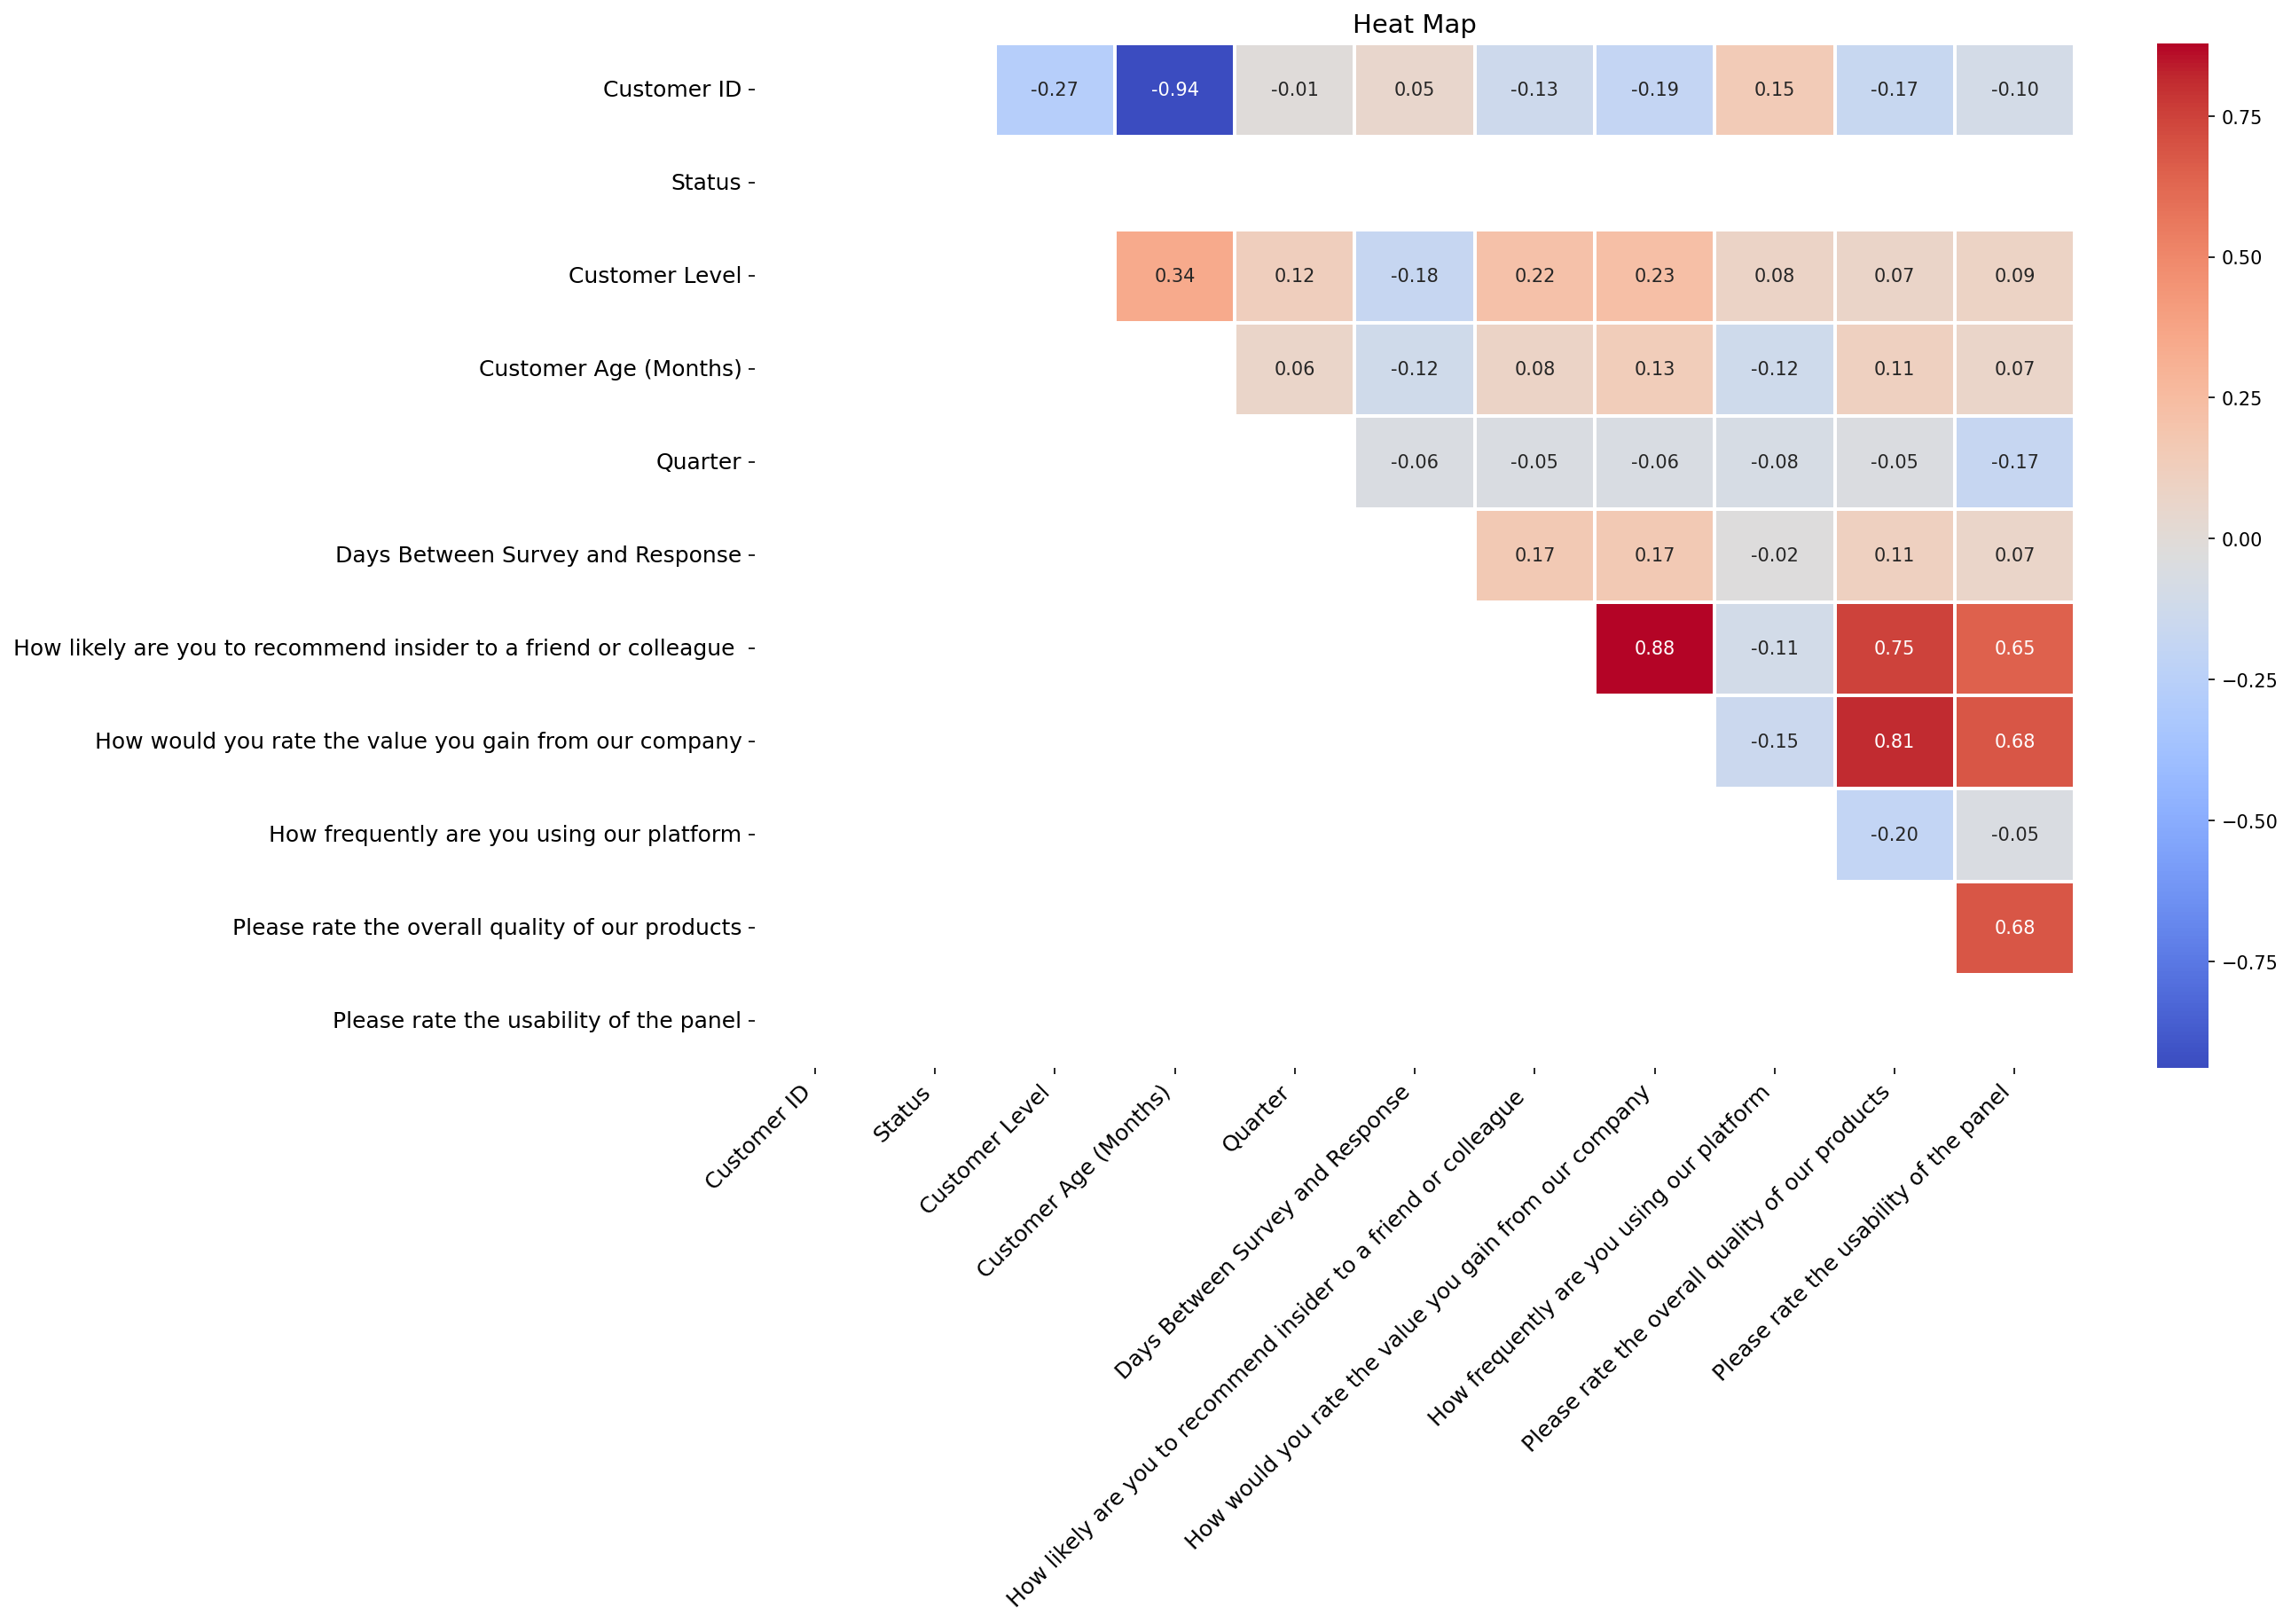

In [107]:
dataframes_list = [churns_df, df_sozluk["Customer_Age_Data"], df_sozluk["CSAT_Survey_Data"]]

merged_df2 = churns_df

for n in dataframes_list[1:]:
    merged_df2 = merged_df2.merge(n, on = "Customer ID", how = "inner")

sonuc=merged_df2.groupby("Customer Level").agg({"How would you rate the value you gain from our company": lambda x: list(x.mode()),
                                         "How likely are you to recommend insider to a friend or colleague ": lambda x: list(x.mode()),
                                         "How frequently are you using our platform": lambda x: list(x.mode()),
                                         "Please rate the overall quality of our products": lambda x: list(x.mode()),
                                         "Please rate the usability of the panel": lambda x: list(x.mode()),
                                         "Please rate your understanding of our reporting capabilities in the panel": lambda x: list(x.mode())})
for index, row in sonuc.iterrows():
    print(f"\n📌 Customer Level: {index}")
    for col, value in row.items():
        print(f"  {col}: {value}")

merged_df2=merged_df2.drop(columns=["Please rate your understanding of our reporting capabilities in the panel"])
heatmap_ciz(merged_df2)


## **🔍 4️⃣ Bölge, Dikey ve Finansal Veriler ile Churn Analizi**
Farklı müşteri segmentleri, bölge ve finansal veriler ile birleştirildi:
  
📌 Bölge, müşteri segmenti ve finansal veriler birleştirildi.

📊 Farklı veri setlerinin boyutları:

Churns veri seti: (1215, 2)
Müşteri Destek Talepleri + Churn: (1215, 5)
MRR (Gelir) + Churn: (66, 6)
Bülten Etkileşimleri + Churn: (32, 6)

In [108]:
dataframes_list = [churns_df, df_sozluk["RegionAndVertical_Data"]]
dataframes_list1 = [churns_df, df_sozluk["RegionAndVertical_Data"], df_sozluk["Customer_MRR_Data"]]
dataframes_list2 = [churns_df, df_sozluk["RegionAndVertical_Data"], df_sozluk["Newsletter_Interaction_Data"]]

merged_df3 = churns_df
mrr_paid_merged_df = churns_df
nws_added_merged_df = churns_df

for n in dataframes_list[1:]:
    merged_df3 = merged_df3.merge(n, on = "Customer ID", how = "inner")

for n in dataframes_list1[1:]:
    mrr_paid_merged_df = mrr_paid_merged_df.merge(n, on = "Customer ID", how = "inner")

for n in dataframes_list2[1:]:
    nws_added_merged_df = nws_added_merged_df.merge(n, on = "Customer ID", how = "inner")
    

ValueError: You are trying to merge on Int64 and object columns for key 'Customer ID'. If you wish to proceed you should use pd.concat

## **🔍 5️⃣ Kategorik ve Sayısal Değişkenlerin Analizi**
Numeric sütunlar:
```python
numeric_cols = ["Region", "Vertical", "Subvertical", "Customer Level"]
```
Kategorik sütunlar:
```python
cat_cols = ["MRR", "Company Newsletter Interaction Count"]
```

📊 Sayısal değişkenlerin özet istatistikleri incelendi:
```python
cat_summary(merged_df3, 'crmage', numeric_cols)
```

✅ Sonuçlar

Churn müşteri segmentleri detaylıca analiz edildi.

Bölge, sektör, müşteri yaşı, memnuniyet, gelir ve destek talepleri ile ilişkilendirme yapıldı.

Korelasyon analizleriyle müşteri kaybına etki eden faktörler incelendi.

Sonuçlar, müşteri kazanımı stratejileri ve churn azaltma politikaları için kullanılabilir.

In [109]:
kat_sutunlar,say_sutunlar=kat_num_analiz(merged_df3,'merged_df_3')
kat_ozet(merged_df3,'merged_df_3',kat_sutunlar)
say_ozet(merged_df3,'merged_df_3',say_sutunlar)

AttributeError: 'str' object has no attribute 'columns'

# **📊 Aktif Müşterilerin Destek Talepleri ve Ürün Hataları ile İlişkilendirilmesi**

## **🔹 Genel Bakış**
Bu analizde, **churn olmayan (hala aktif olan) müşterilerin destek talepleri ve ürün hataları ile olan ilişkisi** incelenmiştir.  
Amaç, **hangi müşterilerin destek talepleri oluşturduğunu ve ürün hatalarıyla karşılaşan müşterilerin genel durumunu analiz etmektir.**

---

## **🔍 1️⃣ Churn Olmayan Müşterilerin Seçilmesi**
Müşteri durumu (`StatusAndLevel_Data`) içinden **churn olmayan müşteriler (`Status ≠ 0`)** seçildi:
```python
notchurns_df = df_sozluk["StatusAndLevel_Data"][df_dict["StatusAndLevel_Data"] != 0]
```
📌 Churn olmayan müşteri veri seti oluşturuldu.
## **🔍 2️⃣ Destek Talepleri ve Ürün Hataları ile Birleştirme**
Churn olmayan müşterilerin destek talepleri ve ürün hataları ile ilişkisini analiz etmek için veri setleri şu şekilde birleştirildi:

```python
dataframes_list = [notchurns_df, df_sozluk["Help_Ticket_Data"], df_sozluk["Product_Bug_Task_Data"]]

merged_df3 = notchurns_df
for n in dataframes_list[1:]:
    merged_df3 = merged_df3.merge(n, on="Customer ID", how="inner")

```
    
📌 Aktif müşteriler, destek talepleri ve ürün hataları ile eşleştirildi.

📊 Bu birleşim sayesinde hangi müşterilerin daha fazla sorun yaşadığı analiz edilebilir.

## **🔍 3️⃣ Korelasyon Analizi**
Müşteri destek talepleri ve ürün hataları arasındaki ilişkileri analiz etmek için korelasyon heatmap (ısı haritası) çizildi:
```python
heatmap_ciz(merged_df3)
```
📊 Bu analiz, destek taleplerinin ve hata kayıtlarının müşteri ilişkilerine olan etkisini değerlendirmek için kullanılabilir.

## **🔍 4️⃣ Kategorik ve Sayısal Değişkenlerin Analizi**
Aktif müşterilerin destek talepleri ile olan ilişkisini daha iyi anlamak için kategorik ve sayısal değişkenler analiz edildi:

```python
kat_sutunlar, say_sutunlar = kat_num_analiz("merged_df3", merged_df3)
say_ozet(merged_df3, "num_cols", say_sutunlar)
```
📌 Müşterilerin destek talepleri ve ürün hataları arasındaki dağılım detaylıca incelendi.
📊 Müşterilerin yaşadığı sorunların hangi müşteri gruplarında daha fazla olduğu tespit edilebilir.

✅ Sonuçlar
Churn olmayan müşterilerin destek talepleri ve ürün hatalarıyla ilişkisi analiz edildi.
Hangi müşteri gruplarının en fazla destek talebi oluşturduğu incelendi.
Ürün hataları ve destek taleplerinin, müşteri memnuniyeti üzerindeki etkileri değerlendirildi.
Korelasyon analizi ile en çok sorun yaşayan müşteri grupları belirlendi.

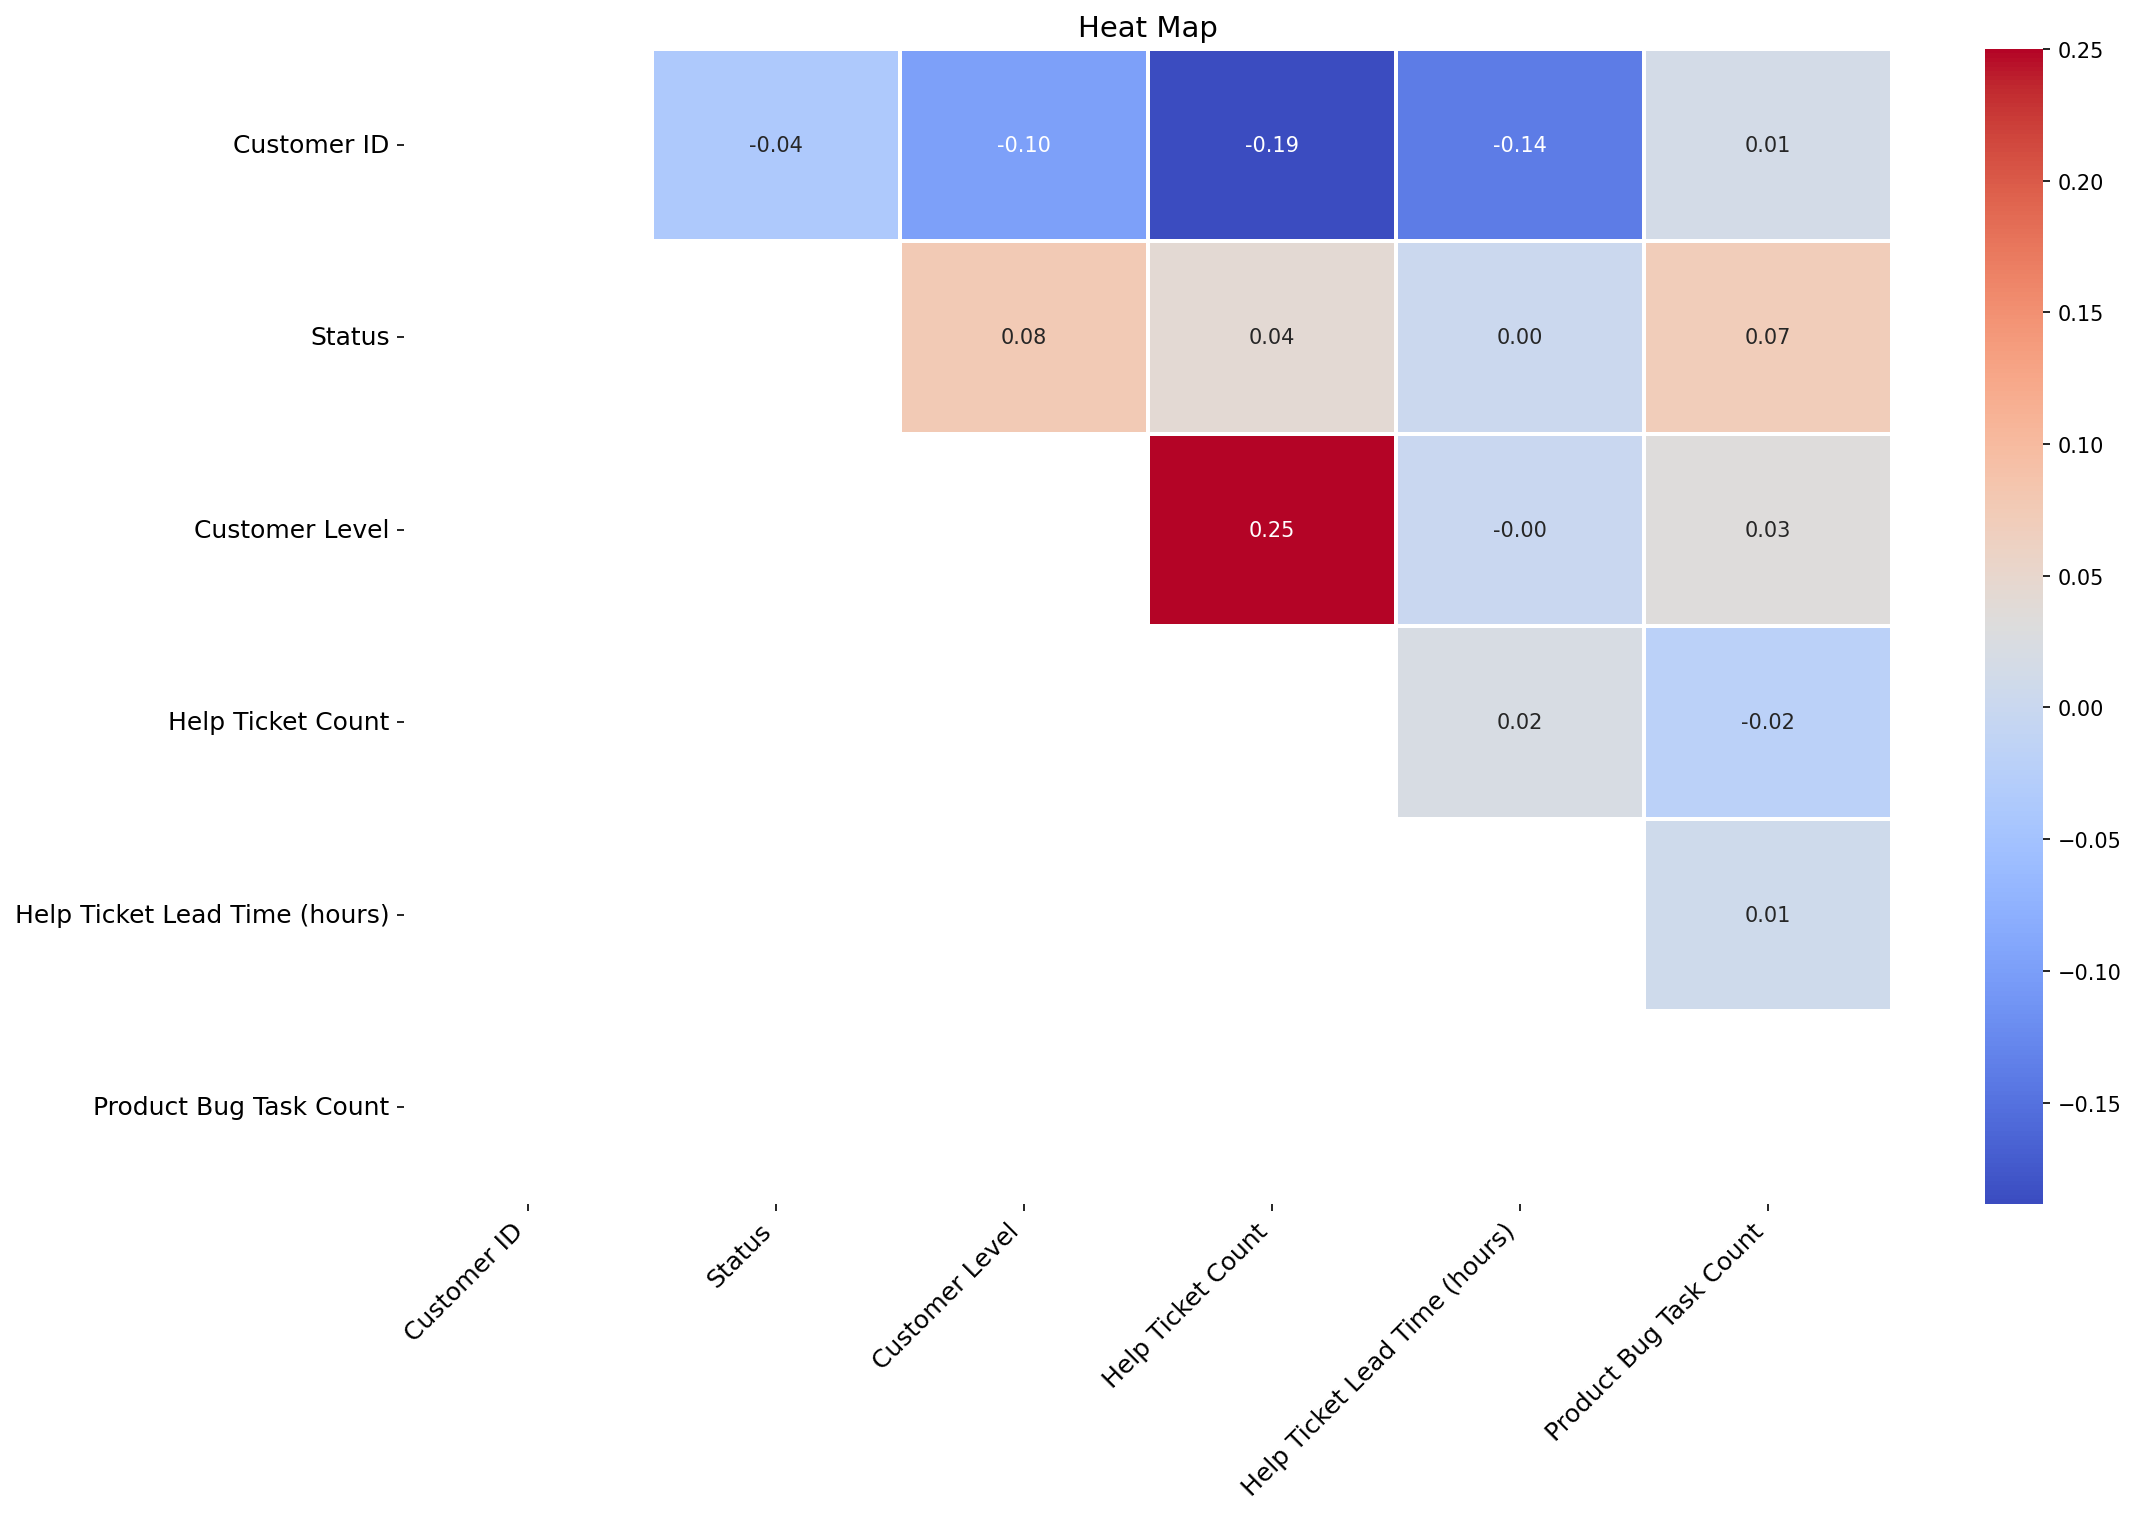


                                                                                  📊 NUM_COLS VERİ SETİ SAYISAL ANALİZİ                                                                                  


------------------------------------------------------------------------------------------------------------------------
                                                STATUS DEĞİŞKENİ ANALİZİ                                                
------------------------------------------------------------------------------------------------------------------------



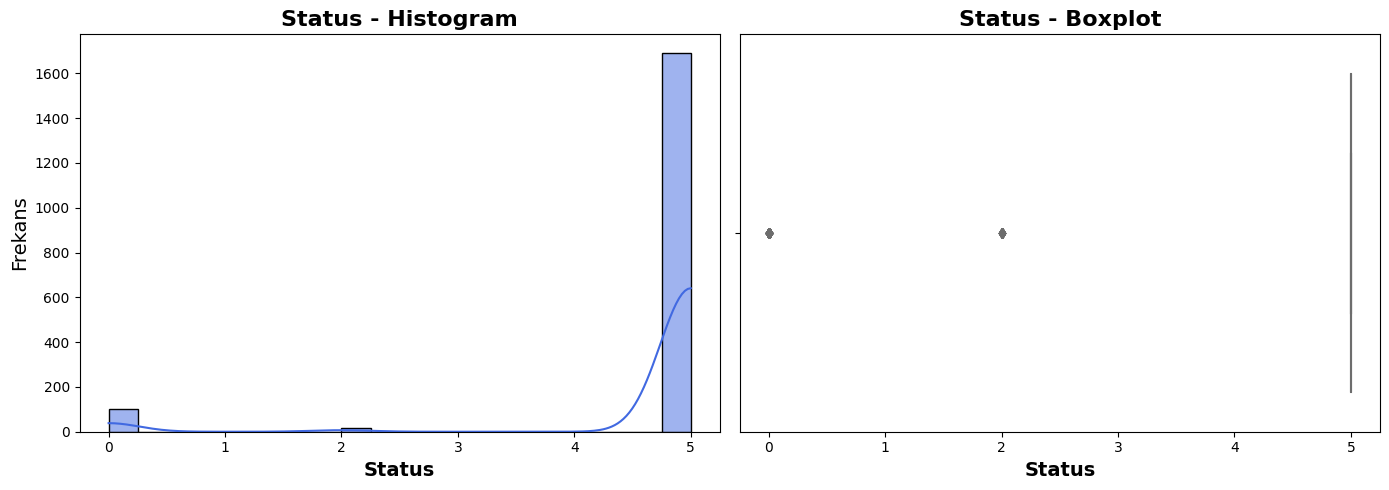


------------------------------------------------------------------------------------------------------------------------
                                            CUSTOMER LEVEL DEĞİŞKENİ ANALİZİ                                            
------------------------------------------------------------------------------------------------------------------------



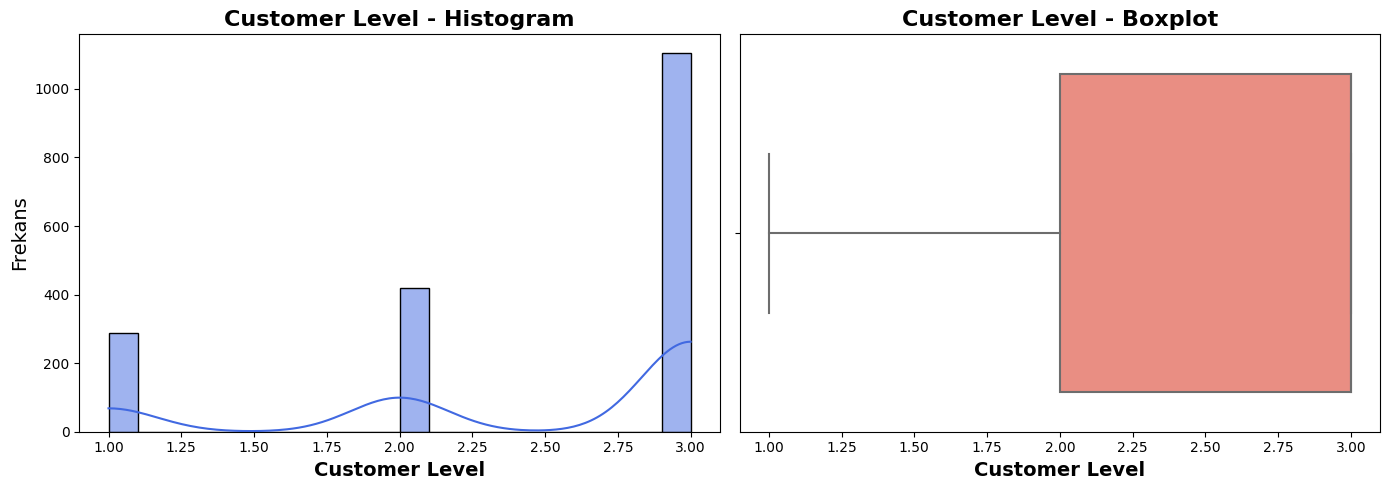


------------------------------------------------------------------------------------------------------------------------
                                          HELP TICKET COUNT DEĞİŞKENİ ANALİZİ                                           
------------------------------------------------------------------------------------------------------------------------



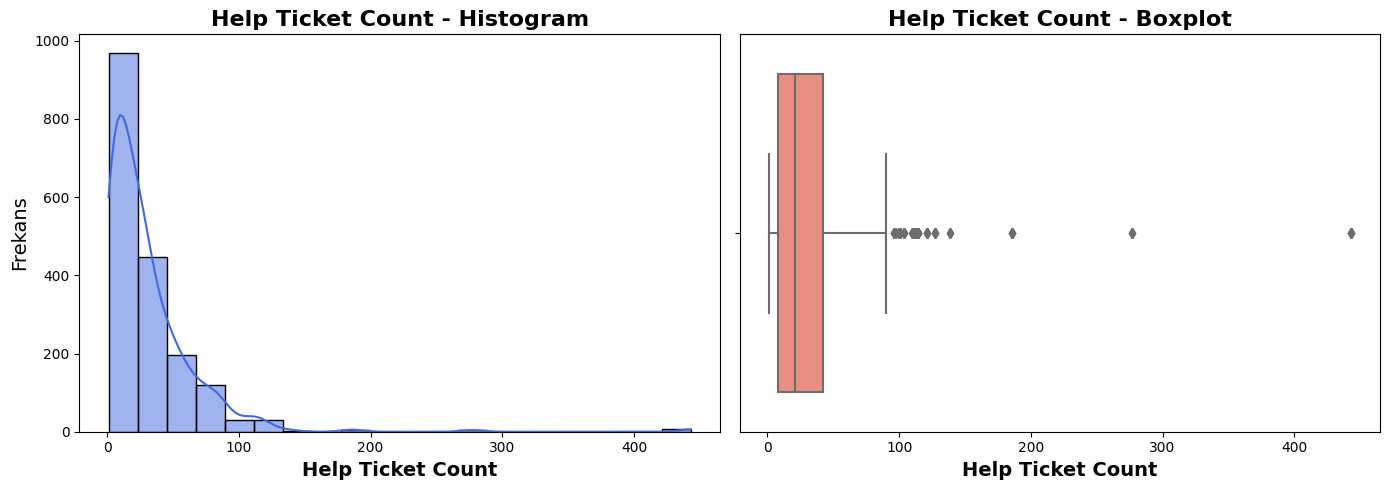


------------------------------------------------------------------------------------------------------------------------
                                    HELP TICKET LEAD TIME (HOURS) DEĞİŞKENİ ANALİZİ                                     
------------------------------------------------------------------------------------------------------------------------



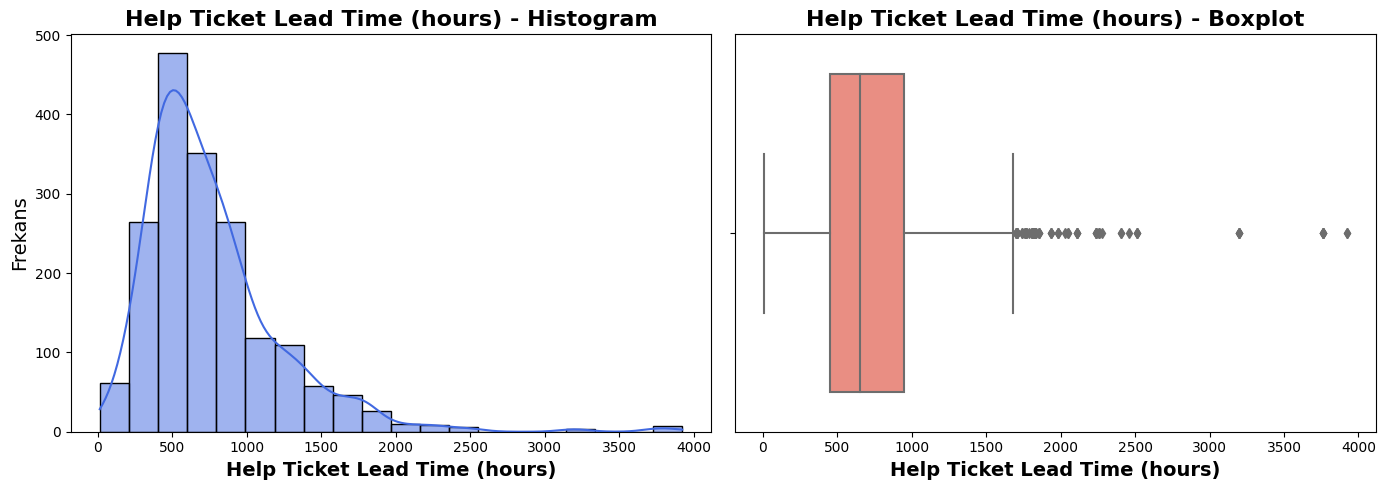


------------------------------------------------------------------------------------------------------------------------
                                        PRODUCT BUG TASK COUNT DEĞİŞKENİ ANALİZİ                                        
------------------------------------------------------------------------------------------------------------------------



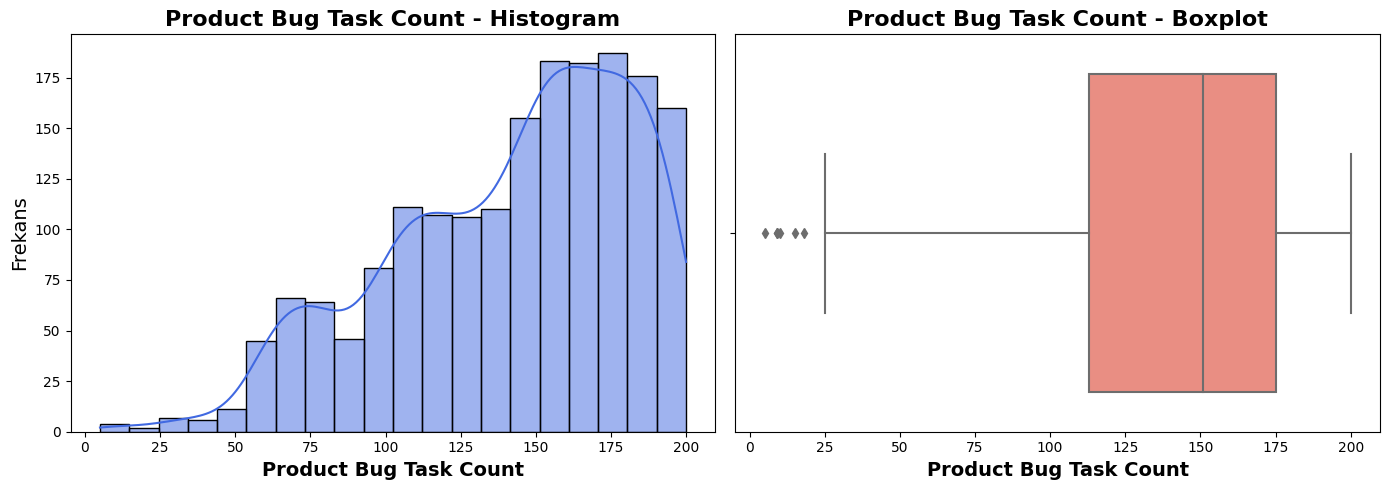

In [112]:
notchurns_df =df_sozluk["StatusAndLevel_Data"][df_sozluk["StatusAndLevel_Data"] != -1]
dataframes_list = [notchurns_df, df_sozluk["Help_Ticket_Data"], df_sozluk["Product_Bug_Task_Data"]]
merged_df3 = notchurns_df

for n in dataframes_list[1:]:
    merged_df3 = merged_df3.merge(n, on = "Customer ID", how = "inner")

heatmap_ciz(merged_df3)
kat_sutunlar, say_sutunlar = kat_num_analiz("merged_df3", merged_df3)
num_ozet(merged_df3, "num_cols", say_sutunlar)

# **📊 Aktif Müşterilerin Yaş, Memnuniyet ve Korelasyon Analizi**

## **🔹 Genel Bakış**
Bu analizde, **aktif müşterilerin (churn olmayan) yaşı, müşteri memnuniyeti anketleri ve platform kullanımı ile olan ilişkisi** incelenmiştir.  
Amaç, **hangi müşteri segmentlerinin daha memnun olduğunu ve memnuniyetin hangi faktörlerle ilişkili olduğunu belirlemektir.**

---

## **🔍 1️⃣ Aktif Müşterilerin Yaş ve Memnuniyet Verileri ile Birleştirilmesi**
Aktif müşteriler, **müşteri yaşı ve memnuniyet anket verileri** ile birleştirildi:
```python
dataframes_list = [notchurns_df, df_dict["Customer_Age_Data"], df_dict["CSAT_Survey_Data"]]

merged_df4 = notchurns_df
for n in dataframes_list[1:]:
    merged_df4 = merged_df4.merge(n, on="Customer ID", how="inner")
```   
📌 Aktif müşterilerin yaş ve memnuniyet verileri analiz edilebilir hale getirildi.

📊 Bu birleşim sayesinde müşteri segmentasyonu ve memnuniyet ilişkisi daha iyi analiz edilebilir.

## **🔍 2️⃣ Müşteri Memnuniyetinin Segmentlere Göre Dağılımı**
Müşteri memnuniyeti anket verileri kullanılarak her müşteri segmenti için en yaygın (mod) cevaplar hesaplandı:

```python
merged_df4.groupby("Customer Level").agg({
    "How would you rate the value you gain from our company": lambda x: list(x.mode()),
    "How likely are you to recommend insider to a friend or colleague": lambda x: list(x.mode()),
    "How frequently are you using our platform": lambda x: list(x.mode()),
    "Please rate the overall quality of our products": lambda x: list(x.mode()),
    "Please rate the usability of the panel": lambda x: list(x.mode()),
    "Please rate your understanding of our reporting capabilities in the panel": lambda x: list(x.mode())
})
```

📌 Müşteri segmentlerine göre platform kullanım alışkanlıkları ve memnuniyet seviyeleri analiz edildi.

📊 Hangi segmentlerin platformu daha sık kullandığı ve hangilerinin Insider'ı tavsiye etmeye daha yatkın olduğu belirlenebilir.

## **🔍 3️⃣ Gereksiz Sütunların Kaldırılması**
Analiz için gereksiz olan "Please rate your understanding of our reporting capabilities in the panel" sütunu kaldırıldı:
```python
modified_merged_df4 = merged_df4.drop("Please rate your understanding of our reporting capabilities in the panel", axis=1)
```
📌 Veri seti daha verimli hale getirildi.

## **🔍 4️⃣ Müşteri Yaşı ve Korelasyon Analizi**
Müşteri yaşı ile diğer değişkenler arasındaki ilişkiyi anlamak için özet istatistikler hesaplandı:

```python
num_ozet(merged_df4, "customer age notchurn", ["Customer Age (Months)"])
```

📌 Aktif müşterilerin yaşına bağlı olarak değişkenlerin nasıl farklılaştığı analiz edildi.

📊 Farklı yaş gruplarındaki müşterilerin memnuniyet seviyeleri ve kullanım alışkanlıkları incelendi.

📊 Korelasyon analizi ile müşteri memnuniyeti ve yaş arasındaki ilişkiler incelendi:

```python
heatmap_ciz(modified_merged_df4)
```

📌 Hangi değişkenlerin müşteri memnuniyeti ile güçlü ilişkili olduğu belirlendi.

✅ Sonuçlar

Aktif müşterilerin memnuniyet seviyesi ve yaş ile ilişkisi analiz edildi.

Müşteri segmentleri arasında memnuniyet farkları ortaya çıkarıldı.

Memnuniyet seviyeleri ve platform kullanım sıklıkları analiz edildi.

Yaş ve müşteri memnuniyeti arasındaki korelasyon incelendi.

Bu analizler, müşteri deneyimini iyileştirmek için içgörüler sağlayabilir.


📌 Customer Level: 1.0
  How would you rate the value you gain from our company: [5]
  How likely are you to recommend insider to a friend or colleague : [8]
  How frequently are you using our platform: [2]
  Please rate the overall quality of our products: [4]
  Please rate the usability of the panel: [4.0]
  Please rate your understanding of our reporting capabilities in the panel: ['I am able to report everything easily']

📌 Customer Level: 2.0
  How would you rate the value you gain from our company: [5]
  How likely are you to recommend insider to a friend or colleague : [10]
  How frequently are you using our platform: [2, 3]
  Please rate the overall quality of our products: [4]
  Please rate the usability of the panel: [4.0]
  Please rate your understanding of our reporting capabilities in the panel: ['I am able to report everything easily']

📌 Customer Level: 3.0
  How would you rate the value you gain from our company: [4]
  How likely are you to recommend insider to a friend

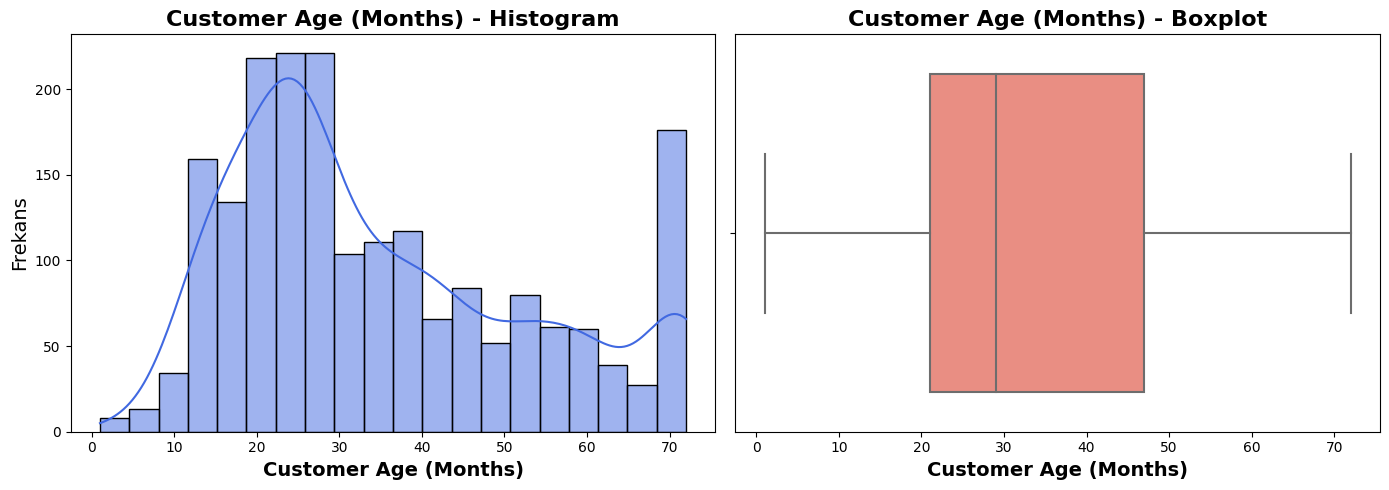

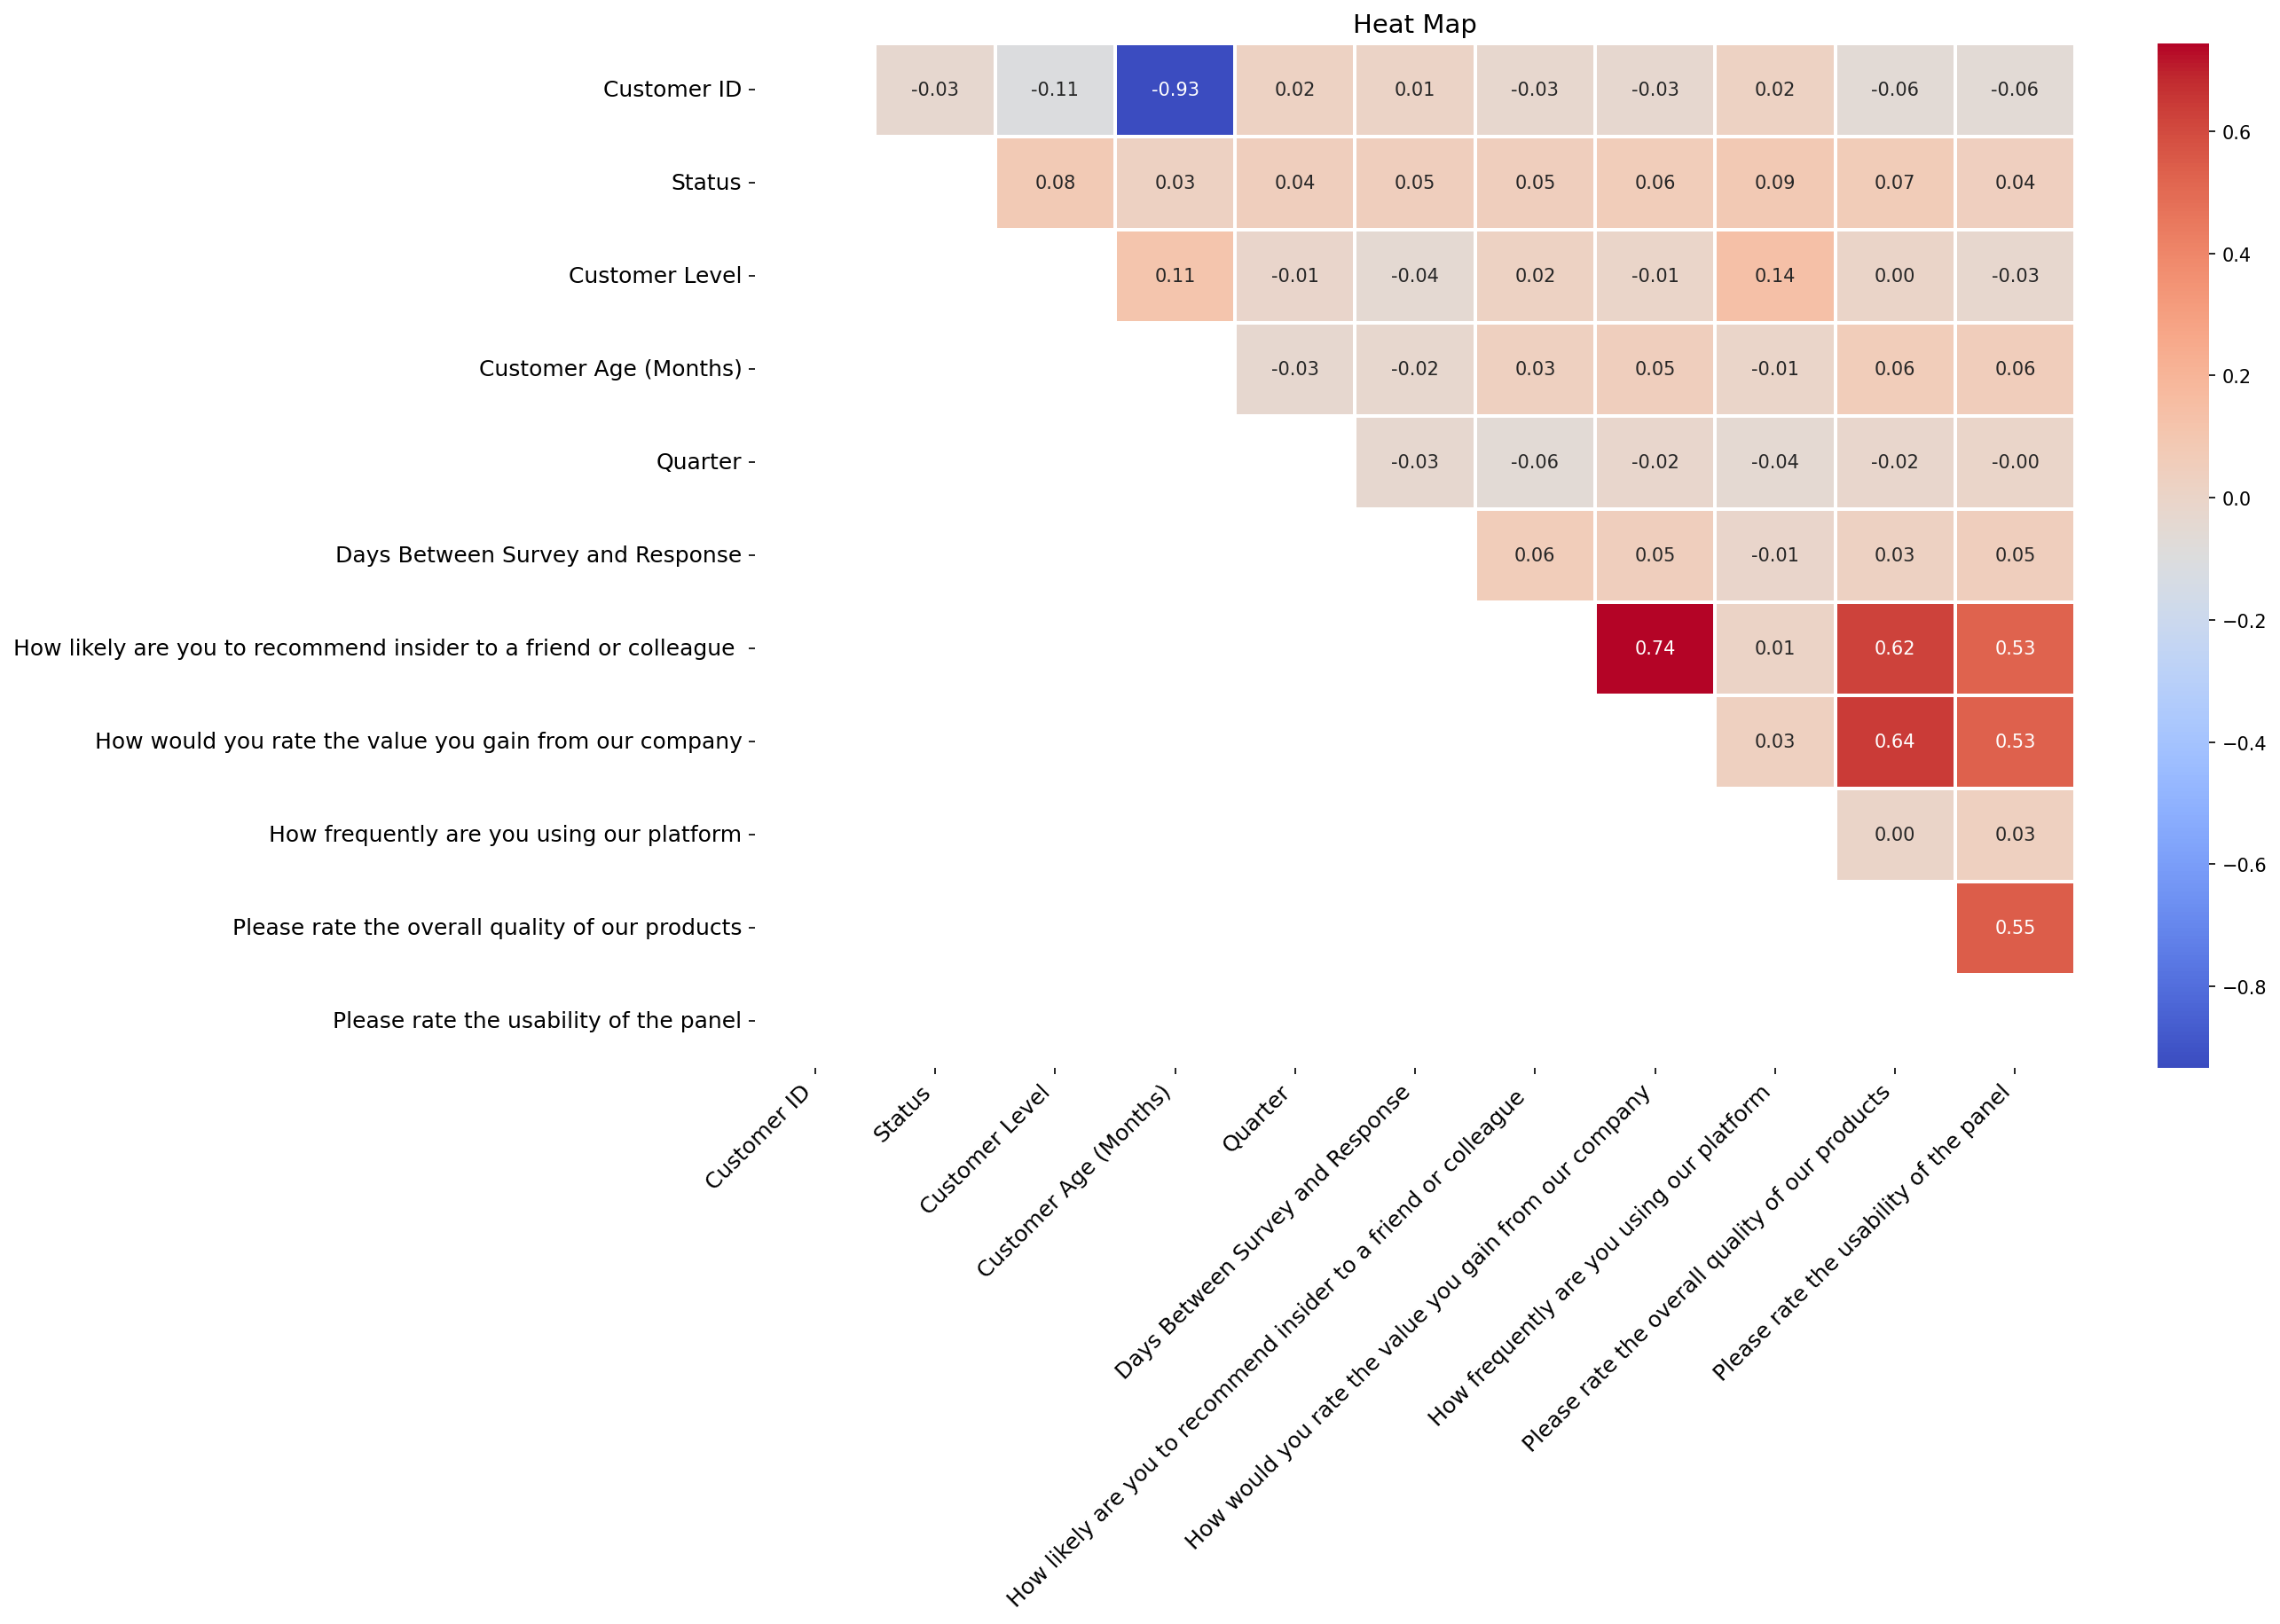

In [114]:
dataframes_list = [notchurns_df,df_sozluk["Customer_Age_Data"], df_sozluk["CSAT_Survey_Data"]]
merged_df4 = notchurns_df

for n in dataframes_list[1:]:
    merged_df4 = merged_df4.merge(n, on = "Customer ID", how = "inner")

sonuc=merged_df4.groupby("Customer Level").agg({"How would you rate the value you gain from our company": lambda x: list(x.mode()),
                                         "How likely are you to recommend insider to a friend or colleague ": lambda x: list(x.mode()),
                                         "How frequently are you using our platform": lambda x: list(x.mode()),
                                         "Please rate the overall quality of our products": lambda x: list(x.mode()),
                                         "Please rate the usability of the panel": lambda x: list(x.mode()),
                                         "Please rate your understanding of our reporting capabilities in the panel": lambda x: list(x.mode())})

for index, row in sonuc.iterrows():
    print(f"\n📌 Customer Level: {index}")
    for col, value in row.items():
        print(f"  {col}: {value}")
        
modified_merged_df4 = merged_df4.drop("Please rate your understanding of our reporting capabilities in the panel", axis = 1)

num_ozet(merged_df4,'customer age notchurn',["Customer Age (Months)"])
heatmap_ciz(modified_merged_df4)

# **📊 Aktif Müşterilerin Bölge, Gelir ve Etkileşim Analizi**

## **🔹 Genel Bakış**
Bu analizde, **aktif müşterilerin (churn olmayan) bölgesel dağılımı, gelir durumu, müşteri etkileşimleri ve platform kullanımı arasındaki ilişkiler** incelenmiştir.  
Amaç, **farklı müşteri segmentlerinin coğrafi konumlarına, gelirlerine ve etkileşim seviyelerine göre nasıl farklılaştığını belirlemektir.**

---

## **🔍 1️⃣ Aktif Müşterilerin Bölge ve Müşteri Dikeyleri ile Birleştirilmesi**
Aktif müşteriler, **bölge ve sektör bilgileri (`RegionAndVertical_Data`)** ile birleştirildi:
```python
dataframes_list = [notchurns_df, df_dict["RegionAndVertical_Data"]]

merged_df5 = notchurns_df
for n in dataframes_list[1:]:
    merged_df5 = merged_df5.merge(n, on="Customer ID", how="inner")

```
    
📌 Müşteri segmentlerinin coğrafi konumları ve sektörleri analiz edilebilir hale getirildi.

📊 Bu analizle, hangi bölgelerde churn oranlarının daha düşük olduğu tespit edilebilir.

## **🔍 2️⃣ Aktif Müşterilerin Gelir ve MRR Analizi**
Müşteri bölge ve sektör bilgileri, gelir ve MRR (Customer_MRR_Data) verileriyle birleştirildi:

```python
dataframes_list1 = [notchurns_df, df_dict["RegionAndVertical_Data"], df_dict["Customer_MRR_Data"]]

mrr_paid_merged_df = notchurns_df
for n in dataframes_list1[1:]:
    mrr_paid_merged_df = mrr_paid_merged_df.merge(n, on="Customer ID", how="inner")
```    
📌 Müşterilerin gelirleri analiz edilebilir hale getirildi.

📊 Bölge bazlı gelir dağılımı ve MRR ilişkisi incelenebilir.

## **🔍 3️⃣ Aktif Müşterilerin Bülten Etkileşimleri ile Birleştirilmesi**
Müşteri bölge ve sektör bilgileri, haber bülteni etkileşimleri (Newsletter_Interaction_Data) ile birleştirildi:

```python
dataframes_list2 = [notchurns_df, df_dict["RegionAndVertical_Data"], df_dict["Newsletter_Interaction_Data"]]

nws_added_merged_df = notchurns_df
for n in dataframes_list2[1:]:
    nws_added_merged_df = nws_added_merged_df.merge(n, on="Customer ID", how="inner")
```    
📌 Hangi müşterilerin Insider’ın haber bültenleri ile daha fazla etkileşime girdiği analiz edildi.

📊 Bülten etkileşimi ve müşteri segmentleri arasındaki ilişki değerlendirildi.

## **🔍 4️⃣ Aktif Müşterilerin Bölge ve Gelir Dağılımı ile Birleştirilmesi**
Müşteri bölge ve sektör bilgileri, toplam gelir (Customer_Revenue_Data) ile birleştirildi:
```python
dataframes_list3 = [notchurns_df, df_dict["RegionAndVertical_Data"], df_dict["Customer_Revenue_Data"]]

rvv_added_merged_df = notchurns_df
for n in dataframes_list3[1:]:
    rvv_added_merged_df = rvv_added_merged_df.merge(n, on="Customer ID", how="inner")
```    
📌 Bölge bazında müşteri gelirlerinin nasıl değiştiği incelenebilir hale getirildi.

## **🔍 5️⃣ Kategorik ve Sayısal Değişkenlerin Analizi**
Aşağıdaki adımlar **her veri seti için otomatik olarak uygulanmıştır**:

```python
# Veri setlerinin isimlerini ve değişkenlerini içeren sözlük
dataframes = {
    "merged_df5": merged_df5,
    "mrr_paid_merged_df": mrr_paid_merged_df,
    "nws_added_merged_df": nws_added_merged_df,
    "rvv_added_merged_df": rvv_added_merged_df
}

# Her veri seti için kategorik ve sayısal analiz işlemlerini gerçekleştir
for name, df in dataframes.items():
    print(f"📊 İşleniyor: {name}")
    
    # Kategorik ve sayısal değişkenleri belirleme
    cat_cols, num_cols = kat_num_analiz(name, df)
    
    # Sayısal özet istatistikleri
    num_summary(df, "num_cols", num_cols)
    
    # Kategorik değişkenlerin özet analizi
    cat_summary(df, "cat_cols", cat_cols)

    print("-" * 50)  # Çıktıyı düzenlemek için ayraç ekleme
```

📌 Kod, her veri seti için analizleri otomatik olarak gerçekleştirerek gereksiz tekrarları önler.

📊 Her veri setinin kategorik ve sayısal değişken dağılımı özetlenir.

✅ Sonuçlar

Aktif müşterilerin bölgesel ve sektörel dağılımı analiz edildi.

Gelir ve MRR farkları, müşteri segmentasyonuna göre değerlendirildi.

Haber bülteni etkileşimlerinin, müşteri segmentleri üzerindeki etkisi incelendi.

Bölgesel ve sektörel gelir dağılımları analiz edildi.

Sonuçlar, müşteri kazanım stratejileri ve bölgesel pazarlama kampanyaları için kullanılabilir.

In [116]:
dataframes_list = [churns_df, df_sozluk["RegionAndVertical_Data"]]
dataframes_list1 = [churns_df, df_sozluk["RegionAndVertical_Data"], df_sozluk["Customer_MRR_Data"]]
dataframes_list2 = [churns_df, df_sozluk["RegionAndVertical_Data"], df_sozluk["Newsletter_Interaction_Data"]]
dataframes_list3 = [churns_df, df_sozluk["RegionAndVertical_Data"], df_sozluk["Customer_Revenue_Data"]]

merged_df5 = notchurns_df
mrr_paid_merged_df = notchurns_df
nws_added_merged_df = notchurns_df
rvv_added_merged_df = notchurns_df

for n in dataframes_list[1:]:
    merged_df5 = merged_df5.merge(n, on = "Customer ID", how = "inner")

for n in dataframes_list1[1:]:
    mrr_paid_merged_df = mrr_paid_merged_df.merge(n, on = "Customer ID", how = "inner")

for n in dataframes_list2[1:]:
    nws_added_merged_df = nws_added_merged_df.merge(n, on = "Customer ID", how = "inner")

for n in dataframes_list3[1:]:
    rvv_added_merged_df = rvv_added_merged_df.merge(n, on = "Customer ID", how = "inner")

dataframes = {
    "merged_df5": merged_df5,
    "mrr_paid_merged_df": mrr_paid_merged_df,
    "nws_added_merged_df": nws_added_merged_df,
    "rvv_added_merged_df": rvv_added_merged_df
}

for name, df in dataframes.items():
    print(f"📊 Processing dataset: {name}")
    
    kat_sutunlar,say_sutunlar = kat_num_analiz(name, df)
    
    num_ozet(df, "num_cols", say_sutunlar)
    
    kat_ozet(df, "cat_cols", kat_sutunlar)

    print("-" * 50)  

ValueError: You are trying to merge on Int64 and object columns for key 'Customer ID'. If you wish to proceed you should use pd.concat

## İş Analizi ve İçgörüler
---

### 🔵 Yaptığımız analiz sonucunda churn durumundaki müşterilerin oldukça yüksek bir paya sahip olduklarını gördük.  
Bundan dolayı müşterilerimizin churn durumuna düşme nedenlerini bulmaya ve bu nedenlerin ortadan kaldırılmasına odaklanmaya karar verdik.

### Churn durumuna düşen müşteri sayısını azaltıp müşterileri elimizde tutmak ve böylece uzun vadeli de olsa elde edilen aylık geliri (MRR) koruyup arttırmak stratejisini benimsedik.  
Çünkü elimizde tutabildiğimiz memnun müşterilerin zamanla ürünlerin daha yüksek versiyonlarına veya paketlerine talep sağlayabileceklerini düşündük.

### Bu amaç doğrultusunda öncelikle churn olan ve olmayan müşterilerin genel karakteristikleri çıkarıldı ve hem kendi içlerinde hem de birbirleriyle karşılaştırıldı.

---

### 🔶 **Elde edilen bulgular:**
- 🔹 **Churn olan müşteriler**, olmayanlara kıyasla daha düşük müşteri yaşına sahipler.
- 🔹 **Churn olan müşteriler**, genellikle küçük ölçekli müşteri seviyesine (*Customer Level*) sahipler. *Long-tail* gibi.
- 🔹 **Hem churn hem de churn olmayan müşterilerin geneli** *"fashion retailer"* ve *"cosmetics"* vertical kategorilerine sahip.
- 🔹 **Müşteri başına düşen yardım talebi sayısı (*Help Ticket Count*)** churn olanlarda olmayanlara göre daha az.
- 🔹 **Müşteri başına yardım talebi çözüm süresi (*Help Ticket Lead Time (hours)*)** churn olanlarda daha az. Churn olanların sorunları nispeten daha kısa sürede çözüme kavuşturulmuş.
- 🔹 **Müşteri başına bug raporlama sayısı (*Product Bug Task Count*), ortalama MRR, haber bülteni etkileşimi sayısı (*Company Newsletter Interaction Count*)** churn olanlarda olmayanlara göre daha az.

---

### 🟠 **Anket sonuçlarının değerlendirilmesi sonucunda şu çıkarımları yaptık:**
- 🔻 **Churn olan müşteriler**, her ne kadar ayrılma yoluna gitseler de anket yanıtlarında bariz bir memnuniyetsizlik belirtmemişler.  
  - Memnun olsalar bile hizmetten tam anlamıyla verim alamamış olma ihtimalleri var ve bunu pek paylaşmıyorlar.
- 🔻 **Churn olan müşterilerin ürünleri kullanma sıklığı düşüktür.**  
  - Bu durum churn olmayan müşterilerde tam tersidir. Ürünlerin kullanma sıklığı arttıkça müşterilerin churn olma ihtimallerinin azaldığını gözlemledik.
- 🔻 **Churn olan müşteriler**, anket yanıtlarında *veri raporlama hizmeti* ile ilgili sorun yaşadıklarını belirtmişler.  
  - Veri raporlama hizmetini ya tam olarak kullanamıyorlar ya da anlayamamışlar.

---

## ➡️ **Öneriler**

### **Churn olan müşterilerin problemlerinin çözümüne odaklanılmalıdır:**

1️⃣ **Raporlama konusunda yaşadıkları zorlukların hafifletilmesi için self-paced eğitim materyalleri oluşturulabilir.**  
   - Bu eğitim materyalleri tüm müşterilere açık olabilir ve churn sinyalleri veren müşterilere özellikle önerilebilir.

2️⃣ **Bir müşterinin churn olma ihtimali, sadece anket sonuçlarına değil, aynı zamanda performans metriklerine bakılarak değerlendirilmelidir.**  
   - Müşterileri belirli periyotlarla analiz eden bir sistem geliştirilebilir ve sonuca göre müşteriye özel aksiyon (*kampanya, teklif vs.*) yapılabilir.

   - **Bu analiz sonucunda churn olma ihtimalinin arttığı gözlemlenen müşteriler için aksiyonlar:**
     - 🔴 **Long-Tail gibi düşük seviyedeki müşteriler için:**
       - 🔻 Yardım ekibinden özel bir ekip bizzat şirketle iletişime geçmeli ve standart destek sisteminin 30 güne varan geri dönüş sürelerinden kötü etkilenmelerini engellemelidir.
       - 🔻 *Insider* ürünleri hakkında oluşturulacak self-paced eğitim materyalleri hakkında kendilerine bilgi verilebilir.
       - 🔻 Şirket hakkındaki yeni gelişmelerden haberdar olabilmeleri için kendilerine özel kişiselleştirilmiş newsletter hizmeti sunulabilir.
     - 🔴 **Yüksek seviyeli müşteriler için:**
       - 🔻 *Insider*'a olan bağlılıklarını artırabilmek için derinlemesine raporlar sunulabilir.
       - 🔻 Kompleks, uzun vadeli indirim kampanyaları teklif edilebilir.
       - 🔻 *Insider* ekibi tarafından müşterinin kendi personellerine eğitim hizmeti sunulabilir.
       - 🔻 Gerekli durumlarda müşterinin üst düzey yöneticileriyle birebir istişare toplantıları düzenlenebilir ve elde edilen bulgulara göre şirkete özel aksiyonlar alınabilir.

3️⃣ **Hangi müşteri seviyesine ve türüne sahip olursa olsun, destek taleplerinin ortalama çözüme kavuşma süresi (*30 gün*) iyileştirilmelidir.**  
   - **Öneri:** Önce *AI* destekli çözümler sunulmalı, müşteri memnun kalmazsa insan destek ekibine yönlendirilmelidir.

---

### **Retained durumundaki müşterilerin genel memnuniyet düzeyi korunmalıdır:**
- 🔴 **Long-Tail gibi düşük seviyeli müşteriler için:**
  - 🔻 Bütçelerini çok sarsmayacak ve kendilerini ani bir kullanım zorluğuna sokmayacak ürün veya servis yükseltmeleri hakkında düzenli teklif yapılabilir.
- 🔴 **Daha yüksek seviyeli müşteriler için:**
  - 🔻 *Insider* ürünlerinin daha yüksek versiyonlarına veya aboneliklerine erişebilmelerini teşvik etmek amacıyla rekabetçi kampanyalar/teklifler yapılabilir.
- **Retained durumundaki müşterilere teklif edilecek yükseltme paketi, ürün veya servis ilgili müşterinin kendi karakteristiğine uygun olarak belirlenebilir.**  
  - *AI* teknolojisi bu süreçte personelin iş yükünü hafifletebilir.

---

